In [246]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
udev            213G     0  213G   0% /dev
tmpfs            43G  4.1G   39G  10% /run
/dev/sda1        62G   32G   31G  51% /
tmpfs           213G  228K  213G   1% /dev/shm
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs           213G     0  213G   0% /sys/fs/cgroup
/dev/sdb1       851G   75G  733G  10% /mnt
tmpfs            43G  324K   43G   1% /run/user/1000


In [247]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import sklearn
from sklearn import metrics
import sklearn.model_selection
import datetime
import time
import os
import math
random.seed(1)
%matplotlib inline

In [248]:
import multiprocessing as mp
mp.cpu_count()

64

In [249]:
# import mine_concept
# import importlib
# from multiprocessing import Pool
# importlib.reload(mine_concept)

In [250]:
DATA_FOLDER = 'GiveMeSomeCredit'
FILE_NAME = 'cs-training.csv'

In [251]:
df = pd.read_csv(os.path.join(DATA_FOLDER, FILE_NAME), index_col=0)
df.head()
df.shape

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   
3                                2                        1   
4                                5                        0   
5                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
1                             6                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   
5                             1                                     0   

   NumberOfDependents  
1                 2.0  
2                 1.0  
3                 0.0  
4                 0.0  
5                 0.0

(150000, 11)

In [252]:
df = df.query("MonthlyIncome == MonthlyIncome")

In [253]:
TARGET_NAME = 'MonthlyIncome'
df = df.drop('SeriousDlqin2yrs',axis=1)

In [254]:
RANDOM_SEED = 42
SAMPLE_SIZE = 25000
TEST_SAMPLE_SIZE = 5000

df_sample = df.sample(SAMPLE_SIZE, random_state=RANDOM_SEED)
df_test = df_sample.sample(TEST_SAMPLE_SIZE, random_state=RANDOM_SEED)
df_train = df_sample.drop(df_test.index)
df_sample.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [255]:
df_test.shape
df_train.shape

(5000, 10)

(20000, 10)

In [256]:
df_train.head()

RevolvingUtilizationOfUnsecuredLines  age  \
110219                              1.017217   47   
84333                               0.661947   33   
12629                               0.840230   42   
93269                               1.089464   34   
45898                               0.780007   58   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
110219                                     3     0.623938        10000.0   
84333                                      1     0.230241         3200.0   
12629                                      0  1420.000000            0.0   
93269                                      1    63.500000            1.0   
45898                                      0     0.611210        11792.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
110219                                7                        0   
84333                                 9                        0   
12629                                 7                        0   
93269                                 2                        0   
45898                                 9                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
110219                             1                                     0   
84333                              0                                     0   
12629                              0                                     0   
93269                              0                                     1   
45898                              2                                     0   

        NumberOfDependents  
110219                 1.0  
84333                  2.0  
12629                  4.0  
93269                  0.0  
45898                  0.0

In [257]:
y_train = df_train[TARGET_NAME].values
y_test = df_test[TARGET_NAME].values

In [258]:
df_train = df_train.drop(TARGET_NAME,axis=1)
df_test = df_test.drop(TARGET_NAME,axis=1)

In [259]:
df_train.head()

RevolvingUtilizationOfUnsecuredLines  age  \
110219                              1.017217   47   
84333                               0.661947   33   
12629                               0.840230   42   
93269                               1.089464   34   
45898                               0.780007   58   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
110219                                     3     0.623938   
84333                                      1     0.230241   
12629                                      0  1420.000000   
93269                                      1    63.500000   
45898                                      0     0.611210   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
110219                                7                        0   
84333                                 9                        0   
12629                                 7                        0   
93269                                 2                        0   
45898                                 9                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
110219                             1                                     0   
84333                              0                                     0   
12629                              0                                     0   
93269                              0                                     1   
45898                              2                                     0   

        NumberOfDependents  
110219                 1.0  
84333                  2.0  
12629                  4.0  
93269                  0.0  
45898                  0.0

### PatternStructuresRegMiner

In [260]:
def nunique_percol_sort(a):
    """Number of unique values in a row of array"""
    b = np.sort(a,axis=1)
    return (b[:,1:] != b[:,:-1]).sum(axis=1)+1

class PatternStructuresRegMiner():
    """
    Basic class to explore intersections of objects and build hypotheses
    """
    def __init__(self, 
                 train_data,
                 y_train,
                 feature_list):
        """
        :param train_data: Pandas.DataFrame with objects
        :param y_train: Target variable (numpy.array)
        :param feature_list: list of column names used as features
        """
        self.train_data = train_data[feature_list]
        self.y_train = y_train
        self.y_train_indexes = np.array(range(self.y_train.shape[0]))
        self.X_expanded = np.expand_dims(self.train_data.values, 0)
        self.feature_list = feature_list
        self.is_nan_X_expanded = np.isnan(self.X_expanded)
    
    def mine_obj_intersections(self, 
                               train_indexes_to_sample, 
                               n_obj,
                               subs_size):
        # np.random.choice is too slow
        print("Mining {} intersections".format(n_obj))
        
        indexes = np.random.choice(train_indexes_to_sample, (n_obj,subs_size))
        # provide objects in subsamples are unique
        #         n_unique = nunique_percol_sort(indexes)
        #         indexes = indexes[n_unique == subs_size] # A_0

        # left & right borders of interval pattern structures
        concepts_min = np.expand_dims(np.nanmin(self.train_data.values[indexes], axis=1), 1)
        concepts_max = np.expand_dims(np.nanmax(self.train_data.values[indexes], axis=1), 1)

        # A_0
        objs_in_concepts = ((((concepts_min <= self.X_expanded) | np.isnan(concepts_min)) & 
                                    ((concepts_max >= self.X_expanded) | np.isnan(concepts_max))) | 
                                    self.is_nan_X_expanded).all(axis=2)
        concepts_y_means = np.apply_along_axis(lambda objs: self.y_train[objs].mean(), 1, objs_in_concepts)
        concepts_y_medians = np.apply_along_axis(lambda objs: np.median(self.y_train[objs]), 1, objs_in_concepts)
        concepts_y_stds = np.apply_along_axis(lambda objs: self.y_train[objs].std(), 1, objs_in_concepts)
        
#         print("objs_in_concepts", objs_in_concepts.shape)
#         print("objs_in_concepts", objs_in_concepts.sum(axis=1))
#         print("INDEXES", indexes[objs_in_concepts.sum(axis=1)==2])
#         print("")
        
        
        return {
            'objs_in_concepts': objs_in_concepts,
            'concepts_y_means': concepts_y_means,
            'concepts_y_medians': concepts_y_medians,
            'concepts_y_stds': concepts_y_stds,
            'concepts_min': concepts_min[:,0,:],
            'concepts_max': concepts_max[:,0,:],
#             'y_mean_train_diff': concepts_y_means - self.y_train.mean()
        }
        
    def mine_hypotheses(self, 
                        y_partition,
                        subs_size,
                        batch_size = 1000,
                        N_hypo_need_partition = None,
                        N_iterations = None,
                        choose_hypo_by='mean'):
        """
        :param choose_hypo_by: "mean" or "median"
        """
        interval_hypos_dict = {}
        for interval_num, y_interval in enumerate(y_partition):
            train_indexes_to_sample = self.y_train_indexes[(y_interval['left'] <= self.y_train) & (self.y_train <= y_interval['right'])]
            
            N_hypo_need = N_hypo_need_partition[interval_num]
            N_mined_hypo = 0
            objs_in_concepts_LIST = []
            concepts_min_LIST = []
            concepts_max_LIST = []
            
            iter_total = 0
            while N_hypo_need is None or N_mined_hypo < N_hypo_need:
                stats_concepts_dict = self.mine_obj_intersections(train_indexes_to_sample, batch_size, subs_size)
                objs_in_concepts = stats_concepts_dict['objs_in_concepts']
                concepts_y_means = stats_concepts_dict['concepts_y_means']
                concepts_y_medians = stats_concepts_dict['concepts_y_medians']
                concepts_min = stats_concepts_dict['concepts_min']
                concepts_max = stats_concepts_dict['concepts_max']
#                 concepts_y_stds = stats_concepts_dict['concepts_y_stds']
                
                is_means_in_interval = (y_interval['left'] <= concepts_y_means) & (concepts_y_means <= y_interval['right'])
                is_medians_in_interval = (y_interval['left'] <= concepts_y_medians) & (concepts_y_medians <= y_interval['right'])
                N_means_in_interval = is_means_in_interval.sum()
                N_medians_in_interval = is_medians_in_interval.sum()
#                 print(N_means_in_interval, "N_means_in_interval", y_interval)
#                 print(N_medians_in_interval, "N_medians_in_interval", y_interval)

                if choose_hypo_by == "mean":
                    N_mined_hypo += N_means_in_interval
                    filter_arr = is_means_in_interval
                else: # if choose_hypo_by == "mean":
                    N_mined_hypo += N_medians_in_interval
                    filter_arr = is_medians_in_interval
                objs_in_concepts = objs_in_concepts[filter_arr]
                concepts_min = concepts_min[filter_arr]
                concepts_max = concepts_max[filter_arr]

                objs_in_concepts_LIST.append(objs_in_concepts)
                concepts_min_LIST.append(concepts_min)
                concepts_max_LIST.append(concepts_max)

                iter_total += batch_size
                if N_iterations and iter_total >= N_iterations:
                    break
                    
            print("N_mined_hypos", N_mined_hypo, "in", y_interval)

            objs_in_concepts_LIST = np.vstack(objs_in_concepts_LIST)
            concepts_min_LIST = np.vstack(concepts_min_LIST)
            concepts_max_LIST = np.vstack(concepts_max_LIST)

            if N_hypo_need:
                objs_in_concepts_LIST = objs_in_concepts_LIST[:N_hypo_need]
                concepts_min_LIST = concepts_min_LIST[:N_hypo_need]
                concepts_max_LIST = concepts_max_LIST[:N_hypo_need]
                
            interval_hypos_dict[interval_num] = {
                'y_interval': y_interval,
                'objs_in_concepts': objs_in_concepts_LIST,
                'concepts_min': concepts_min_LIST,
                'concepts_max': concepts_max_LIST,
                'N_mined_hypo': N_mined_hypo
            }
            
        return interval_hypos_dict
    

### PatternStructuresRegressor

In [261]:
class PatternStructuresRegressor():
    def __init__(self,
                 train_data,
                 y_train,                 
                 feature_list,
                 hypotheses_mined_RES):
        """
        :param train_data: Pandas.DataFrame with objects
        :param y_train: Target variable (numpy.array)
        :param feature_list: list of column names used as features
        :param hypotheses_mined_RES: output of PatternStructuresRegMiner.mine_hypotheses
        """
        self.train_data = train_data[feature_list]
        self.y_train = y_train
        self.y_train_indexes = np.array(range(self.y_train.shape[0]))
        self.X_expanded = np.expand_dims(self.train_data.values, 0)
        self.feature_list = feature_list
        self.is_nan_X_expanded = np.isnan(self.X_expanded)

        objs_in_concepts = []
        concepts_min = []
        concepts_max = []
        for hypo_mined_interval in hypotheses_mined_RES.values():
            objs_in_concepts.append(hypo_mined_interval['objs_in_concepts'])
            concepts_min.append(hypo_mined_interval['concepts_min'])
            concepts_max.append(hypo_mined_interval['concepts_max'])
            
        self.objs_in_concepts = np.vstack(objs_in_concepts)
        self.concepts_min = np.vstack(concepts_min)
        self.concepts_max = np.vstack(concepts_max)
        
    def predict_test_object(self,
                             test_obj):
        """
        :param test_obj: Pandas.DataFrame with objects
        """
#         test_obj = df_test.values[[70]]
        test_obj = test_obj[None,:]
        test_obj_repeated = np.repeat(test_obj[:,None,:], self.concepts_min.shape[0], axis=1)

        regressor_min = np.nanmin(np.concatenate((self.concepts_min[None,:],test_obj_repeated), axis=0), axis=0)[:,None,:]
        regressor_max = np.nanmax(np.concatenate((self.concepts_max[None,:],test_obj_repeated), axis=0), axis=0)[:,None,:]
        objs_in_regressors = ((((regressor_min <= self.X_expanded) | np.isnan(regressor_min)) & 
                                    ((regressor_max >= self.X_expanded) | np.isnan(regressor_max))) | 
                                    self.is_nan_X_expanded).all(axis=2)

        y_min_concepts = np.apply_along_axis(lambda objs: self.y_train[objs].min(), 1, self.objs_in_concepts)
        y_max_concepts = np.apply_along_axis(lambda objs: self.y_train[objs].max(), 1, self.objs_in_concepts)
        y_mean_concepts = np.apply_along_axis(lambda objs: self.y_train[objs].mean(), 1, self.objs_in_concepts)
        y_median_concepts = np.apply_along_axis(lambda objs: np.median(self.y_train[objs]), 1, self.objs_in_concepts)
        y_std_concepts = np.apply_along_axis(lambda objs: self.y_train[objs].std(), 1, self.objs_in_concepts)

        y_min_regressors = np.apply_along_axis(lambda objs: self.y_train[objs].min(), 1, objs_in_regressors)
        y_max_regressors = np.apply_along_axis(lambda objs: self.y_train[objs].max(), 1, objs_in_regressors)
        y_mean_regressors = np.apply_along_axis(lambda objs: self.y_train[objs].mean(), 1, objs_in_regressors)
        y_median_regressors = np.apply_along_axis(lambda objs: np.median(self.y_train[objs]), 1, objs_in_regressors)
        y_std_regressors = np.apply_along_axis(lambda objs: self.y_train[objs].std(), 1, objs_in_regressors)

        N_objs_ratio = self.objs_in_concepts.sum(axis=1) / objs_in_regressors.sum(axis=1)
        std_ratio = y_std_concepts / y_std_regressors
        std_ratio[y_std_regressors == 0] = 1

        final_scores = {}
        for alpha in np.linspace(0,1,101):
            N_obs_ratio_in_scores = N_objs_ratio >= alpha
            y_means_w_concepts_sc = (y_mean_concepts[N_obs_ratio_in_scores]*N_objs_ratio[N_obs_ratio_in_scores]).sum() / \
                N_objs_ratio[N_obs_ratio_in_scores].sum()
            y_means_concepts_sc = y_mean_concepts[N_obs_ratio_in_scores].mean()
            y_median_w_concepts_sc = (y_median_concepts[N_obs_ratio_in_scores]*N_objs_ratio[N_obs_ratio_in_scores]).sum() / \
                N_objs_ratio[N_obs_ratio_in_scores].sum()
            y_median_concepts_sc = y_median_concepts[N_obs_ratio_in_scores].mean()

            y_means_w_regression_sc = (y_mean_regressors[N_obs_ratio_in_scores]*N_objs_ratio[N_obs_ratio_in_scores]).sum() / \
                N_objs_ratio[N_obs_ratio_in_scores].sum()
            y_means_regression_sc = y_mean_regressors[N_obs_ratio_in_scores].mean()
            y_median_w_regression_sc = (y_median_regressors[N_obs_ratio_in_scores]*N_objs_ratio[N_obs_ratio_in_scores]).sum() / \
                N_objs_ratio[N_obs_ratio_in_scores].sum()
            y_median_regression_sc = y_median_regressors[N_obs_ratio_in_scores].mean()

            final_scores['y_means_w_concepts_sc' + '_' + str(round(alpha,2))] = y_means_w_concepts_sc
            final_scores['y_means_concepts_sc' + '_' + str(round(alpha,2))] = y_means_concepts_sc
            final_scores['y_median_w_concepts_sc' + '_' + str(round(alpha,2))] = y_median_w_concepts_sc
            final_scores['y_median_concepts_sc' + '_' + str(round(alpha,2))] = y_median_concepts_sc
            final_scores['y_means_w_regression_sc' + '_' + str(round(alpha,2))] = y_means_w_regression_sc
            final_scores['y_means_regression_sc' + '_' + str(round(alpha,2))] = y_means_regression_sc
            final_scores['y_median_w_regression_sc' + '_' + str(round(alpha,2))] = y_median_w_regression_sc
            final_scores['y_median_regression_sc' + '_' + str(round(alpha,2))] = y_median_regression_sc

        return final_scores

    #         if save_path:
    #             pd.DataFrame(hypotheses_min).to_csv(os.path.join(save_path, "hypotheses_min.csv"), header=None, index=None)
    #             pd.DataFrame(hypotheses_max).to_csv(os.path.join(save_path, "hypotheses_max.csv"), header=None, index=None)

In [262]:
df_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [263]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [264]:
%%time
PSM = PatternStructuresRegMiner(df_train, y_train, features)

CPU times: user 5.69 ms, sys: 0 ns, total: 5.69 ms
Wall time: 5.02 ms


(array([1.987e+04, 9.500e+01, 1.900e+01, 5.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([      0.,   31202.,   62404.,   93606.,  124808.,  156010.,
         187212.,  218414.,  249616.,  280818.,  312020.,  343222.,
         374424.,  405626.,  436828.,  468030.,  499232.,  530434.,
         561636.,  592838.,  624040.,  655242.,  686444.,  717646.,
         748848.,  780050.,  811252.,  842454.,  873656.,  904858.,
         936060.,  967262.,  998464.

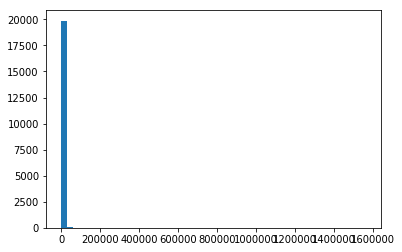

In [265]:
plt.hist(y_train, bins= 50)

In [266]:
N_INTERVALS = 700
partition = pd.Series(y_train).groupby(pd.cut(y_train, N_INTERVALS)).size()
partition

(-1560.1, 2228.714]           2315
(2228.714, 4457.429]          5412
(4457.429, 6686.143]          5001
(6686.143, 8914.857]          3106
(8914.857, 11143.571]         1978
(11143.571, 13372.286]         941
(13372.286, 15601.0]           443
(15601.0, 17829.714]           270
(17829.714, 20058.429]         188
(20058.429, 22287.143]          86
(22287.143, 24515.857]          42
(24515.857, 26744.571]          45
(26744.571, 28973.286]          25
(28973.286, 31202.0]            18
(31202.0, 33430.714]            15
(33430.714, 35659.429]          14
(35659.429, 37888.143]           7
(37888.143, 40116.857]          16
(40116.857, 42345.571]           9
(42345.571, 44574.286]           4
(44574.286, 46803.0]             3
(46803.0, 49031.714]             2
(49031.714, 51260.429]           6
(51260.429, 53489.143]           4
(53489.143, 55717.857]           7
(55717.857, 57946.571]           2
(57946.571, 60175.286]           4
(60175.286, 62404.0]             2
(62404.0, 64632.714]

In [267]:
TRSLD = 10
final_partition = partition[partition >= TRSLD].index.tolist()
final_partition.append(pd.Interval(partition[partition < TRSLD].index[0].left,
                                   partition[partition < TRSLD].index[-1].right))
final_partition

[Interval(-1560.1, 2228.714, closed='right'),
 Interval(2228.714, 4457.429, closed='right'),
 Interval(4457.429, 6686.143, closed='right'),
 Interval(6686.143, 8914.857, closed='right'),
 Interval(8914.857, 11143.571, closed='right'),
 Interval(11143.571, 13372.286, closed='right'),
 Interval(13372.286, 15601.0, closed='right'),
 Interval(15601.0, 17829.714, closed='right'),
 Interval(17829.714, 20058.429, closed='right'),
 Interval(20058.429, 22287.143, closed='right'),
 Interval(22287.143, 24515.857, closed='right'),
 Interval(24515.857, 26744.571, closed='right'),
 Interval(26744.571, 28973.286, closed='right'),
 Interval(28973.286, 31202.0, closed='right'),
 Interval(31202.0, 33430.714, closed='right'),
 Interval(33430.714, 35659.429, closed='right'),
 Interval(37888.143, 40116.857, closed='right'),
 Interval(35659.429, 1560100.0, closed='right')]

In [268]:
ser_interval_num = pd.Series(y_train).map(lambda x: [x in interval for interval in final_partition].index(True))
N_hypos_in_interval = pd.Series(y_train).groupby(ser_interval_num).size()/pd.Series(y_train).groupby(ser_interval_num).size().sum()

In [269]:
# final_partition = [[interval.left, interval.right] for interval in final_partition]
final_partition = [{'left':interval.left, 'right':interval.right} for interval in final_partition]
len(final_partition)

18

In [270]:
N_hypo_need_total = 4000

##### Select Hypos distribution: uniform or proportional to number of objects

In [271]:
N_hypo_need_partition = (N_hypos_in_interval*N_hypo_need_total).round().astype(int).tolist()

In [534]:
N_hypo_need_partition = [500 for _ in range(len(final_partition))]

In [272]:
N_hypo_need_partition

[463, 1082, 1000, 621, 396, 188, 89, 54, 38, 17, 8, 9, 5, 4, 3, 3, 3, 17]

In [273]:
%%time
hypotheses_mined_RES = PSM.mine_hypotheses(final_partition,
                                           subs_size=2,
                                           batch_size = 1000,
                                           N_hypo_need_partition=N_hypo_need_partition,
                                           N_iterations=100000, 
                                           choose_hypo_by='mean'
                                          )

Mining 1000 intersections
Mining 1000 intersections
N_mined_hypos 479 in {'right': 2228.714, 'left': -1560.1}
Mining 1000 intersections
Mining 1000 intersections
Mining 1000 intersections
Mining 1000 intersections
N_mined_hypos 1144 in {'right': 4457.429, 'left': 2228.714}
Mining 1000 intersections
Mining 1000 intersections
N_mined_hypos 1203 in {'right': 6686.143, 'left': 4457.429}
Mining 1000 intersections
Mining 1000 intersections
N_mined_hypos 1220 in {'right': 8914.857, 'left': 6686.143}
Mining 1000 intersections
Mining 1000 intersections
N_mined_hypos 566 in {'right': 11143.571, 'left': 8914.857}
Mining 1000 intersections
Mining 1000 intersections
N_mined_hypos 387 in {'right': 13372.286, 'left': 11143.571}
Mining 1000 intersections
N_mined_hypos 153 in {'right': 15601.0, 'left': 13372.286}
Mining 1000 intersections
N_mined_hypos 141 in {'right': 17829.714, 'left': 15601.0}
Mining 1000 intersections
N_mined_hypos 155 in {'right': 20058.429, 'left': 17829.714}
Mining 1000 intersec

In [274]:
%%time
PSR = PatternStructuresRegressor(df_train, y_train, features, hypotheses_mined_RES)

CPU times: user 19.6 ms, sys: 24.1 ms, total: 43.7 ms
Wall time: 42.5 ms


In [275]:
# test_obj = df_test.values[300]
# PSR.predict_test_object(test_obj)

#### Parallel through X_test (one set of params)

In [276]:
N_PROC = 50
batch_size = int(np.ceil(df_test.shape[0]/N_PROC))
batch_size

MyParamGrid = []
# for i in range(N_PROC):
for i in range(df_test.shape[0]):
    test_obj = df_test.values[i]
    args = {
        'test_obj':test_obj,
    }
    MyParamGrid.append(args)

100

In [277]:
%%time
_ = PSR.predict_test_object(df_test.values[0])

CPU times: user 4.31 s, sys: 894 ms, total: 5.2 s
Wall time: 5.2 s


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


#### Run parallel

In [278]:
%%time
import multiprocessing
pool = multiprocessing.Pool(processes=N_PROC) # use all available cores, otherwise specify the number you want as an argument

results = []
for args in MyParamGrid:
    res = pool.apply_async(PSR.predict_test_object, args=(args['test_obj'],))
    results.append(res)
    
pool.close()
pool.join()#### Run parallel

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipy

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:75: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: Mean of empty slice.
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empt

KeyboardInterrupt: 

Process ForkPoolWorker-71:
Process ForkPoolWorker-69:
Process ForkPoolWorker-93:
Process ForkPoolWorker-88:
Process ForkPoolWorker-73:
Process ForkPoolWorker-94:
Process ForkPoolWorker-66:
Process ForkPoolWorker-72:
Process ForkPoolWorker-67:
Process ForkPoolWorker-64:
Process ForkPoolWorker-92:
Traceback (most recent call last):
Process ForkPoolWorker-99:
Process ForkPoolWorker-63:
Process ForkPoolWorker-80:
Process ForkPoolWorker-65:
Process ForkPoolWorker-100:
Process ForkPoolWorker-59:
Process ForkPoolWorker-60:
Process ForkPoolWorker-56:
Process ForkPoolWorker-54:
Process ForkPoolWorker-51:
Process ForkPoolWorker-91:
Process ForkPoolWorker-86:
Process ForkPoolWorker-55:
Process ForkPoolWorker-68:
Process ForkPoolWorker-95:
Process ForkPoolWorker-58:
Process ForkPoolWorker-70:
Process ForkPoolWorker-97:
Process ForkPoolWorker-57:
Process ForkPoolWorker-62:
Process ForkPoolWorker-61:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  Fil

  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
EOFError: Ran out of input
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._tar

  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
Traceback (most recent call last):
  File "<ipython-input-261-71f19aaca42a>", line 47, in predict_test_object
    y_min_concepts = np.apply_along_axis(lambda objs: self.y_train[objs].min(), 1, self.objs_in_concepts)
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:

During handling of the above exception, another exception occurred:

  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "<ipython-i

KeyboardInterrupt
  File "<ipython-input-261-71f19aaca42a>", line 56, in <lambda>
    y_median_regressors = np.apply_along_axis(lambda objs: np.median(self.y_train[objs]), 1, objs_in_regressors)
Process ForkPoolWorker-75:
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "<ipython-input-261-71f19aaca42a>", line 51, in <lambda>
    y_std_concepts = np.apply_along_axis(lambda objs: self.y_train[objs].std(), 1, self.objs_in_concepts)
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py", line 140, in _std
    keepdims=keepdims)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py", line 140, in _std
    keepdims=keepdims)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
  File "/usr/lib/python3.5/multipr

  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "<ipython-input-261-71f19aaca42a>", line 43, in predict_test_object
    objs_in_regressors = ((((regressor_min <= self.X_expanded) | np.isnan(regressor_min)) &
  File "<ipython-input-261-71f19aaca42a>", line 44, in predict_test_object
    ((regressor_max >= self.X_expanded) | np.isnan(regressor_max))) |
KeyboardInterrupt
KeyboardInterrupt
Process ForkPoolWorker-87:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-52:
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "<ipython-input-261-71f19aaca42a>", line 43, in predict_test_object
    objs_in_regressors = ((((regressor_min <= s

#### Collect results (one set of params)

In [279]:
df_results = pd.DataFrame([res.get() for res in results])
df_results.shape

Process ForkPoolWorker-122:
Process ForkPoolWorker-144:
Process ForkPoolWorker-106:
Process ForkPoolWorker-147:
Process ForkPoolWorker-128:
Process ForkPoolWorker-124:
Process ForkPoolWorker-139:
Process ForkPoolWorker-134:


KeyboardInterrupt: 

Process ForkPoolWorker-112:
Process ForkPoolWorker-110:
Process ForkPoolWorker-133:
Process ForkPoolWorker-108:
Process ForkPoolWorker-127:
Process ForkPoolWorker-148:
Process ForkPoolWorker-118:
Process ForkPoolWorker-103:
Process ForkPoolWorker-109:
Process ForkPoolWorker-145:
Process ForkPoolWorker-120:
Process ForkPoolWorker-116:
Process ForkPoolWorker-123:
Process ForkPoolWorker-104:
Process ForkPoolWorker-102:
Process ForkPoolWorker-113:
Process ForkPoolWorker-146:
Traceback (most recent call last):
Process ForkPoolWorker-119:
Process ForkPoolWorker-135:
Traceback (most recent call last):
Process ForkPoolWorker-143:
Process ForkPoolWorker-111:
Process ForkPoolWorker-132:
Process ForkPoolWorker-121:
Process ForkPoolWorker-126:
Traceback (most recent call last):
Process ForkPoolWorker-140:
Process ForkPoolWorker-150:
Process ForkPoolWorker-117:
Process ForkPoolWorker-105:
Process ForkPoolWorker-115:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkP

  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap

  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = 

  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", li

In [280]:
df_results.head()

y_means_concepts_sc_0.0  y_means_concepts_sc_0.01  \
0              6403.818155               6281.924480   
1              6403.818155               6146.072897   
2              6403.818155               5899.845646   
3              6403.818155               5592.458414   
4              6403.818155               6834.896307   

   y_means_concepts_sc_0.02  y_means_concepts_sc_0.03  \
0               6175.027716               6105.996258   
1               5956.547172               5866.941986   
2               5753.259773               5693.696892   
3               5424.700021               5289.265495   
4               7096.190875               7249.499300   

   y_means_concepts_sc_0.04  y_means_concepts_sc_0.05  \
0               6046.594493               5886.042133   
1               5726.395616               5731.292067   
2               5709.135727               5650.757085   
3               5309.064280               5132.118664   
4               7313.456721               7447.669670   

   y_means_concepts_sc_0.06  y_means_concepts_sc_0.07  \
0               5888.319456               5907.136262   
1               5685.107200               5734.020744   
2               5551.603555               5543.888872   
3               5083.005970               5024.887595   
4               7543.920457               7559.973878   

   y_means_concepts_sc_0.08  y_means_concepts_sc_0.09  \
0               5886.474915               5913.115965   
1               5724.154458               5761.149564   
2               5490.929198               5497.709950   
3               4961.799223               4911.487003   
4               7610.882942               7615.366418   

               ...               y_median_w_regression_sc_0.91  \
0              ...                                 5618.089629   
1              ...                                 5949.871742   
2              ...                                 4787.167652   
3              ...                                 5390.136364   
4              ...                                10338.676397   

   y_median_w_regression_sc_0.92  y_median_w_regression_sc_0.93  \
0                    5611.420000                    5611.420000   
1                    5949.871742                    5991.135192   
2                    4787.167652                    4752.576923   
3                    5390.136364                    5390.136364   
4                   10338.676397                   10338.676397   

   y_median_w_regression_sc_0.94  y_median_w_regression_sc_0.95  \
0                    5611.420000                    5611.420000   
1                    5991.135192                    5994.148539   
2                    4752.576923                    4752.576923   
3                    5390.136364                    5390.136364   
4                   10338.676397                   10338.676397   

   y_median_w_regression_sc_0.96  y_median_w_regression_sc_0.97  \
0                    5611.420000                    5611.420000   
1                    5994.148539                    5987.357143   
2                    4752.576923                    4752.576923   
3                    5390.136364                    5390.136364   
4                   10357.367347                   10357.367347   

   y_median_w_regression_sc_0.98  y_median_w_regression_sc_0.99  \
0                    5611.420000                    5611.420000   
1                    5987.357143                    5987.357143   
2                    4752.576923                    4752.576923   
3                    5390.136364                    5390.136364   
4                   10357.367347                   10357.367347   

   y_median_w_regression_sc_1.0  
0                   5611.420000  
1                   5987.357143  
2                   4752.576923  
3                   5390.136364  
4                  10357.367347  

[5 rows x 808 columns]

In [281]:
df_results.fillna(y_train.mean(), inplace=True)

In [282]:
y_test.shape

(5000,)

In [283]:
df_results.values

array([[6403.81815519, 6281.92447955, 6175.02771644, ..., 5611.42      ,
        5611.42      , 5611.42      ],
       [6403.81815519, 6146.07289681, 5956.5471719 , ..., 5987.35714286,
        5987.35714286, 5987.35714286],
       [6403.81815519, 5899.84564599, 5753.25977323, ..., 4752.57692308,
        4752.57692308, 4752.57692308],
       ...,
       [6403.81815519, 5993.63034523, 6040.7039248 , ..., 9598.5       ,
        9598.5       , 9598.5       ],
       [6403.81815519, 6494.39551549, 6458.68040361, ..., 6303.55161356,
        6235.87743061, 6242.98484848],
       [6403.81815519, 6794.16370414, 6709.28326662, ..., 5318.20651243,
        5331.9       , 5331.9       ]])

In [284]:
MAPE = np.abs((df_results.values - y_test[:,None])/y_test[:,None]).mean(axis=0)*100
MAPE.min()

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

In [285]:
MAE = np.abs(df_results.values - y_test[:,None]).mean(axis=0)*100
MAE.min()

336095.084

In [488]:
# Intervals 600
RMSE = np.sqrt(((df_results.values - y_test[:,None])**2).mean(axis=0))
MAE = np.abs(df_results.values - y_test[:,None]).mean(axis=0)
RMSE.min()
MAE.min()

4984.578434943983

2631.184526685391

In [433]:
# Intervals 900
RMSE = np.sqrt(((df_results.values - y_test[:,None])**2).mean(axis=0))
MAE = np.abs(df_results.values - y_test[:,None]).mean(axis=0)
RMSE.min()
MAE.min()

5097.905114128613

2636.66818756281

In [415]:
# Intervals 700
RMSE = np.sqrt(((df_results.values - y_test[:,None])**2).mean(axis=0))
MAE = np.abs(df_results.values - y_test[:,None]).mean(axis=0)
RMSE.min()
MAE.min()

4979.684680836611

2563.456446365705

In [397]:
# Intervals 500
RMSE = np.sqrt(((df_results.values - y_test[:,None])**2).mean(axis=0))
MAE = np.abs(df_results.values - y_test[:,None]).mean(axis=0)
RMSE.min()
MAE.min()

4960.117637647895

2633.4864273073963

In [379]:
# Intervals 300
RMSE = np.sqrt(((df_results.values - y_test[:,None])**2).mean(axis=0))
MAE = np.abs(df_results.values - y_test[:,None]).mean(axis=0)
RMSE.min()
MAE.min()

5093.910194113027

2683.9872101189812

### Benchmarks

In [212]:
from sklearn import ensemble, model_selection
from sklearn import tree
from sklearn import neighbors

In [213]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [214]:
df_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### RF

In [215]:
np.random.seed(42)

In [216]:
param_grid = {
    'min_samples_leaf': [1,2,4,8,16,32],
    'min_samples_split': [2,4,8,16,32,64],
    'n_estimators': [100,500,1000],
    'n_jobs': [-1],
    'verbose': [1]
}

In [217]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    clf = ensemble.RandomForestRegressor(**params)
    clf.fit(df_train.fillna(df_train.mean()), y_train)
    METRIC_LIST.append({
        'train':metrics.mean_absolute_error(y_train, clf.predict(df_train.fillna(df_train.mean()))),
        'test':metrics.mean_absolute_error(y_test, clf.predict(df_test.fillna(df_train.mean()))),
    })
    METRIC_LIST[-1]
    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2461.9429042296274, 'train': 965.0870674127124}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2452.148380705828, 'train': 953.4685832461364}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished


{'test': 2453.891007921035, 'train': 944.5501561726553}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.2s finished


{'test': 2451.460022784116, 'train': 1102.7733499664696}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2445.4226537034447, 'train': 1085.6317298469194}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2441.430271916074, 'train': 1088.104886067854}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2435.807067724061, 'train': 1401.25305409474}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2424.239673517403, 'train': 1395.374425187946}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2424.1499566045145, 'train': 1392.4415263403569}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2408.417331425542, 'train': 1736.9984989319641}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2406.454418214656, 'train': 1730.7470157755852}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2404.962029835821, 'train': 1734.5469211019483}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2398.3903931832665, 'train': 2009.0204514175236}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2400.085467975188, 'train': 2000.288121813703}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2397.4781827782413, 'train': 2000.3622217527416}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2406.8698405761497, 'train': 2191.1651227775565}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2401.3868990753485, 'train': 2187.9159998421073}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2397.642065824555, 'train': 2188.35677686353}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2439.565940780861, 'train': 1275.4716540204347}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2431.823254919198, 'train': 1278.849749401246}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.7s finished


{'test': 2433.6127085177036, 'train': 1281.2351956822167}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2439.6899782563596, 'train': 1296.7477929104389}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2435.3669553471127, 'train': 1282.937302596902}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished


{'test': 2426.7238298374705, 'train': 1276.8166629886146}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2417.161667307041, 'train': 1544.8398970663902}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2416.27529677327, 'train': 1536.2774703048017}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2413.2061629058003, 'train': 1536.7596617969325}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2410.5978132010414, 'train': 1836.1469720120963}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2397.819490090918, 'train': 1831.4156821358174}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2400.311585718092, 'train': 1831.4255378372889}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2394.2936133113617, 'train': 2078.054416088895}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2397.1726873543957, 'train': 2077.6828793467453}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2394.1291546883754, 'train': 2075.7855434434227}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2389.2485732507453, 'train': 2255.792085969976}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2393.361983025905, 'train': 2251.679004982828}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2393.5303687579894, 'train': 2251.5699919151193}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2436.563379472463, 'train': 1764.6502121078015}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2449.8026632172423, 'train': 1762.6984484660663}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2449.737650132423, 'train': 1762.5613980234102}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2450.6345374953835, 'train': 1764.9981912572932}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2452.348507054337, 'train': 1768.4974630978122}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished


{'test': 2438.3498036469673, 'train': 1761.932720300012}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2433.8452380677245, 'train': 1766.526303863072}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2439.3066085508617, 'train': 1759.8243382829019}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2449.1260958396724, 'train': 1764.747172526829}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2427.772823897962, 'train': 1982.0819225401078}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2432.264298171279, 'train': 1975.7804218739632}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2443.5538589353414, 'train': 1981.9139723938256}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2423.403200068894, 'train': 2182.238510567327}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2437.227108679902, 'train': 2180.49961250461}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2417.594380903104, 'train': 2175.0673129599104}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.2s finished


{'test': 2449.4748355752563, 'train': 2343.481769658838}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2427.2007210760817, 'train': 2332.4073457852855}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2431.368982494165, 'train': 2333.9597513905196}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2456.3126293485157, 'train': 2116.6652970287314}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2462.9974551764544, 'train': 2123.223104619853}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2456.941812924143, 'train': 2122.1988211979983}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2464.411102333387, 'train': 2123.7918833502263}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2462.9548664319145, 'train': 2123.970137911375}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2460.3617757771417, 'train': 2120.7765932171637}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2476.740825464552, 'train': 2132.6588165539547}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2464.4121868850348, 'train': 2126.6829930192616}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2462.6957413753025, 'train': 2122.386979333751}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2471.0434470917357, 'train': 2123.8316620748396}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2456.1696361601, 'train': 2118.666551360171}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2464.8313625207134, 'train': 2124.1195752743024}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2454.32251627118, 'train': 2249.3813554882045}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2450.244208695969, 'train': 2255.3719385800605}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2451.935748680058, 'train': 2252.6665559535227}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2468.8525404725306, 'train': 2391.061504898833}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2453.762821595966, 'train': 2379.377759506387}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2455.8869977342524, 'train': 2382.3875841161685}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2453.129192817238, 'train': 2358.3056247639065}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2458.597823310997, 'train': 2360.0184335649997}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2458.4412053790206, 'train': 2362.5906740280475}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2456.733059575438, 'train': 2359.902044381847}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2457.815849779862, 'train': 2359.003466521859}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2461.7589802581288, 'train': 2363.5134051447358}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2455.3233257700304, 'train': 2359.0764079051264}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2464.5223441163616, 'train': 2365.6670422421366}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2458.1107025054926, 'train': 2359.8413325514002}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2472.619785623688, 'train': 2377.216461633962}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2457.5998538472427, 'train': 2362.03064327458}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2456.5948597660226, 'train': 2362.1454447348897}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2451.786126724809, 'train': 2364.8975104126225}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2462.350748430629, 'train': 2365.922384978304}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2458.334729385568, 'train': 2361.0827062549474}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2457.8035486648264, 'train': 2436.542487946185}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.4s finished


{'test': 2459.112727393292, 'train': 2445.1107391958208}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2461.11970438382, 'train': 2445.8282235658207}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2455.608949141069, 'train': 2522.3486090105375}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2446.921363398247, 'train': 2520.382944131753}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2451.5125792519843, 'train': 2522.372701377576}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2453.1389764615, 'train': 2528.7979533874072}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2449.9182460918946, 'train': 2522.5883480055777}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2450.1767450043235, 'train': 2522.9694501387653}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2444.2260620472766, 'train': 2519.849991965884}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2455.8471027672326, 'train': 2528.805024764753}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2446.4634681893785, 'train': 2519.8976796225948}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2446.2120462362072, 'train': 2523.357117486822}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2449.6745398379912, 'train': 2521.014126405456}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2449.0021735056234, 'train': 2521.9255732511647}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2447.0251057983637, 'train': 2521.785209613503}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2453.7994542964198, 'train': 2523.3709376863535}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=32,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2450.49593521906, 'train': 2524.3697288874105}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.1s finished


{'test': 2444.10903371288, 'train': 2521.017684305535}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 500 out of 500 | elapsed:    0.3s finished


{'test': 2453.0958773902007, 'train': 2523.4885848912245}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=32, min_samples_split=64,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'test': 2450.949968360793, 'train': 2522.1937031331167}

In [218]:
pd.DataFrame(METRIC_LIST).min()

test     2389.248573
train     944.550156
dtype: float64

In [221]:
pd.DataFrame(METRIC_LIST).min() / y_train.mean()

test     0.356655
train    0.140998
dtype: float64

#### DT

In [222]:
np.random.seed(42)

In [223]:
param_grid = {
    'min_samples_leaf': [1,2,4,8,16,32],
    'min_samples_split': [2,4,8,16,32,64],
}

In [224]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    clf = tree.DecisionTreeRegressor(**params)
    clf.fit(df_train.fillna(df_train.mean()), y_train)
    METRIC_LIST.append({
        'train':metrics.mean_absolute_error(y_train, clf.predict(df_train.fillna(df_train.mean()))),
        'test':metrics.mean_absolute_error(y_test, clf.predict(df_test.fillna(df_train.mean()))),
    })
    

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=64, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=64, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=64, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=64, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=16,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=16,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=16,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=16,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=16,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=16,
           min_samples_split=64, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=32,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=32,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=32,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=32,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=32,
           min_samples_split=32, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=32,
           min_samples_split=64, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [225]:
pd.DataFrame(METRIC_LIST).min()

test     2557.257826
train       5.905290
dtype: float64

In [227]:
pd.DataFrame(METRIC_LIST).min() / y_train.mean()

test     0.381734
train    0.000882
dtype: float64

#### kNN

In [228]:
np.random.seed(42)

In [229]:
param_grid = {
    'leaf_size': [1,2,4,8,16,32,64],
    'n_neighbors': [1,2,4,8,16,32,64],
    'p': [1,2,3],
    'n_jobs': [-1],
}

In [230]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    clf = neighbors.KNeighborsRegressor(**params)
    clf.fit(df_train.fillna(df_train.mean()), y_train)
    METRIC_LIST.append({
        'train':metrics.mean_absolute_error(y_train, clf.predict(df_train.fillna(df_train.mean()))),
        'test':metrics.mean_absolute_error(y_test, clf.predict(df_test.fillna(df_train.mean()))),
    })
    

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=4, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=4, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=4, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=4, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=4, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=4, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=16, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=32, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=8, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=16, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=32, p=3,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=1,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=64, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=64, p=3,
          weights='uniform')

In [231]:
pd.DataFrame(METRIC_LIST).min()

test     2868.413416
train       6.043200
dtype: float64

In [232]:
pd.DataFrame(METRIC_LIST).min() / y_train.mean()

test     0.428182
train    0.000902
dtype: float64

#### xgboost

In [233]:
np.random.seed(42)

In [234]:
import xgboost as xgb

In [235]:
dtrain = xgb.DMatrix(df_train.fillna(df_train.mean()), label=y_train)
dtest = xgb.DMatrix(df_test.fillna(df_train.mean()), label=y_test)

In [236]:
param_grid = {
        'min_child_weight': [1, 5, 10, 20],
        'gamma': [0.5, 1, 1.5, 2, 5, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7],
        'nthread': [-1],
#         'eval_metric': ['mae'],
        "objective": ["reg:linear"], 
        }

In [237]:
def xgb_mape(preds, dtrain):
    labels = dtrain.get_label()
    return('mape', -np.mean(np.abs((labels - preds) / (labels+1))))

In [238]:
Grid = list(model_selection.ParameterGrid(param_grid))

METRIC_LIST = []
for params in Grid:
    evallist = [(dtrain, 'train'), (dtest, 'eval')]
    num_round = 100
#     bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10)
    bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10, feval=xgb_mape)
    METRIC_LIST.append({
        'train':metrics.mean_absolute_error(y_train, bst.predict(dtrain)),
        'test':metrics.mean_absolute_error(y_test, bst.predict(dtest)),
    })
    

[08:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14815.6	eval-rmse:7124.07	train-mape:-12.4102	eval-mape:-13.7057
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14293.1	eval-rmse:6235.56	train-mape:-10.5417	eval-mape:-11.2601
[08:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14069.6	eval-rmse:5748.79	train-mape:-23.7472	eval-mape:-27.1726
[08:29:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13773.7	eval-rmse:5490.16	train-mape:-32.561	eval-mape:-37.7035
[08:29:38] /workspace/src/tree/updater_prune.c

[7]	train-rmse:10459.7	eval-rmse:4683.15	train-mape:-23.9841	eval-mape:-24.0719
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:10433.7	eval-rmse:4661.66	train-mape:-25.14	eval-mape:-25.9745
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:10386.8	eval-rmse:4607.36	train-mape:-20.4254	eval-mape:-20.6671
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:10346.2	eval-rmse:4595.05	train-mape:-19.6618	eval-mape:-19.7009
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:10332.9	eval-rmse:4572.79	train-mape:-20.9065	eval-mape:-21.0723
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned node

[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11322.1	eval-rmse:4811.9	train-mape:-25.3146	eval-mape:-27.7757
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:11062.1	eval-rmse:4613.99	train-mape:-23.319	eval-mape:-25.6964
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:10774.6	eval-rmse:4839.75	train-mape:-23.8877	eval-mape:-26.4252
Stopping. Best iteration:
[4]	train-rmse:12933	eval-rmse:5323.54	train-mape:-39.2673	eval-mape:-45.1749

[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15681.3	eval-rmse:7202.32	train-mape:-3.19643	eval-mape:-3.65405
Multiple eval metrics have been passed: 'eval-mape' will be used for early stoppin

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14234.3	eval-rmse:6117.77	train-mape:-12.0035	eval-mape:-13.1246
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14011.9	eval-rmse:5605.14	train-mape:-24.5446	eval-mape:-28.4156
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13735.5	eval-rmse:5327.78	train-mape:-33.0267	eval-mape:-37.8489
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13591.4	eval-rmse:5237.61	train-mape:-39.2618	eval-mape:-44.9876
[08:29:39] /workspace/src/tree/updater_prune.

[4]	train-rmse:14230	eval-rmse:5146.06	train-mape:-45.8142	eval-mape:-54.3248
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:14150.2	eval-rmse:5034.9	train-mape:-34.5915	eval-mape:-40.0129
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:14092.4	eval-rmse:5030.95	train-mape:-27.6162	eval-mape:-31.4753
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:13770.4	eval-rmse:4840.9	train-mape:-28.4652	eval-mape:-32.8395
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:13737.9	eval-rmse:4875.62	train-mape:-25.1178	eval-mape:-28.894
[08:29:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, ma

[12]	train-rmse:12317.4	eval-rmse:4813.22	train-mape:-21.2672	eval-mape:-21.7581
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12112.2	eval-rmse:4872.21	train-mape:-21.2378	eval-mape:-21.7583
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:12104.1	eval-rmse:4852.52	train-mape:-22.9966	eval-mape:-23.4947
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:11947.7	eval-rmse:4927	train-mape:-22.3459	eval-mape:-23.0401
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:11832.3	eval-rmse:4923.23	train-mape:-22.5129	eval-mape:-23.2259
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned no

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:15196.2	eval-rmse:6204.38	train-mape:-21.6215	eval-mape:-24.8458
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:14285.7	eval-rmse:6163.89	train-mape:-16.9251	eval-mape:-18.5376
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:11900.6	eval-rmse:5778.07	train-mape:-18.7173	eval-mape:-20.0402
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:10682	eval-rmse:5533.58	train-mape:-16.425	eval-mape:-16.9928
[08:29:40] /workspace/src/tree/updater_prune.cc:

[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:9231.39	eval-rmse:5676.3	train-mape:-19.8506	eval-mape:-20.903
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:8967.46	eval-rmse:5509	train-mape:-20.057	eval-mape:-21.153
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:8587.24	eval-rmse:5658.41	train-mape:-20.0381	eval-mape:-21.0178
Stopping. Best iteration:
[4]	train-rmse:12084.7	eval-rmse:5423.21	train-mape:-38.9716	eval-mape:-44.7289

[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15677.5	eval-rmse:7202.75	train-mape:-3.00937	eval-mape:-3.3634
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.



[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11686.2	eval-rmse:5440.55	train-mape:-23.2926	eval-mape:-26.5806
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:11533	eval-rmse:5477.46	train-mape:-21.5554	eval-mape:-24.5656
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:11447.5	eval-rmse:5433.5	train-mape:-22.3082	eval-mape:-24.7919
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:11129.3	eval-rmse:5173.92	train-mape:-21.4394	eval-mape:-23.658
[08:29:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:11047.3	eval-rmse:5199.67	train-mape:-20.029	eval-ma

[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13974.8	eval-rmse:5587.22	train-mape:-24.0339	eval-mape:-30.6749
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13747.4	eval-rmse:5305.6	train-mape:-32.6439	eval-mape:-40.524
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13630.5	eval-rmse:5221.6	train-mape:-38.658	eval-mape:-47.3797
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:13308.5	eval-rmse:5254.72	train-mape:-29.3164	eval-mape:-36.1064
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:13058.2	eval-rmse:5345.3	train-mape:-23.3634	eval-mape

[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:7425.2	eval-rmse:7720.1	train-mape:-15.059	eval-mape:-16.4437
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:7166.82	eval-rmse:7692.14	train-mape:-14.9523	eval-mape:-16.9131
Stopping. Best iteration:
[4]	train-rmse:12035.8	eval-rmse:6778.27	train-mape:-37.5117	eval-mape:-44.5372

[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:13303.6	eval-rmse:7039.2	train-mape:-6.05307	eval-mape:-6.66133
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:11766

[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12957.4	eval-rmse:5758.28	train-mape:-33.9076	eval-mape:-47.866
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:12240.3	eval-rmse:5645.42	train-mape:-25.8927	eval-mape:-37.917
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:11608.9	eval-rmse:5730.99	train-mape:-22.1398	eval-mape:-33.5264
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:11024	eval-rmse:5394.41	train-mape:-20.5774	eval-mape:-31.5474
[08:29:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:10759.9	eval-rmse:5340.3	train-mape:-18.1239	eval-mape

[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:8222.8	eval-rmse:5869.23	train-mape:-15.3662	eval-mape:-16.8943
[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:7949.1	eval-rmse:5771.07	train-mape:-15.039	eval-mape:-16.4966
[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:7789.55	eval-rmse:5948.19	train-mape:-15.5355	eval-mape:-16.979
[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:7387.46	eval-rmse:5909.86	train-mape:-15.044	eval-mape:-16.3349
Stopping. Best iteration:
[5]	train-rmse:11048.3	eval-rmse:5455.61	train-mape:-24.4807	eval-mape:-26.3947

[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 

[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12937.8	eval-rmse:5360.52	train-mape:-16.9068	eval-mape:-18.2042
[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12426.1	eval-rmse:5077.58	train-mape:-17.6553	eval-mape:-18.8396
[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:12206.8	eval-rmse:5004.62	train-mape:-21.9787	eval-mape:-23.8551
[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:11845.5	eval-rmse:4835.94	train-mape:-17.4602	eval-mape:-18.8656
[08:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:11731.7	eval-rmse:4813.15	train-mape:-19.1162	eval

[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:11927.1	eval-rmse:5280.59	train-mape:-14.3477	eval-mape:-17.3859
Stopping. Best iteration:
[4]	train-rmse:13594.4	eval-rmse:5172.22	train-mape:-31.4835	eval-mape:-39.648

[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:15454.9	eval-rmse:7286.9	train-mape:-2.48678	eval-mape:-2.77072
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14921.8	eval-rmse:6264.25	train-mape:-20.407	eval-mape:-23.6313
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:14370

[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:6154.65	eval-rmse:6415.36	train-mape:-14.3153	eval-mape:-17.8092
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:5636.4	eval-rmse:6344.23	train-mape:-12.4026	eval-mape:-15.5177
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:5418.3	eval-rmse:6412.95	train-mape:-10.9943	eval-mape:-13.425
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:5365.27	eval-rmse:6402.9	train-mape:-11.4924	eval-mape:-13.6974
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:5081.85	eval-rmse:6377.01	train-mape:-11.032	ev

[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:11912.1	eval-rmse:5325.17	train-mape:-30.5008	eval-mape:-38.7407
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:11100.4	eval-rmse:5334.38	train-mape:-22.9832	eval-mape:-29.8631
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:10561.4	eval-rmse:5337.94	train-mape:-18.7428	eval-mape:-24.0677
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:9757.79	eval-rmse:5246.88	train-mape:-17.1916	eval-mape:-22.0722
[08:29:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:9504.36	eval-rmse:5230.4	train-mape:-14.5134	eva

Stopping. Best iteration:
[4]	train-rmse:13502.1	eval-rmse:5277.56	train-mape:-30.5778	eval-mape:-41.122

[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:14598.2	eval-rmse:6858.17	train-mape:-3.08845	eval-mape:-3.38347
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13924.4	eval-rmse:6015.83	train-mape:-4.08402	eval-mape:-4.39928
[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13618.1	eval-rmse:5556.6	train-mape:-15.9427	eval-mape:-22.499
[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13325

[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:12871	eval-rmse:4983.99	train-mape:-16.0798	eval-mape:-19.4041
[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:12748.4	eval-rmse:5081.02	train-mape:-14.7078	eval-mape:-17.6979
[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:12704.6	eval-rmse:5101.34	train-mape:-15.0054	eval-mape:-17.2695
[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:12618.3	eval-rmse:5125.6	train-mape:-14.5358	eval-mape:-16.3322
[08:29:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:12510.1	eval-rmse:5235.42	train-mape:-14.6107	ev

[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:10321.2	eval-rmse:6703.83	train-mape:-22.4558	eval-mape:-34.6633
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:9202.35	eval-rmse:6765.81	train-mape:-17.4511	eval-mape:-27.7
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:8188.88	eval-rmse:6634.96	train-mape:-15.2314	eval-mape:-25.3839
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:7551.26	eval-rmse:6655.69	train-mape:-13.5775	eval-mape:-23.5157
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:7486.45	eval-rmse:6663.79	train-mape:-14.2825	ev

[0]	train-rmse:14713.2	eval-rmse:6959.59	train-mape:-1.97224	eval-mape:-2.23753
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:13929.8	eval-rmse:6265.41	train-mape:-2.76816	eval-mape:-3.1185
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13512.9	eval-rmse:6043.12	train-mape:-14.9784	eval-mape:-27.019
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:12987.4	eval-rmse:5807.41	train-mape:-23.5196	eval-mape:-36.7345
[08:29:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:12728.7	eval-rmse:5680.99	tr

[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:8875.57	eval-rmse:5623.52	train-mape:-15.4186	eval-mape:-19.0109
[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:8503.91	eval-rmse:5628.86	train-mape:-13.5708	eval-mape:-17.2195
[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:8200.52	eval-rmse:5855.99	train-mape:-11.6644	eval-mape:-15.2854
[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:7934.79	eval-rmse:5966.37	train-mape:-12.442	eval-mape:-15.8989
Stopping. Best iteration:
[1]	train-rmse:13901.8	eval-rmse:6601.37	train-mape:-19.4158	eval-mape:-22.8518

[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 root

[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:12518.3	eval-rmse:5269.48	train-mape:-12.7463	eval-mape:-15.0067
[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:11975.7	eval-rmse:4977.56	train-mape:-10.7331	eval-mape:-12.7269
[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:11685	eval-rmse:4914.2	train-mape:-14.6207	eval-mape:-19.0667
[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:11397	eval-rmse:4927.28	train-mape:-12.8203	eval-mape:-16.4626
[08:29:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:11209.5	eval-rmse:4971.12	train-mape:-15.77	eval-m

[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:11757.6	eval-rmse:5227.45	train-mape:-14.37	eval-mape:-15.7541
Stopping. Best iteration:
[4]	train-rmse:13475	eval-rmse:5180.06	train-mape:-31.7754	eval-mape:-38.5565

[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:15445.8	eval-rmse:7283.37	train-mape:-2.4727	eval-mape:-2.77679
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:14865.9	eval-rmse:6286.03	train-mape:-20.4728	eval-mape:-23.6264
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:1428

[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:10289.9	eval-rmse:4968.68	train-mape:-25.9831	eval-mape:-28.2897
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:9485.09	eval-rmse:5072.47	train-mape:-24.9514	eval-mape:-27.034
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:9455.24	eval-rmse:5044.29	train-mape:-21.5798	eval-mape:-22.8423
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:9433.98	eval-rmse:5006.09	train-mape:-22.6699	eval-mape:-24.4059
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:8834.02	eval-rmse:4959.96	train-mape:-22.6682	e

[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12507.8	eval-rmse:5621.85	train-mape:-19.7932	eval-mape:-21.0373
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:11713.2	eval-rmse:6172.81	train-mape:-19.9791	eval-mape:-21.2112
Stopping. Best iteration:
[4]	train-rmse:13834.7	eval-rmse:5292.69	train-mape:-38.4603	eval-mape:-44.4081

[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14102.1	eval-rmse:7107.67	train-mape:-14.327	eval-mape:-16.2437
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:13

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14473.8	eval-rmse:6227.34	train-mape:-18.7221	eval-mape:-21.3582
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14254.1	eval-rmse:5738.05	train-mape:-31.3321	eval-mape:-36.5884
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13962.4	eval-rmse:5466.14	train-mape:-40.249	eval-mape:-47.5658
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13893.2	eval-rmse:5299.85	train-mape:-46.1334	eval-mape:-54.5491
[08:29:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train

[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12831.4	eval-rmse:4356.17	train-mape:-22.5862	eval-mape:-24.045
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12788.3	eval-rmse:4353.13	train-mape:-19.0704	eval-mape:-19.7708
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:12777.7	eval-rmse:4330.09	train-mape:-20.2292	eval-mape:-20.7741
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:12179.2	eval-rmse:4450.7	train-mape:-19.718	eval-mape:-20.3518
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:11763.3	eval-rmse:4627.61	train-mape:-20.7581	eva

[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12848.3	eval-rmse:4859.44	train-mape:-25.8152	eval-mape:-28.221
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:12606.5	eval-rmse:4953.07	train-mape:-23.9501	eval-mape:-26.0111
Stopping. Best iteration:
[4]	train-rmse:13757.6	eval-rmse:5272.73	train-mape:-43.2148	eval-mape:-50.3101

[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15681.3	eval-rmse:7202.32	train-mape:-3.19643	eval-mape:-3.65405
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:15

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:12230.4	eval-rmse:6800.06	train-mape:-9.29792	eval-mape:-10.2842
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:11964.6	eval-rmse:6345.81	train-mape:-21.3893	eval-mape:-25.0629
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:11589.2	eval-rmse:6073.57	train-mape:-30.1788	eval-mape:-35.1625
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:10735.5	eval-rmse:6376.74	train-mape:-36.168	eval-mape:-41.8365
[08:29:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	train

[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:10929.8	eval-rmse:5693.37	train-mape:-20.4648	eval-mape:-22.2944
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:10699.6	eval-rmse:5586.55	train-mape:-20.2952	eval-mape:-21.8111
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:10257.6	eval-rmse:5750.25	train-mape:-20.0183	eval-mape:-21.582
Stopping. Best iteration:
[4]	train-rmse:13185.2	eval-rmse:5538.45	train-mape:-37.3284	eval-mape:-44.8457

[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14023.5	eval-rmse:7099.64	train-mape:-8.50376	eval-mape:-9.46453
Multiple eval metrics have been passed: 'eval-mape' will be used for early stop

[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12591.7	eval-rmse:5431.55	train-mape:-23.0587	eval-mape:-31.1035
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:12471.6	eval-rmse:5669.12	train-mape:-21.0658	eval-mape:-28.5071
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:12446.5	eval-rmse:5612.77	train-mape:-21.2918	eval-mape:-28.4592
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:12187.7	eval-rmse:5707.17	train-mape:-18.4442	eval-mape:-24.8515
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:12030.2	eval-rmse:6219.36	train-mape:-16.8881	ev

[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:14479.4	eval-rmse:5490.81	train-mape:-21.8096	eval-mape:-26.8188
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:14235.2	eval-rmse:5205.18	train-mape:-29.7959	eval-mape:-36.8611
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:14142	eval-rmse:5086.38	train-mape:-36.1692	eval-mape:-43.9334
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:13909.9	eval-rmse:5071.58	train-mape:-28.6921	eval-mape:-34.819
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:13716.1	eval-rmse:5129.73	train-mape:-22.4093	eval-ma

[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:12260.4	eval-rmse:4999.66	train-mape:-18.6733	eval-mape:-19.6762
Stopping. Best iteration:
[1]	train-rmse:15197	eval-rmse:6203.13	train-mape:-21.6349	eval-mape:-24.8954

[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14737.5	eval-rmse:7059.36	train-mape:-6.68113	eval-mape:-7.10293
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13469.1	eval-rmse:7506.12	train-mape:-10.8315	eval-mape:-12.5755
[08:29:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:1317

[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:7495.45	eval-rmse:5164.1	train-mape:-18.6777	eval-mape:-20.2762
[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:7033.16	eval-rmse:5814.16	train-mape:-20.2013	eval-mape:-22.0413
[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:6951.92	eval-rmse:5803.74	train-mape:-21.4435	eval-mape:-23.7545
[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:6560.48	eval-rmse:5768.84	train-mape:-17.2623	eval-mape:-18.9382
[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:6481.4	eval-rmse:5749.66	train-mape:-14.6955	eval-

[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:8659.29	eval-rmse:5111.87	train-mape:-14.6793	eval-mape:-15.3489
[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:8336.22	eval-rmse:5211.11	train-mape:-14.514	eval-mape:-15.1269
Stopping. Best iteration:
[4]	train-rmse:11973	eval-rmse:5382.23	train-mape:-33.6167	eval-mape:-39.3329

[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:15454.7	eval-rmse:7287.4	train-mape:-2.46584	eval-mape:-2.68652
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14885

[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:13266.4	eval-rmse:5228.99	train-mape:-33.7697	eval-mape:-39.5002
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:12693.5	eval-rmse:5418.3	train-mape:-24.9532	eval-mape:-28.9005
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:12282.7	eval-rmse:5477.5	train-mape:-20.69	eval-mape:-23.3486
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:11688.5	eval-rmse:5473.67	train-mape:-18.6182	eval-mape:-21.1076
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:11545.1	eval-rmse:5629.16	train-mape:-16.1371	eval-map

Stopping. Best iteration:
[4]	train-rmse:14025.3	eval-rmse:5144.21	train-mape:-35.0786	eval-mape:-42.8895

[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14889.7	eval-rmse:6852.12	train-mape:-3.27866	eval-mape:-3.67009
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14249.8	eval-rmse:5952.52	train-mape:-4.11377	eval-mape:-4.44111
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13940.6	eval-rmse:5518.06	train-mape:-17.0224	eval-mape:-23.3435
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:137

[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:7385.49	eval-rmse:6900.67	train-mape:-16.1839	eval-mape:-21.7953
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:6891.56	eval-rmse:6945.37	train-mape:-14.933	eval-mape:-20.1982
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:6717.64	eval-rmse:6937.31	train-mape:-15.4192	eval-mape:-19.9631
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:6270.55	eval-rmse:6763.58	train-mape:-15.344	eval-mape:-20.8296
[08:29:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:6005.39	eval-rmse:6744.12	train-mape:-15.1456

[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:12043.8	eval-rmse:5593.62	train-mape:-23.2491	eval-mape:-36.0336
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:11219.3	eval-rmse:5909.57	train-mape:-19.1972	eval-mape:-31.2165
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:10639.2	eval-rmse:5615.45	train-mape:-16.1526	eval-mape:-27.2612
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:10385.1	eval-rmse:5534.34	train-mape:-15.9598	eval-mape:-25.8697
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:10355.1	eval-rmse:5499.02	train-mape:-16.3953	ev

[0]	train-rmse:14975.6	eval-rmse:6893.32	train-mape:-2.12584	eval-mape:-2.32543
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:14349.4	eval-rmse:6062.75	train-mape:-3.03891	eval-mape:-3.67743
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:14038.7	eval-rmse:5674.16	train-mape:-15.2017	eval-mape:-25.0846
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13673.7	eval-rmse:5467.51	train-mape:-23.2198	eval-mape:-34.1717
[08:29:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:13502.1	eval-rmse:5277.56	tra

[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:11161.2	eval-rmse:5129.25	train-mape:-17.5276	eval-mape:-20.0054
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:10511.7	eval-rmse:5110.04	train-mape:-15.3032	eval-mape:-17.0178
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:10159.8	eval-rmse:5367.98	train-mape:-14.1066	eval-mape:-15.6787
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:10030.1	eval-rmse:5387.04	train-mape:-15.9109	eval-mape:-16.5652
Stopping. Best iteration:
[1]	train-rmse:14556	eval-rmse:6337.87	train-mape:-20.0995	eval-mape:-23.4102

[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8

[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13431.9	eval-rmse:5231.25	train-mape:-14.2727	eval-mape:-15.2708
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12940.3	eval-rmse:5060.46	train-mape:-14.1574	eval-mape:-15.3638
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:12788.5	eval-rmse:4983.37	train-mape:-18.5349	eval-mape:-20.8815
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:12504.8	eval-rmse:4903.82	train-mape:-15.1913	eval-mape:-17.1167
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12373.1	eval-rmse:4915.23	train-mape:-17.8881	eva

[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:4371.77	eval-rmse:6618.98	train-mape:-9.47213	eval-mape:-14.6055
Stopping. Best iteration:
[4]	train-rmse:9383.77	eval-rmse:6848.63	train-mape:-29.3924	eval-mape:-40.5014

[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:14113.7	eval-rmse:7741.98	train-mape:-2.15798	eval-mape:-2.38724
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:12547.2	eval-rmse:6885.78	train-mape:-19.2836	eval-mape:-23.1338
[08:29:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rms

[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:9281.85	eval-rmse:5338.9	train-mape:-14.5268	eval-mape:-22.2265
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:8843.41	eval-rmse:5240.83	train-mape:-13.3165	eval-mape:-21.1875
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:8514.53	eval-rmse:5400.27	train-mape:-12.6983	eval-mape:-20.5897
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8421.69	eval-rmse:5399.16	train-mape:-13.2722	eval-mape:-20.9887
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:8131.71	eval-rmse:5547.33	train-mape:-12.5

[3]	train-rmse:13187.8	eval-rmse:5441.61	train-mape:-23.3336	eval-mape:-34.2126
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:12963.7	eval-rmse:5379.64	train-mape:-28.9818	eval-mape:-40.6828
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:12371.3	eval-rmse:5556.86	train-mape:-22.1392	eval-mape:-31.9298
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:11922.7	eval-rmse:5588.06	train-mape:-17.2903	eval-mape:-26.0969
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:11334.9	eval-rmse:5557.52	train-mape:-14.9855	eval-mape:-23.8101
[08:29:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned 

[14]	train-rmse:12345.5	eval-rmse:5261.17	train-mape:-14.1515	eval-mape:-16.4432
Stopping. Best iteration:
[4]	train-rmse:13974.7	eval-rmse:5076.71	train-mape:-30.3455	eval-mape:-39.38

[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:14863.2	eval-rmse:6817.76	train-mape:-2.24422	eval-mape:-2.47567
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:14216.4	eval-rmse:5900.76	train-mape:-2.98669	eval-mape:-3.24851
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13903.8	eval-rmse:5464.32	train-mape:-15.9388	eval-mape:-22.5215
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pr

[9]	train-rmse:12012	eval-rmse:5063.23	train-mape:-24.492	eval-mape:-27.6486
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11056.4	eval-rmse:4917.67	train-mape:-23.9716	eval-mape:-26.7055
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:11029.9	eval-rmse:4936.16	train-mape:-22.6954	eval-mape:-24.2332
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11011.3	eval-rmse:4897.43	train-mape:-24.1623	eval-mape:-26.6048
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:10296.2	eval-rmse:4842.34	train-mape:-23.9858	eval-mape:-26.3305
[08:29:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nod

[17]	train-rmse:7253.94	eval-rmse:4866.01	train-mape:-22.2492	eval-mape:-22.7705
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-rmse:7245.69	eval-rmse:4863.91	train-mape:-22.5821	eval-mape:-22.9823
Stopping. Best iteration:
[8]	train-rmse:10433.7	eval-rmse:4661.66	train-mape:-25.14	eval-mape:-25.9745

[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14827.4	eval-rmse:7122.19	train-mape:-12.4102	eval-mape:-13.7057
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14312.2	eval-rmse:6234.22	train-mape:-10.5416	eval-mape:-11.2601
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree prun

[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:11990.4	eval-rmse:4730.86	train-mape:-21.4608	eval-mape:-21.9011
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:11936.1	eval-rmse:4702.95	train-mape:-23.45	eval-mape:-24.2744
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:11909.3	eval-rmse:4680.55	train-mape:-24.3319	eval-mape:-26.1688
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:11845.9	eval-rmse:4632.89	train-mape:-23.0672	eval-mape:-24.7594
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11808.8	eval-rmse:4622.04	train-mape:-19.2522	eval-

[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12505	eval-rmse:4846.7	train-mape:-24.3701	eval-mape:-26.059
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:12474.9	eval-rmse:4806.44	train-mape:-21.0653	eval-mape:-22.144
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:12466.9	eval-rmse:4788.76	train-mape:-21.6559	eval-mape:-23.5507
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12280.2	eval-rmse:4736.41	train-mape:-21.7543	eval-mape:-23.5918
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:11897.4	eval-rmse:4982.79	train-mape:-22.1899	eval

[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:13120.5	eval-rmse:5007.74	train-mape:-22.8872	eval-mape:-26.1611
Stopping. Best iteration:
[4]	train-rmse:14230	eval-rmse:5146.06	train-mape:-45.8142	eval-mape:-54.3248

[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14964.5	eval-rmse:6983.81	train-mape:-12.2799	eval-mape:-14.038
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14336.7	eval-rmse:6129.63	train-mape:-15.7287	eval-mape:-17.4337
[08:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14095

[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13250.1	eval-rmse:7173.19	train-mape:-23.5017	eval-mape:-27.8648
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:12841.1	eval-rmse:6931.37	train-mape:-32.2411	eval-mape:-38.1407
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12764.9	eval-rmse:6822.05	train-mape:-38.824	eval-mape:-45.0847
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12469.7	eval-rmse:6762.22	train-mape:-28.8667	eval-mape:-33.2568
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11966.3	eval-rmse:6828.15	train-mape:-23.9343	eval-

[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:8163	eval-rmse:5696.94	train-mape:-16.8983	eval-mape:-17.2025
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:8130.26	eval-rmse:5669.25	train-mape:-18.2192	eval-mape:-18.7129
Stopping. Best iteration:
[1]	train-rmse:15196.2	eval-rmse:6204.38	train-mape:-21.6215	eval-mape:-24.8458

[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14778.3	eval-rmse:7076.97	train-mape:-8.47074	eval-mape:-9.22922
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:1403

[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11453	eval-rmse:5571.59	train-mape:-19.4626	eval-mape:-20.938
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:10994.8	eval-rmse:5428.08	train-mape:-17.8196	eval-mape:-18.6213
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:10952.2	eval-rmse:5404.14	train-mape:-19.526	eval-mape:-20.5886
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:10875.6	eval-rmse:5409.17	train-mape:-20.7381	eval-mape:-22.3963
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:10616.4	eval-rmse:5445.74	train-mape:-18.9171	eval-map

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:15196.9	eval-rmse:6203.34	train-mape:-21.6358	eval-mape:-24.8459
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:14397.5	eval-rmse:5814.53	train-mape:-16.9225	eval-mape:-18.5054
[08:29:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13257.7	eval-rmse:5315.85	train-mape:-18.7125	eval-mape:-20.0064
[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12734.2	eval-rmse:4873.78	train-mape:-16.0859	eval-mape:-16.8437
[08:29:58] /workspace/src/tree/updater_prune.

[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:12084.2	eval-rmse:5559.13	train-mape:-19.2886	eval-mape:-22.68
[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:11993.8	eval-rmse:5445.53	train-mape:-19.4201	eval-mape:-22.37
[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:11765.4	eval-rmse:5521.18	train-mape:-19.185	eval-mape:-22.1831
Stopping. Best iteration:
[4]	train-rmse:13630.5	eval-rmse:5221.6	train-mape:-38.658	eval-mape:-47.3797

[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15677.7	eval-rmse:7202.72	train-mape:-3.00849	eval-mape:-3.41282
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.


[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:7465.96	eval-rmse:6252.18	train-mape:-20.3179	eval-mape:-23.8894
[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:7295.55	eval-rmse:6302.44	train-mape:-16.7565	eval-mape:-19.6118
[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:7260.74	eval-rmse:6267.68	train-mape:-17.5014	eval-mape:-20.0468
[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:6451.59	eval-rmse:6198.94	train-mape:-16.8424	eval-mape:-19.1871
[08:29:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:6326.16	eval-rmse:6232.67	train-mape:-14.8225	ev

[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:9719.16	eval-rmse:5965.34	train-mape:-16.5509	eval-mape:-26.6688
Stopping. Best iteration:
[4]	train-rmse:12957.4	eval-rmse:5758.28	train-mape:-33.9076	eval-mape:-47.866

[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:13995.5	eval-rmse:7041.09	train-mape:-6.05318	eval-mape:-6.66151
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13170.2	eval-rmse:6225.28	train-mape:-7.43118	eval-mape:-8.29551
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:129

[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:13163.7	eval-rmse:5271.47	train-mape:-24.0417	eval-mape:-33.2989
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:12657.6	eval-rmse:5352.3	train-mape:-19.0363	eval-mape:-26.9652
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:12212.8	eval-rmse:5069.41	train-mape:-17.9967	eval-mape:-25.8114
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:12044.8	eval-rmse:5124.49	train-mape:-16.3517	eval-mape:-24.1241
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:12020.4	eval-rmse:5102	train-mape:-16.7566	eval-map

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14662.8	eval-rmse:5935.26	train-mape:-8.10441	eval-mape:-9.39132
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:14396.7	eval-rmse:5479.63	train-mape:-19.7483	eval-mape:-27.2894
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:14116.6	eval-rmse:5255.22	train-mape:-28.7486	eval-mape:-36.2542
[08:29:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:14025.3	eval-rmse:5144.21	train-mape:-35.0786	eval-mape:-42.8895
[08:29:59] /workspace/src/tree/updater_prune.

[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:12060.2	eval-rmse:5039.2	train-mape:-17.3883	eval-mape:-17.8672
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:11940.8	eval-rmse:5097.35	train-mape:-15.6904	eval-mape:-16.0996
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:11901	eval-rmse:5110.01	train-mape:-17.2267	eval-mape:-18.4136
Stopping. Best iteration:
[1]	train-rmse:14921.8	eval-rmse:6264.25	train-mape:-20.407	eval-mape:-23.6313

[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:14711.8	eval-rmse:7006.93	train-mape:-3.42466	eval-mape:-3.59447
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping

[3]	train-rmse:9700.05	eval-rmse:5677.93	train-mape:-15.4484	eval-mape:-17.2421
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:8311.58	eval-rmse:5443.7	train-mape:-15.485	eval-mape:-17.0515
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:7636.65	eval-rmse:5604.25	train-mape:-19.9332	eval-mape:-22.5561
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:6863.03	eval-rmse:5459.79	train-mape:-15.9654	eval-mape:-18.0948
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:6411.4	eval-rmse:5920.76	train-mape:-17.5555	eval-mape:-19.9603
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes,

Stopping. Best iteration:
[4]	train-rmse:11912.1	eval-rmse:5325.17	train-mape:-30.5008	eval-mape:-38.7407

[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:14685.1	eval-rmse:7452.02	train-mape:-2.37026	eval-mape:-2.5533
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13967.3	eval-rmse:6565.02	train-mape:-20.0096	eval-mape:-23.5922
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13063	eval-rmse:6408.08	train-mape:-15.6493	eval-mape:-17.6226
[08:30:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:1144

[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:10958.3	eval-rmse:5448.91	train-mape:-15.6552	eval-mape:-21.2588
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:10751.7	eval-rmse:5515.65	train-mape:-13.4149	eval-mape:-19.2291
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:10729.2	eval-rmse:5519.05	train-mape:-13.6616	eval-mape:-19.8419
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:10492.9	eval-rmse:5341.63	train-mape:-13.0257	eval-mape:-19.0746
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:10241	eval-rmse:5556.12	train-mape:-12.843	e

[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:13319.4	eval-rmse:5091.21	train-mape:-23.6499	eval-mape:-29.2716
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:13045.9	eval-rmse:5203.18	train-mape:-19.3248	eval-mape:-22.8473
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12665.8	eval-rmse:5145.06	train-mape:-17.7546	eval-mape:-21.3579
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:12569.4	eval-rmse:5206.65	train-mape:-14.9403	eval-mape:-17.457
[08:30:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:12507.1	eval-rmse:5190.25	train-mape:-15.6612	eva

[0]	train-rmse:13232.9	eval-rmse:6941.74	train-mape:-1.96154	eval-mape:-2.23985
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 2 pruned nodes, max_depth=7
[1]	train-rmse:11641.8	eval-rmse:7460.6	train-mape:-2.79586	eval-mape:-3.37492
[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:11247.1	eval-rmse:7135.02	train-mape:-15.0048	eval-mape:-23.6862
[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:10235.2	eval-rmse:6954.74	train-mape:-23.7187	eval-mape:-33.425
[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:9383.77	eval-rmse:6848.63	tr

[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:9545.75	eval-rmse:5551.42	train-mape:-14.5605	eval-mape:-24.3773
[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:9419.67	eval-rmse:5579.85	train-mape:-16.8631	eval-mape:-24.6267
[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:9330.5	eval-rmse:5759.95	train-mape:-15.9315	eval-mape:-23.0804
[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:8934.17	eval-rmse:5989.75	train-mape:-15.3027	eval-mape:-22.2285
Stopping. Best iteration:
[4]	train-rmse:12728.7	eval-rmse:5680.99	train-mape:-29.5442	eval-mape:-43.6143

[08:30:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[5]	train-rmse:12985.5	eval-rmse:5105.85	train-mape:-23.1545	eval-mape:-31.1739
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:12484.9	eval-rmse:5202.8	train-mape:-19.7217	eval-mape:-27.4956
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:12069.7	eval-rmse:4843.37	train-mape:-18.025	eval-mape:-25.4289
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:11894.2	eval-rmse:4944.58	train-mape:-16.0341	eval-mape:-21.8296
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:11866.4	eval-rmse:4929.57	train-mape:-17.1186	eval-mape:-22.5245
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned no

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 4 pruned nodes, max_depth=7
[1]	train-rmse:14628.5	eval-rmse:5876.86	train-mape:-3.04425	eval-mape:-3.5303
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:14357.8	eval-rmse:5414.33	train-mape:-15.0671	eval-mape:-22.7149
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:14076.5	eval-rmse:5182.13	train-mape:-23.9763	eval-mape:-31.9866
[08:30:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:13974.7	eval-rmse:5076.71	train-mape:-30.3456	eval-mape:-39.38
[08:30:03] /workspace/src/tree/updater_prune

[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:11918.1	eval-rmse:5058.72	train-mape:-14.3728	eval-mape:-16.8075
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:11739.1	eval-rmse:5196.66	train-mape:-12.9132	eval-mape:-15.5595
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:11610.4	eval-rmse:5248.5	train-mape:-15.2321	eval-mape:-16.7094
Stopping. Best iteration:
[1]	train-rmse:14865.9	eval-rmse:6286.03	train-mape:-20.4728	eval-mape:-23.6264

[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14815.6	eval-rmse:7124.07	train-mape:-12.4102	eval-mape:-13.7057
Multiple eval metrics have been passed: 'eval-mape' will be used for early st

[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:11406.3	eval-rmse:4996.35	train-mape:-20.1146	eval-mape:-20.3589
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:11347.1	eval-rmse:4895.83	train-mape:-24.2691	eval-mape:-24.5425
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:10486.8	eval-rmse:4731.02	train-mape:-21.9968	eval-mape:-22.0077
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:10459.7	eval-rmse:4683.15	train-mape:-23.9841	eval-mape:-24.0719
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:10433.7	eval-rmse:4661.66	train-mape:-25.14	eval-m

[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:11779	eval-rmse:5025.79	train-mape:-23.1989	eval-mape:-25.0476
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:11755.4	eval-rmse:4997.41	train-mape:-23.3962	eval-mape:-25.0489
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11364.3	eval-rmse:4854.68	train-mape:-24.3718	eval-mape:-26.2447
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:11334.3	eval-rmse:4836.41	train-mape:-24.0542	eval-mape:-26.2682
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11322.1	eval-rmse:4811.9	train-mape:-25.3146	eval

[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:13051.5	eval-rmse:4963.75	train-mape:-22.642	eval-mape:-25.1935
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:13011.1	eval-rmse:5254.21	train-mape:-22.5868	eval-mape:-24.7143
[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:12570.5	eval-rmse:5502.88	train-mape:-22.8011	eval-mape:-24.9326
Stopping. Best iteration:
[4]	train-rmse:13893.2	eval-rmse:5299.85	train-mape:-46.1334	eval-mape:-54.5491

[08:30:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14716.7	eval-rmse:7032.81	train-mape:-14.3274	eval-mape:-16.2436
Multiple eval metrics have been passed: 'eval-mape' will be used for early stop

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14748.1	eval-rmse:6071.77	train-mape:-18.6368	eval-mape:-21.2628
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14534	eval-rmse:5573.07	train-mape:-31.1577	eval-mape:-36.4024
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:14295.4	eval-rmse:5295.61	train-mape:-40.0741	eval-mape:-47.3697
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:14230	eval-rmse:5146.06	train-mape:-45.8142	eval-mape:-54.3248
[08:30:05] /workspace/src/tree/updater_prune.cc:7

[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12772.9	eval-rmse:4630.02	train-mape:-21.2527	eval-mape:-22.1795
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12587.1	eval-rmse:4715.81	train-mape:-20.449	eval-mape:-21.3829
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:12577.6	eval-rmse:4695.56	train-mape:-21.5724	eval-mape:-21.96
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:12317.4	eval-rmse:4813.22	train-mape:-21.2672	eval-mape:-21.7581
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12112.2	eval-rmse:4872.21	train-mape:-21.2378	eva

[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:7002.42	eval-rmse:5920.9	train-mape:-16.9919	eval-mape:-17.8607
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:6784.09	eval-rmse:5977.78	train-mape:-17.0079	eval-mape:-17.7612
Stopping. Best iteration:
[4]	train-rmse:10735.5	eval-rmse:6376.74	train-mape:-36.168	eval-mape:-41.8365

[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15677.5	eval-rmse:7202.75	train-mape:-3.00937	eval-mape:-3.3634
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:1519

[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:9680.42	eval-rmse:5784.44	train-mape:-20.753	eval-mape:-22.8202
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:9653.65	eval-rmse:5760.72	train-mape:-21.4107	eval-mape:-23.0987
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:9291.09	eval-rmse:5698.22	train-mape:-20.3988	eval-mape:-21.7219
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:9245.51	eval-rmse:5692.33	train-mape:-19.2745	eval-mape:-20.2417
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:9231.39	eval-rmse:5676.3	train-mape:-19.8506	eva

[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13506.5	eval-rmse:5342.76	train-mape:-32.7367	eval-mape:-38.1708
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13359.7	eval-rmse:5257.78	train-mape:-38.9541	eval-mape:-45.3607
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12814.3	eval-rmse:5427.98	train-mape:-29.0767	eval-mape:-33.7747
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:12403.2	eval-rmse:5498.08	train-mape:-23.0305	eval-mape:-26.3142
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11686.2	eval-rmse:5440.55	train-mape:-23.2926	eval

[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:12912.7	eval-rmse:5139.45	train-mape:-19.51	eval-mape:-21.9996
Stopping. Best iteration:
[4]	train-rmse:14142	eval-rmse:5086.38	train-mape:-36.1692	eval-mape:-43.9334

[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14915	eval-rmse:6899.88	train-mape:-6.75924	eval-mape:-7.58269
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14281.2	eval-rmse:6017.39	train-mape:-11.0224	eval-mape:-12.0563
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13974.8	

[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:9201.45	eval-rmse:7855.18	train-mape:-17.1673	eval-mape:-19.7553
[08:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:8399.42	eval-rmse:7781.73	train-mape:-15.9618	eval-mape:-17.9334
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:8098.09	eval-rmse:7770.17	train-mape:-14.8556	eval-mape:-16.6088
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:7822.74	eval-rmse:7760.8	train-mape:-15.4409	eval-mape:-16.8166
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:7425.2	eval-rmse:7720.1	train-mape:-15.059	eval

[0]	train-rmse:14750.1	eval-rmse:7015.9	train-mape:-6.48151	eval-mape:-6.95901
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13985.2	eval-rmse:6346.47	train-mape:-8.11688	eval-mape:-9.1018
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13579.7	eval-rmse:6127.87	train-mape:-19.3907	eval-mape:-31.5465
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:13064.8	eval-rmse:5892.54	train-mape:-27.472	eval-mape:-40.6869
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12957.4	eval-rmse:5758.28	train-m

[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:9769.93	eval-rmse:5436.66	train-mape:-23.2417	eval-mape:-25.6008
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:9027.38	eval-rmse:5408.24	train-mape:-18.5572	eval-mape:-19.9667
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:8748.47	eval-rmse:5500.29	train-mape:-16.7338	eval-mape:-18.5974
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:8538.11	eval-rmse:5642.17	train-mape:-17.6448	eval-mape:-19.6103
[08:30:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:8222.8	eval-rmse:5869.23	train-mape:-15.3662	ev

Stopping. Best iteration:
[4]	train-rmse:13266.4	eval-rmse:5228.99	train-mape:-33.7697	eval-mape:-39.5002

[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:15454.8	eval-rmse:7287.62	train-mape:-2.48152	eval-mape:-2.80061
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14886	eval-rmse:6319.45	train-mape:-20.3205	eval-mape:-23.9153
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:14076.7	eval-rmse:5902.31	train-mape:-15.4283	eval-mape:-16.9011
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12937

[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:12382.7	eval-rmse:5312.23	train-mape:-14.885	eval-mape:-18.2565
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:12165.9	eval-rmse:5420.41	train-mape:-13.9154	eval-mape:-16.7708
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:12120.5	eval-rmse:5424.44	train-mape:-14.4262	eval-mape:-17.5335
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:12017.9	eval-rmse:5182.39	train-mape:-14.261	eval-mape:-17.2707
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:11927.1	eval-rmse:5280.59	train-mape:-14.3477	e

[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:8252.18	eval-rmse:6567.04	train-mape:-23.3351	eval-mape:-29.4404
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:7489.14	eval-rmse:6543.21	train-mape:-18.5312	eval-mape:-23.4272
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:6738.43	eval-rmse:6450.27	train-mape:-17.148	eval-mape:-21.8811
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:6428.13	eval-rmse:6449.98	train-mape:-13.6445	eval-mape:-17.5796
[08:30:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:6154.65	eval-rmse:6415.36	train-mape:-14.3153	e

[0]	train-rmse:13970.8	eval-rmse:6968.94	train-mape:-2.93698	eval-mape:-3.34054
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13148.5	eval-rmse:6133.91	train-mape:-3.96001	eval-mape:-4.52942
[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:12831.8	eval-rmse:5660.99	train-mape:-15.9863	eval-mape:-22.4898
[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:12415.2	eval-rmse:5390.73	train-mape:-24.5078	eval-mape:-31.9812
[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:11912.1	eval-rmse:5325.17	tr

[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:11225	eval-rmse:5453.96	train-mape:-14.3298	eval-mape:-19.3097
[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:11201.9	eval-rmse:5463.44	train-mape:-15.0388	eval-mape:-20.0987
[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:11146.9	eval-rmse:5519.07	train-mape:-14.6683	eval-mape:-19.606
[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:10861	eval-rmse:5563.64	train-mape:-14.6059	eval-mape:-19.3911
Stopping. Best iteration:
[4]	train-rmse:13502.1	eval-rmse:5277.56	train-mape:-30.5778	eval-mape:-41.122

[08:30:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 e

[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:13502.4	eval-rmse:5028.4	train-mape:-19.1632	eval-mape:-24.4942
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:13185.3	eval-rmse:4790.37	train-mape:-16.3904	eval-mape:-21.5422
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:13077.4	eval-rmse:4858.39	train-mape:-15.7452	eval-mape:-20.1616
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:13058.8	eval-rmse:4838.64	train-mape:-16.5501	eval-mape:-20.0212
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:12871	eval-rmse:4983.99	train-mape:-16.0798	eval-

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 4 pruned nodes, max_depth=7
[1]	train-rmse:13370.7	eval-rmse:7437.43	train-mape:-2.87785	eval-mape:-3.26505
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:12910.4	eval-rmse:7242.8	train-mape:-15.0991	eval-mape:-27.4385
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:11341.7	eval-rmse:7081.24	train-mape:-23.2377	eval-mape:-36.559
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:10839.1	eval-rmse:6984.88	train-mape:-29.4463	eval-mape:-43.5081
[08:30:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=7
[5]	t

[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:4967.95	eval-rmse:5897.97	train-mape:-12.9693	eval-mape:-15.2283
[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:4822.65	eval-rmse:5900.33	train-mape:-11.3308	eval-mape:-14.5261
[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:4620.55	eval-rmse:6207.47	train-mape:-12.4419	eval-mape:-18.6257
Stopping. Best iteration:
[1]	train-rmse:12547.2	eval-rmse:6885.78	train-mape:-19.2836	eval-mape:-23.1338

[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:14713.2	eval-rmse:6959.59	train-mape:-1.97224	eval-mape:-2.23753
Multiple eval metrics have been passed: 'eval-mape' will be used for early 

[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:10305.8	eval-rmse:5714.02	train-mape:-10.4635	eval-mape:-12.2802
[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:9889.72	eval-rmse:5662.16	train-mape:-14.8212	eval-mape:-18.378
[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:9359.66	eval-rmse:5550.74	train-mape:-12.628	eval-mape:-15.8541
[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:9126.36	eval-rmse:5530.5	train-mape:-14.2408	eval-mape:-17.8953
[08:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:8875.57	eval-rmse:5623.52	train-mape:-15.4186	ev

Stopping. Best iteration:
[4]	train-rmse:12963.7	eval-rmse:5379.64	train-mape:-28.9818	eval-mape:-40.6828

[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 4 pruned nodes, max_depth=7
[0]	train-rmse:15151.1	eval-rmse:7280.94	train-mape:-2.34892	eval-mape:-2.5739
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:14509.6	eval-rmse:6361.85	train-mape:-19.9488	eval-mape:-24.1416
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13661.4	eval-rmse:5927.63	train-mape:-15.6685	eval-mape:-18.5445
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:

[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:12182.6	eval-rmse:5136.1	train-mape:-15.5715	eval-mape:-16.9273
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:11962.9	eval-rmse:5209.15	train-mape:-14.1498	eval-mape:-14.9445
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:11914.8	eval-rmse:5221.97	train-mape:-14.8219	eval-mape:-16.1744
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:11850	eval-rmse:5114.07	train-mape:-14.6352	eval-mape:-15.7401
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:11757.6	eval-rmse:5227.45	train-mape:-14.37	e

[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12142	eval-rmse:5187.08	train-mape:-30.5024	eval-mape:-34.1405
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12077.1	eval-rmse:5122.52	train-mape:-26.208	eval-mape:-29.0408
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:10348.4	eval-rmse:5052.41	train-mape:-26.7558	eval-mape:-29.4373
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:10317.7	eval-rmse:5024.23	train-mape:-24.6996	eval-mape:-26.7535
[08:30:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:10289.9	eval-rmse:4968.68	train-mape:-25.9831	eval-ma

[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12967.8	eval-rmse:4996.72	train-mape:-24.3895	eval-mape:-26.8002
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12714.2	eval-rmse:5113.91	train-mape:-23.1534	eval-mape:-25.4646
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:12674.9	eval-rmse:5074.9	train-mape:-19.4914	eval-mape:-20.9587
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:12661.6	eval-rmse:5046.46	train-mape:-20.0959	eval-mape:-21.5728
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12507.8	eval-rmse:5621.85	train-mape:-19.7932	e

[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-rmse:8709.65	eval-rmse:4791.45	train-mape:-20.5934	eval-mape:-20.8487
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-rmse:8705.13	eval-rmse:4787.04	train-mape:-21.209	eval-mape:-21.4502
Stopping. Best iteration:
[8]	train-rmse:11909.3	eval-rmse:4680.55	train-mape:-24.3319	eval-mape:-26.1688

[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15063.3	eval-rmse:7025.03	train-mape:-10.3371	eval-mape:-11.4721
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14

[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:13228.6	eval-rmse:4590.17	train-mape:-23.7897	eval-mape:-24.5866
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:13029.7	eval-rmse:4439.06	train-mape:-21.5481	eval-mape:-22.0675
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:12922.2	eval-rmse:4425.46	train-mape:-23.4714	eval-mape:-24.3557
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:12900.8	eval-rmse:4407.77	train-mape:-24.5358	eval-mape:-26.327
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12831.4	eval-rmse:4356.17	train-mape:-22.5862	eval-

[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:13091.4	eval-rmse:5098.04	train-mape:-25.446	eval-mape:-27.3987
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12979	eval-rmse:4996	train-mape:-25.1415	eval-mape:-26.7746
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:12953.1	eval-rmse:4962.44	train-mape:-25.3946	eval-mape:-27.3826
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:12944.7	eval-rmse:4945.97	train-mape:-25.7822	eval-mape:-28.3871
[08:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12848.3	eval-rmse:4859.44	train-mape:-25.8152	eval-m

[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:8807.01	eval-rmse:7254.06	train-mape:-20.7949	eval-mape:-22.2946
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:8464.96	eval-rmse:7346.12	train-mape:-20.4109	eval-mape:-22.1337
Stopping. Best iteration:
[4]	train-rmse:12764.9	eval-rmse:6822.05	train-mape:-38.824	eval-mape:-45.0847

[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:13345.2	eval-rmse:7065.66	train-mape:-8.50382	eval-mape:-9.46444
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:12

[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:11476.7	eval-rmse:5561.06	train-mape:-21.7041	eval-mape:-26.3658
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:11444.5	eval-rmse:5497.75	train-mape:-22.2739	eval-mape:-26.447
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:11069.4	eval-rmse:5643.29	train-mape:-20.8882	eval-mape:-24.5145
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:10948	eval-rmse:5710.82	train-mape:-19.8972	eval-mape:-22.227
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:10929.8	eval-rmse:5693.37	train-mape:-20.4648	eval-

[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13801.8	eval-rmse:5506.46	train-mape:-31.749	eval-mape:-41.3261
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13721.3	eval-rmse:5383.87	train-mape:-37.6795	eval-mape:-48.476
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:13497.2	eval-rmse:5336.56	train-mape:-28.5341	eval-mape:-37.8626
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:13043.4	eval-rmse:5663.9	train-mape:-22.515	eval-mape:-30.4112
[08:30:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12591.7	eval-rmse:5431.55	train-mape:-23.0587	eval-map

[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:11354	eval-rmse:4914.44	train-mape:-17.3818	eval-mape:-17.6695
Stopping. Best iteration:
[1]	train-rmse:15196.9	eval-rmse:6203.34	train-mape:-21.6358	eval-mape:-24.8459

[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15218.7	eval-rmse:6897.81	train-mape:-6.7048	eval-mape:-7.32535
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14702.3	eval-rmse:5987.55	train-mape:-10.3261	eval-mape:-11.6509
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:14479

[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:13025.8	eval-rmse:4856.31	train-mape:-18.2477	eval-mape:-19.0838
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12985.3	eval-rmse:4829.4	train-mape:-19.772	eval-mape:-20.9995
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:12881.9	eval-rmse:4848.84	train-mape:-20.9869	eval-mape:-22.8756
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:12613.2	eval-rmse:4923.1	train-mape:-18.8377	eval-mape:-19.9703
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:12357.1	eval-rmse:4981.97	train-mape:-17.573	eval-ma

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14885.3	eval-rmse:6322.01	train-mape:-20.3284	eval-mape:-23.8256
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13070.2	eval-rmse:5765.59	train-mape:-15.94	eval-mape:-17.4659
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:10900.2	eval-rmse:5284.13	train-mape:-17.6071	eval-mape:-18.9651
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:9551.31	eval-rmse:4962.26	train-mape:-19.8094	eval-mape:-21.2094
[08:30:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-

[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:9655.17	eval-rmse:5262.55	train-mape:-18.8113	eval-mape:-21.2895
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:9623.94	eval-rmse:5235.09	train-mape:-19.3548	eval-mape:-21.494
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:9175.26	eval-rmse:5165.64	train-mape:-17.0822	eval-mape:-18.4732
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:9023.33	eval-rmse:5210.86	train-mape:-14.6562	eval-mape:-15.5399
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:8986.46	eval-rmse:5207.6	train-mape:-15.1998	eva

Stopping. Best iteration:
[4]	train-rmse:13615.7	eval-rmse:5367.99	train-mape:-31.7201	eval-mape:-42.7659

[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14621.8	eval-rmse:6931.5	train-mape:-6.05364	eval-mape:-6.66144
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13942.7	eval-rmse:6097.66	train-mape:-7.25983	eval-mape:-7.91792
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13690.6	eval-rmse:5585.67	train-mape:-19.1474	eval-mape:-23.1666
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:1341

[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:12987.1	eval-rmse:4865.39	train-mape:-18.2672	eval-mape:-22.7001
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:12891.9	eval-rmse:4941.14	train-mape:-16.4325	eval-mape:-20.1925
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:12844.7	eval-rmse:4933.57	train-mape:-17.1645	eval-mape:-20.2994
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:12786	eval-rmse:5001.59	train-mape:-16.5447	eval-mape:-19.0805
[08:30:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:12678.6	eval-rmse:5102.85	train-mape:-16.5462	e

[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:10909	eval-rmse:6880.19	train-mape:-27.5239	eval-mape:-35.4838
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:9823.98	eval-rmse:7090.36	train-mape:-22.3535	eval-mape:-29.1146
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:8825.23	eval-rmse:6969.36	train-mape:-19.8896	eval-mape:-26.2035
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:8193.47	eval-rmse:6981.22	train-mape:-17.5484	eval-mape:-23.3436
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:8151.87	eval-rmse:6988.44	train-mape:-17.7035	eva

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13959.4	eval-rmse:6293.36	train-mape:-4.14769	eval-mape:-4.61889
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13547.9	eval-rmse:6069.51	train-mape:-16.0742	eval-mape:-28.5455
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:12966.7	eval-rmse:5817.75	train-mape:-24.0752	eval-mape:-37.8627
[08:30:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12729	eval-rmse:5677.93	train-mape:-30.2303	eval-mape:-45.0871
[08:30:17] /workspace/src/tree/updater_prune.

[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:8794.67	eval-rmse:5773.07	train-mape:-15.829	eval-mape:-18.2988
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:8478.31	eval-rmse:6068.42	train-mape:-13.373	eval-mape:-16.2601
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:8227.41	eval-rmse:6213.2	train-mape:-15.2853	eval-mape:-18.1853
Stopping. Best iteration:
[1]	train-rmse:13967.3	eval-rmse:6565.02	train-mape:-20.0096	eval-mape:-23.5922

[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 2 pruned nodes, max_depth=6
[0]	train-rmse:14975.6	eval-rmse:6893.32	train-mape:-2.12588	eval-mape:-2.32543
Multiple eval metrics have been passed: 'eval-mape' will be used for early stop

[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12056.2	eval-rmse:4965.05	train-mape:-14.0818	eval-mape:-15.5441
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:11770.8	eval-rmse:4903.75	train-mape:-17.8106	eval-mape:-20.5051
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:11491.2	eval-rmse:5025.56	train-mape:-14.8876	eval-mape:-16.9766
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:11303.7	eval-rmse:5115.97	train-mape:-16.4378	eval-mape:-18.7449
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:11161.2	eval-rmse:5129.25	train-mape:-17.5276	eva

Stopping. Best iteration:
[4]	train-rmse:13550.7	eval-rmse:5142.72	train-mape:-30.8416	eval-mape:-38.3722

[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 2 pruned nodes, max_depth=6
[0]	train-rmse:15450.4	eval-rmse:7281.55	train-mape:-2.52724	eval-mape:-2.77005
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:14894.3	eval-rmse:6273.82	train-mape:-20.0099	eval-mape:-23.309
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:14326.6	eval-rmse:5818.54	train-mape:-15.7245	eval-mape:-17.3246
[08:30:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13

[9]	train-rmse:5853.41	eval-rmse:6615.68	train-mape:-12.4727	eval-mape:-18.6868
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:5372.09	eval-rmse:6552.53	train-mape:-11.4359	eval-mape:-17.7125
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:5054.46	eval-rmse:6574.16	train-mape:-10.573	eval-mape:-16.4517
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:4903.23	eval-rmse:6566.36	train-mape:-10.9409	eval-mape:-16.2404
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:4658.81	eval-rmse:6567.37	train-mape:-9.90651	eval-mape:-15.1099
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pru

[4]	train-rmse:11744.3	eval-rmse:5419.94	train-mape:-30.1581	eval-mape:-41.2404
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:10927.3	eval-rmse:5444.77	train-mape:-22.783	eval-mape:-32.185
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:10381.7	eval-rmse:5461.08	train-mape:-17.7333	eval-mape:-26.1336
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:9586.23	eval-rmse:5351.35	train-mape:-15.3617	eval-mape:-23.6808
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:9332.3	eval-rmse:5355.91	train-mape:-13.8364	eval-mape:-21.5334
[08:30:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nod

[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:14580	eval-rmse:6844.22	train-mape:-2.15018	eval-mape:-2.34555
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 2 pruned nodes, max_depth=7
[1]	train-rmse:13900.7	eval-rmse:5986.52	train-mape:-3.12933	eval-mape:-3.26086
[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13516.7	eval-rmse:5624.15	train-mape:-15.1003	eval-mape:-24.9371
[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:13187.8	eval-rmse:5441.61	train-mape:-23.3337	eval-mape:-34.2126
[08:30:20] /workspace/src/tree/updater_prun

[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:12712.6	eval-rmse:5039.62	train-mape:-14.9005	eval-mape:-18.4216
[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:12665.1	eval-rmse:5051.63	train-mape:-15.0705	eval-mape:-18.1099
[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:12579	eval-rmse:5074.87	train-mape:-14.9739	eval-mape:-17.5313
[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:12345.5	eval-rmse:5261.17	train-mape:-14.1515	eval-mape:-16.4434
Stopping. Best iteration:
[4]	train-rmse:13974.7	eval-rmse:5076.71	train-mape:-30.3456	eval-mape:-39.38

[08:30:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:13553.1	eval-rmse:5201.18	train-mape:-25.5127	eval-mape:-28.6582
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:12095.7	eval-rmse:5132.52	train-mape:-26.2036	eval-mape:-29.6965
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:12039.8	eval-rmse:5127.54	train-mape:-23.8213	eval-mape:-26.662
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12012	eval-rmse:5063.23	train-mape:-24.492	eval-mape:-27.6486
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11056.4	eval-rmse:4917.67	train-mape:-23.9716	eval-ma

[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:8262.03	eval-rmse:4918.17	train-mape:-21.5409	eval-mape:-22.143
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:7313.27	eval-rmse:4879.43	train-mape:-21.6195	eval-mape:-22.1331
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:7295.06	eval-rmse:4869.96	train-mape:-22.207	eval-mape:-22.7931
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-rmse:7253.94	eval-rmse:4866.01	train-mape:-22.2492	eval-mape:-22.7705
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-rmse:7245.69	eval-rmse:4863.91	train-mape:-22.5821	e

[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14923.8	eval-rmse:5675.82	train-mape:-17.834	eval-mape:-19.0459
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13164.6	eval-rmse:5279.02	train-mape:-21.5442	eval-mape:-22.7525
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:12630.7	eval-rmse:4979.54	train-mape:-19.8993	eval-mape:-20.2754
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12285.1	eval-rmse:4978.86	train-mape:-23.6007	eval-mape:-24.6771
[08:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:11990.4	eval-rmse:4730.86	train-mape:-21.4608	eval-

[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:13451.2	eval-rmse:5068.31	train-mape:-26.1069	eval-mape:-28.7557
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:12782.5	eval-rmse:5172.66	train-mape:-25.5608	eval-mape:-28.2053
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:12753.3	eval-rmse:5160.72	train-mape:-23.4748	eval-mape:-25.443
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12735.8	eval-rmse:5115.9	train-mape:-24.32	eval-mape:-26.0865
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12505	eval-rmse:4846.7	train-mape:-24.3701	eval-mape:

[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:13637.8	eval-rmse:4784.15	train-mape:-24.9996	eval-mape:-28.7668
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:13374	eval-rmse:4908.09	train-mape:-24.7755	eval-mape:-28.8562
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:13363.6	eval-rmse:4898.8	train-mape:-25.2225	eval-mape:-29.9012
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:13251.6	eval-rmse:4870.61	train-mape:-22.6317	eval-mape:-26.1454
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:13120.5	eval-rmse:5007.74	train-mape:-22.8872	ev

[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-rmse:11739.1	eval-rmse:4987.12	train-mape:-23.3361	eval-mape:-23.7654
Stopping. Best iteration:
[8]	train-rmse:13189	eval-rmse:4613.92	train-mape:-24.8837	eval-mape:-26.5814

[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14773.6	eval-rmse:7120.27	train-mape:-8.47048	eval-mape:-9.22864
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:13517.6	eval-rmse:7565.72	train-mape:-12.2769	eval-mape:-13.8168
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:1325

[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:8831.58	eval-rmse:5733.58	train-mape:-16.1638	eval-mape:-16.5859
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:8690.73	eval-rmse:5723.08	train-mape:-18.0015	eval-mape:-18.4927
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:8638	eval-rmse:5722.25	train-mape:-19.5642	eval-mape:-20.7874
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:8461.25	eval-rmse:5706.4	train-mape:-17.9755	eval-mape:-18.7423
[08:30:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:8163	eval-rmse:5696.94	train-mape:-16.8983	eval-mape:

[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:15196.2	eval-rmse:6204.38	train-mape:-21.6215	eval-mape:-24.8458
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:14285.7	eval-rmse:6163.89	train-mape:-16.9251	eval-mape:-18.5376
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:12543.5	eval-rmse:5778.07	train-mape:-18.7172	eval-mape:-20.0402
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:11844.6	eval-rmse:5579.23	train-mape:-16.0943	eval-mape:-16.8789
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11453	eval-rmse:5571.59	train-mape:-19.4626	eval-m

[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:10981	eval-rmse:5191.16	train-mape:-21.5412	eval-mape:-22.6365
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:10801.7	eval-rmse:5041.33	train-mape:-21.4798	eval-mape:-22.2762
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:10516	eval-rmse:5233.43	train-mape:-21.5361	eval-mape:-22.2772
Stopping. Best iteration:
[4]	train-rmse:13359.7	eval-rmse:5257.78	train-mape:-38.9541	eval-mape:-45.3607

[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15677.6	eval-rmse:7202.96	train-mape:-3.00935	eval-mape:-3.3635
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping

[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12495.8	eval-rmse:5516.18	train-mape:-23.1578	eval-mape:-27.9936
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:12431.5	eval-rmse:5579.24	train-mape:-19.8126	eval-mape:-24.2013
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:12371.4	eval-rmse:5515.36	train-mape:-21.0141	eval-mape:-24.5612
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:12199.4	eval-rmse:5362.43	train-mape:-20.0207	eval-mape:-23.4515
[08:30:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:12098.1	eval-rmse:5572.2	train-mape:-18.9941	eva

[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:11473.7	eval-rmse:7165.05	train-mape:-19.3262	eval-mape:-23.386
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:10547.3	eval-rmse:6935.71	train-mape:-27.9846	eval-mape:-33.1797
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:9855.35	eval-rmse:6817.9	train-mape:-33.8762	eval-mape:-39.9232
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:8501.52	eval-rmse:6402.98	train-mape:-26.1878	eval-mape:-30.9342
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:8300.54	eval-rmse:6372.17	train-mape:-20.6592	eval-m

[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:10725.5	eval-rmse:5328.75	train-mape:-18.736	eval-mape:-28.9524
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:10317	eval-rmse:5489.07	train-mape:-17.6789	eval-mape:-27.8105
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:10185.9	eval-rmse:5631.26	train-mape:-16.6683	eval-mape:-27.1902
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:10164.5	eval-rmse:5638.54	train-mape:-17.6018	eval-mape:-28.2018
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:10085.5	eval-rmse:5869.27	train-mape:-17.6023	eva

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14365.5	eval-rmse:6094.85	train-mape:-5.32441	eval-mape:-5.87998
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:14057.4	eval-rmse:5709.4	train-mape:-17.21	eval-mape:-26.7462
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:13694.2	eval-rmse:5503.52	train-mape:-25.375	eval-mape:-35.7151
[08:30:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:13615.7	eval-rmse:5367.99	train-mape:-31.7201	eval-mape:-42.7659
[08:30:24] /workspace/src/tree/updater_prune.cc:7

[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:11346.8	eval-rmse:4937.72	train-mape:-18.765	eval-mape:-20.5645
[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:11214.8	eval-rmse:5004.75	train-mape:-16.1604	eval-mape:-17.65
[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:11052.8	eval-rmse:5094.54	train-mape:-17.6555	eval-mape:-19.1417
Stopping. Best iteration:
[1]	train-rmse:14886	eval-rmse:6319.45	train-mape:-20.3205	eval-mape:-23.9153

[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:15184.2	eval-rmse:6846.31	train-mape:-4.10066	eval-mape:-4.39581
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:13085.8	eval-rmse:5043.63	train-mape:-15.9304	eval-mape:-16.5838
[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:12894.5	eval-rmse:4976.26	train-mape:-20.7832	eval-mape:-21.4634
[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:12518.8	eval-rmse:4957.77	train-mape:-17.3412	eval-mape:-17.5131
[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:12405.9	eval-rmse:4936.58	train-mape:-18.9993	eval-mape:-19.5575
[08:30:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:12312	eval-rmse:4940.2	train-mape:-20.2274	eval-ma

Stopping. Best iteration:
[4]	train-rmse:9662.02	eval-rmse:6792.25	train-mape:-30.8742	eval-mape:-38.5173

[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:14467.2	eval-rmse:7553.29	train-mape:-2.26221	eval-mape:-2.48846
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13736	eval-rmse:6694.74	train-mape:-19.9529	eval-mape:-23.7216
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:11558.7	eval-rmse:6173.31	train-mape:-15.7277	eval-mape:-17.6837
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:97

[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:9046.01	eval-rmse:5131.67	train-mape:-14.1008	eval-mape:-17.5747
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:8881.78	eval-rmse:5219.99	train-mape:-12.7901	eval-mape:-15.8258
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:8757.96	eval-rmse:5256.92	train-mape:-14.7966	eval-mape:-16.2241
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:8533.92	eval-rmse:5401.56	train-mape:-14.1347	eval-mape:-15.321
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:8246.16	eval-rmse:5306.97	train-mape:-13.969

[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:12570.9	eval-rmse:5437.56	train-mape:-22.9567	eval-mape:-29.702
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:12134.3	eval-rmse:5477.18	train-mape:-18.8464	eval-mape:-24.2654
[08:30:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:11556.1	eval-rmse:5541.16	train-mape:-16.7989	eval-mape:-22.1874
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:11384.6	eval-rmse:5573.7	train-mape:-15.7672	eval-mape:-21.1087
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:11293.4	eval-rmse:5555.24	train-mape:-16.6464	eval

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:14229.5	eval-rmse:5920.4	train-mape:-3.07318	eval-mape:-3.23669
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13919.3	eval-rmse:5482.1	train-mape:-16.1548	eval-mape:-22.3676
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13680.4	eval-rmse:5218.79	train-mape:-24.575	eval-mape:-31.9138
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:13550.7	eval-rmse:5142.72	train-mape:-30.8416	eval-mape:-38.3722
[08:30:27] /workspace/src/tree/updater_prune.c

[11]	train-rmse:6266.98	eval-rmse:6610	train-mape:-11.8244	eval-mape:-20.4813
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:6175.27	eval-rmse:6620.21	train-mape:-12.1907	eval-mape:-20.5334
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:5792.42	eval-rmse:6575.15	train-mape:-10.807	eval-mape:-18.9291
[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:5347.85	eval-rmse:6609.09	train-mape:-11.0119	eval-mape:-18.34
Stopping. Best iteration:
[4]	train-rmse:10839.1	eval-rmse:6984.88	train-mape:-29.4463	eval-mape:-43.5082

[08:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:13232.9	eval-rmse:6941.74	train-mape:-1.96154	eval-mape:-2.23985

[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:10540.9	eval-rmse:5487.03	train-mape:-16.0275	eval-mape:-27.1074
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:10279.8	eval-rmse:5414.13	train-mape:-14.7757	eval-mape:-25.1956
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:10254.6	eval-rmse:5393.81	train-mape:-15.5492	eval-mape:-25.4503
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:9859.29	eval-rmse:5580.58	train-mape:-15.1299	eval-mape:-24.8596
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:9545.75	eval-rmse:5551.42	train-mape:-14.5605

[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:14006	eval-rmse:5679.2	train-mape:-15.1301	eval-mape:-24.5195
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:13639.1	eval-rmse:5475.61	train-mape:-23.3218	eval-mape:-33.7524
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:13464.7	eval-rmse:5281.56	train-mape:-30.7169	eval-mape:-40.7857
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:12985.5	eval-rmse:5105.85	train-mape:-23.1545	eval-mape:-31.174
[08:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:12484.9	eval-rmse:5202.8	train-mape:-19.7217	eval

[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:10462.9	eval-rmse:5284.13	train-mape:-14.3596	eval-mape:-14.3414
[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:10256.2	eval-rmse:5413.6	train-mape:-16.1805	eval-mape:-15.3816
Stopping. Best iteration:
[1]	train-rmse:14509.6	eval-rmse:6361.85	train-mape:-19.9488	eval-mape:-24.1416

[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:15165.3	eval-rmse:6819.58	train-mape:-2.25744	eval-mape:-2.3705
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse

[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:12726.7	eval-rmse:4961.97	train-mape:-15.9225	eval-mape:-19.2642
[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:12443.7	eval-rmse:4872.72	train-mape:-13.2699	eval-mape:-15.968
[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:12309.6	eval-rmse:4877.1	train-mape:-15.7499	eval-mape:-17.9931
[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:12194.9	eval-rmse:4947.04	train-mape:-16.884	eval-mape:-19.4059
[08:30:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:11918.1	eval-rmse:5058.72	train-mape:-14.3728	ev

Stopping. Best iteration:
[6]	train-rmse:9052.78	eval-rmse:4606.07	train-mape:-33.1553	eval-mape:-36.9343

[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:13439.5	eval-rmse:7076.77	train-mape:-15.0628	eval-mape:-17.156
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:12010.3	eval-rmse:6049.46	train-mape:-16.6846	eval-mape:-17.861
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:10437.4	eval-rmse:5508.75	train-mape:-25.5214	eval-mape:-27.6387
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:9406.

[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:10976.4	eval-rmse:5251.91	train-mape:-31.1977	eval-mape:-35.1342
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:10754.9	eval-rmse:5437.08	train-mape:-31.5353	eval-mape:-35.2868
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:10741.6	eval-rmse:5424.54	train-mape:-32.3099	eval-mape:-35.8341
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:9997.41	eval-rmse:5378.52	train-mape:-29.1688	eval-mape:-32.1713
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:9891.56	eval-rmse:5408.25	train-mape:-29.1271	eva

[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:11883.5	eval-rmse:5069.53	train-mape:-26.0851	eval-mape:-29.12
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11416	eval-rmse:5041.11	train-mape:-24.3806	eval-mape:-27.2138
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:11049.3	eval-rmse:5099.45	train-mape:-23.8641	eval-mape:-26.8332
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11038.4	eval-rmse:5079.11	train-mape:-24.3378	eval-mape:-27.1052
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:10963.4	eval-rmse:5238	train-mape:-24.1043	eval-ma

[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14664.8	eval-rmse:5806.61	train-mape:-16.2132	eval-mape:-18.176
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14352.1	eval-rmse:5325.99	train-mape:-26.4181	eval-mape:-30.0471
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:14199.3	eval-rmse:4994.27	train-mape:-34.5381	eval-mape:-40.2953
[08:30:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13872.7	eval-rmse:4777.77	train-mape:-27.0862	eval-mape:-30.9456
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:13634.4	eval-rmse:4677.16	train-mape:-28.8742	eval-

[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11743.6	eval-rmse:5031.02	train-mape:-30.4432	eval-mape:-33.6822
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:11722.6	eval-rmse:5023.76	train-mape:-30.4861	eval-mape:-33.6628
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11628.1	eval-rmse:4947.02	train-mape:-28.4218	eval-mape:-30.8606
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:11545.4	eval-rmse:4976.37	train-mape:-28.5001	eval-mape:-30.9411
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:11507.2	eval-rmse:4979.22	train-mape:-29.0131

[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:5867.6	eval-rmse:4591.42	train-mape:-16.2553	eval-mape:-14.9534
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:5697.52	eval-rmse:4585.6	train-mape:-16.5254	eval-mape:-15.3232
Stopping. Best iteration:
[3]	train-rmse:10525.4	eval-rmse:5177.36	train-mape:-18.9882	eval-mape:-20.3976

[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:13330.8	eval-rmse:7055.66	train-mape:-8.19973	eval-mape:-8.74295
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:116

[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20]	train-rmse:8906.84	eval-rmse:6304.58	train-mape:-18.7695	eval-mape:-18.8034
Stopping. Best iteration:
[10]	train-rmse:10600.3	eval-rmse:6047.73	train-mape:-20.664	eval-mape:-22.2901

[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14023.5	eval-rmse:7099.64	train-mape:-8.50376	eval-mape:-9.46453
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:13029.2	eval-rmse:5930	train-mape:-10.127	eval-mape:-10.9561
[08:30:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:12461.

[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13541.7	eval-rmse:5002.95	train-mape:-20.7108	eval-mape:-23.6535
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13056.6	eval-rmse:4886.07	train-mape:-22.5835	eval-mape:-25.3838
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12543.1	eval-rmse:5000.67	train-mape:-18.619	eval-mape:-20.5854
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:12339.6	eval-rmse:5237.12	train-mape:-20.5224	eval-mape:-22.3795
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11844.9	eval-rmse:5313.02	train-mape:-20.0182	eval-

[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11934.1	eval-rmse:5117.99	train-mape:-22.8367	eval-mape:-26.2451
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11450.8	eval-rmse:5162.66	train-mape:-23.0958	eval-mape:-26.5858
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:11050.1	eval-rmse:5351.22	train-mape:-23.5348	eval-mape:-27.6153
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:10750	eval-rmse:5356.42	train-mape:-22.6072	eval-mape:-26.2984
[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:10531.2	eval-rmse:5455.43	train-mape:-22.9159	eval-

[08:30:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:11988	eval-rmse:5332.16	train-mape:-18.6855	eval-mape:-19.151
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:11872.1	eval-rmse:5354.71	train-mape:-18.6898	eval-mape:-19.1029
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:11818.9	eval-rmse:5353.96	train-mape:-18.9724	eval-mape:-19.8062
Stopping. Best iteration:
[6]	train-rmse:12825.4	eval-rmse:4980.7	train-mape:-21.8937	eval-mape:-23.89

[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14899.7	eval-rmse:6968.59	train-mape:-6.37764	eval-mape:-6.77924
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:5169.23	eval-rmse:4730.99	train-mape:-13.7046	eval-mape:-12.3526
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:4919.34	eval-rmse:4737.77	train-mape:-14.1795	eval-mape:-11.4583
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:4703.7	eval-rmse:4737.82	train-mape:-13.945	eval-mape:-11.2514
Stopping. Best iteration:
[5]	train-rmse:8367.68	eval-rmse:4650.02	train-mape:-19.5864	eval-mape:-21.0264

[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:13303.6	eval-rmse:7039.2	train-mape:-6.05307	eval-mape:-6.66133
Multiple eval metrics have been passed: 'eval-mape' will be used for early stoppi

[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:11983.6	eval-rmse:5094.8	train-mape:-13.7631	eval-mape:-15.036
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:11569.4	eval-rmse:5041.92	train-mape:-14.4719	eval-mape:-15.8984
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:11255.5	eval-rmse:5257.32	train-mape:-14.6603	eval-mape:-16.6012
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:10539.8	eval-rmse:5599.58	train-mape:-14.5082	eval-mape:-16.3325
[08:30:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:10276.6	eval-rmse:5641.44	train-mape:-14.9363	eval-m

[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:10374.8	eval-rmse:5084.31	train-mape:-17.6681	eval-mape:-19.2114
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:10038.1	eval-rmse:5129.74	train-mape:-16.8358	eval-mape:-17.9457
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:9394.74	eval-rmse:5090.67	train-mape:-14.9061	eval-mape:-15.7144
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:8986.12	eval-rmse:5053.89	train-mape:-15.5726	eval-mape:-16.3006
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:8512.92	eval-rmse:5111.23	train-mape:-13.4265	eval

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13705.8	eval-rmse:5842.43	train-mape:-13.6646	eval-mape:-14.5008
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:12937.5	eval-rmse:5338.07	train-mape:-13.1049	eval-mape:-13.0224
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12589.5	eval-rmse:5192.31	train-mape:-14.4393	eval-mape:-14.8736
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12211.5	eval-rmse:5165.2	train-mape:-15.6524	eval-mape:-15.929
[08:30:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-

[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:13405.7	eval-rmse:4715.87	train-mape:-15.6779	eval-mape:-17.7547
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:13066.9	eval-rmse:4750.2	train-mape:-17.8268	eval-mape:-20.1964
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:12934.2	eval-rmse:4814.56	train-mape:-18.9228	eval-mape:-20.6655
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:12699.3	eval-rmse:4937.79	train-mape:-17.4975	eval-mape:-18.7065
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:12577.9	eval-rmse:4989.61	train-mape:-17.2566	eval-

[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:6256.21	eval-rmse:4612.7	train-mape:-11.0925	eval-mape:-11.1806
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:5756.61	eval-rmse:4562.83	train-mape:-11.0062	eval-mape:-11.0935
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:5237.24	eval-rmse:4567.67	train-mape:-10.9686	eval-mape:-11.1922
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:5199.04	eval-rmse:4566.94	train-mape:-11.3942	eval-mape:-11.251
[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:4996.15	eval-rmse:4550.98	train-mape:-10.8217

[08:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13136.5	eval-rmse:5484.87	train-mape:-6.21709	eval-mape:-6.30167
[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:12629.3	eval-rmse:5237.78	train-mape:-14.1963	eval-mape:-15.9598
[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:11962.2	eval-rmse:5016.72	train-mape:-12.9031	eval-mape:-14.0417
[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:11466.2	eval-rmse:5016.08	train-mape:-12.2103	eval-mape:-12.9417
[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:10648.3	eval-rmse:5334.83	train-mape:-11.9	eval-ma

[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:7414.56	eval-rmse:5014.06	train-mape:-11.8158	eval-mape:-10.2449
[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:7270.18	eval-rmse:4980.76	train-mape:-10.7548	eval-mape:-9.29342
[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:7116.97	eval-rmse:4985.66	train-mape:-10.8691	eval-mape:-9.74151
[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:7007.37	eval-rmse:4934.43	train-mape:-10.6681	eval-mape:-9.43038
Stopping. Best iteration:
[5]	train-rmse:10055.3	eval-rmse:5054.47	train-mape:-13.1246	eval-mape:-12.4528

[08:30:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:12088.2	eval-rmse:5023.24	train-mape:-13.5267	eval-mape:-14.4038
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:11576	eval-rmse:5257.44	train-mape:-14.727	eval-mape:-16.1308
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:11113.6	eval-rmse:5201.24	train-mape:-14.0116	eval-mape:-14.8731
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:10888.2	eval-rmse:5392.71	train-mape:-15.0139	eval-mape:-16.151
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:10685.3	eval-rmse:5457.18	train-mape:-15.1511	eval-map

[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12387.9	eval-rmse:4840.71	train-mape:-13.041	eval-mape:-13.6816
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:12276.2	eval-rmse:4893.14	train-mape:-12.7492	eval-mape:-12.7995
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:12226.3	eval-rmse:4893.5	train-mape:-13.6992	eval-mape:-13.8361
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11966.1	eval-rmse:4901.97	train-mape:-12.3027	eval-mape:-12.2464
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:11738.3	eval-rmse:5075.36	train-mape:-11.5332	eval

[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:7222.61	eval-rmse:4706.34	train-mape:-10.8857	eval-mape:-11.0678
[08:30:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:6326.38	eval-rmse:4658.65	train-mape:-10.3319	eval-mape:-10.1943
[08:30:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:5894.84	eval-rmse:4623.72	train-mape:-10.4306	eval-mape:-10.7622
[08:30:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:5868.14	eval-rmse:4612.97	train-mape:-11.2238	eval-mape:-11.3205
[08:30:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:5274.03	eval-rmse:4589.18	train-mape:-10.348

Stopping. Best iteration:
[5]	train-rmse:6258.75	eval-rmse:4764.57	train-mape:-9.95304	eval-mape:-10.6113

[08:30:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:14713.3	eval-rmse:6959.69	train-mape:-1.97209	eval-mape:-2.23725
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:13629.6	eval-rmse:5785.31	train-mape:-2.77131	eval-mape:-2.4932
[08:30:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13037.9	eval-rmse:5467.31	train-mape:-3.7248	eval-mape:-3.69313
[08:30:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:1

[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:7947.6	eval-rmse:4832.03	train-mape:-9.85098	eval-mape:-8.89209
[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:7620.67	eval-rmse:4956.72	train-mape:-9.84765	eval-mape:-8.95261
[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:7381.91	eval-rmse:4965.06	train-mape:-10.3358	eval-mape:-9.04044
[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:7215.92	eval-rmse:4960.91	train-mape:-9.7318	eval-mape:-8.18185
[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:7083.55	eval-rmse:5137.97	train-mape:-9.3433

[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[30]	train-rmse:8988.15	eval-rmse:5367.7	train-mape:-11.4993	eval-mape:-14.3918
Stopping. Best iteration:
[20]	train-rmse:10108.1	eval-rmse:5607.57	train-mape:-11.3679	eval-mape:-14.7663

[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:14580	eval-rmse:6844.28	train-mape:-2.1348	eval-mape:-2.34575
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:13714	eval-rmse:5732.54	train-mape:-3.00009	eval-mape:-2.681
[08:30:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13256.

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:14503.5	eval-rmse:5585.81	train-mape:-3.21915	eval-mape:-2.64608
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:14158	eval-rmse:5066.84	train-mape:-4.28073	eval-mape:-3.58093
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:13890	eval-rmse:4837.64	train-mape:-13.0877	eval-mape:-13.1604
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:13557.8	eval-rmse:4633.6	train-mape:-11.9668	eval-mape:-11.5237
[08:30:40] /workspace/src/tree/updater_prune.c

[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:11539.5	eval-rmse:5096.7	train-mape:-10.1401	eval-mape:-11.7178
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:11390	eval-rmse:5047.49	train-mape:-10.6047	eval-mape:-11.7011
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:11289.8	eval-rmse:5028.39	train-mape:-10.7942	eval-mape:-11.7324
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:11195	eval-rmse:5104.67	train-mape:-10.9586	eval-mape:-11.758
[08:30:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:11012.9	eval-rmse:5171.39	train-mape:-10.527	eval

[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:7698.03	eval-rmse:4601.66	train-mape:-28.4687	eval-mape:-30.6695
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:7553.04	eval-rmse:4594.68	train-mape:-26.7116	eval-mape:-28.9272
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:7532.83	eval-rmse:4563.93	train-mape:-26.7045	eval-mape:-28.877
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:7513.02	eval-rmse:4548.51	train-mape:-25.9438	eval-mape:-28.0131
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:7409.93	eval-rmse:4598.06	train-mape:-25.9769	

[0]	train-rmse:14102.1	eval-rmse:7107.67	train-mape:-14.327	eval-mape:-16.2437
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:13193.1	eval-rmse:5993.31	train-mape:-15.6885	eval-mape:-17.2651
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:12638.9	eval-rmse:5496.91	train-mape:-21.0601	eval-mape:-23.1525
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:12476.2	eval-rmse:5174.45	train-mape:-29.0422	eval-mape:-32.9881
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:12131.6	eval-rmse:5309.89	train

[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:13966.3	eval-rmse:5410.11	train-mape:-26.0381	eval-mape:-29.5711
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13805.8	eval-rmse:5080.93	train-mape:-34.1631	eval-mape:-39.8144
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13324.4	eval-rmse:4918.26	train-mape:-26.794	eval-mape:-30.5668
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12743.3	eval-rmse:4928.08	train-mape:-28.6099	eval-mape:-32.8087
[08:30:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12513.8	eval-rmse:4883.82	train-mape:-30.7354	eval-

[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:11116.5	eval-rmse:5403.43	train-mape:-26.1019	eval-mape:-28.8066
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:10727.5	eval-rmse:5579.33	train-mape:-26.6713	eval-mape:-29.1807
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:10712.9	eval-rmse:5560.73	train-mape:-27.0821	eval-mape:-28.9927
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:10366	eval-rmse:5618.08	train-mape:-26.1458	eval-mape:-27.8658
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:10105.9	eval-rmse:5607.54	train-mape:-23.8475	ev

[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13582.4	eval-rmse:4996.13	train-mape:-30.1606	eval-mape:-34.0045
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13445.1	eval-rmse:4828.58	train-mape:-27.7852	eval-mape:-30.5388
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:13392.1	eval-rmse:4715.75	train-mape:-30.9594	eval-mape:-34.1327
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:13022.8	eval-rmse:4697.53	train-mape:-32.1818	eval-mape:-36.0512
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:12691	eval-rmse:4690.8	train-mape:-31.8639	eval-ma

[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:8390.58	eval-rmse:4750.63	train-mape:-17.2896	eval-mape:-18.2183
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:7608.97	eval-rmse:4639.76	train-mape:-18.1946	eval-mape:-19.0778
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:6775.28	eval-rmse:4569.43	train-mape:-17.8174	eval-mape:-18.3841
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:6590.11	eval-rmse:4618.31	train-mape:-17.6495	eval-mape:-17.7304
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:6569.68	eval-rmse:4599.54	train-mape:-18.1663	eval

[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:9803.36	eval-rmse:6198.21	train-mape:-17.1154	eval-mape:-17.3084
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:9537.82	eval-rmse:6562.49	train-mape:-17.0129	eval-mape:-17.0742
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:9320.19	eval-rmse:6706.5	train-mape:-17.5474	eval-mape:-17.8603
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:9244.04	eval-rmse:6508.08	train-mape:-17.597	eval-mape:-17.8568
[08:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[17]	train-rmse:9164.41	eval-rmse:6334.53	train-mape:-17.5074	e

[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:8142.38	eval-rmse:5007.39	train-mape:-18.0434	eval-mape:-18.9793
[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:8132.8	eval-rmse:5008.79	train-mape:-18.6406	eval-mape:-19.7531
[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:7780.06	eval-rmse:5125.74	train-mape:-17.6572	eval-mape:-18.5792
Stopping. Best iteration:
[5]	train-rmse:10671	eval-rmse:5113.08	train-mape:-25.7161	eval-mape:-29.7959

[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15029.1	eval-rmse:6951.79	train-mape:-6.7032	eval-mape:-7.32296
Multiple eval metrics have been passed: 'eval-mape' will be used for early stoppin

Stopping. Best iteration:
[9]	train-rmse:11354.7	eval-rmse:5367.96	train-mape:-20.9772	eval-mape:-23.0108

[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14634.7	eval-rmse:6980.49	train-mape:-8.20009	eval-mape:-8.74279
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:13751.4	eval-rmse:5953.6	train-mape:-10.265	eval-mape:-11.0739
[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13156.9	eval-rmse:5316.4	train-mape:-14.3804	eval-mape:-15.7308
[08:30:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:12560.

[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12613.1	eval-rmse:5117.97	train-mape:-20.0212	eval-mape:-21.9914
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:12507.6	eval-rmse:5185.35	train-mape:-20.2298	eval-mape:-22.007
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:12455.5	eval-rmse:5179.08	train-mape:-21.3866	eval-mape:-23.1292
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:12249.7	eval-rmse:5325.32	train-mape:-17.5993	eval-mape:-18.9074
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:12116.6	eval-rmse:5339.61	train-mape:-18.4953	eva

[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:7533.38	eval-rmse:4500.53	train-mape:-16.2858	eval-mape:-17.0147
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:6659.29	eval-rmse:4454.29	train-mape:-14.477	eval-mape:-14.3569
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:6388.93	eval-rmse:4679.72	train-mape:-13.7961	eval-mape:-13.3549
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:6364.8	eval-rmse:4668	train-mape:-14.3739	eval-mape:-13.7064
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:5744.28	eval-rmse:4650.62	train-mape:-14.1626	eval-map

[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:4529.61	eval-rmse:4373.85	train-mape:-14.4354	eval-mape:-14.1648
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:4448.48	eval-rmse:4354.05	train-mape:-13.0839	eval-mape:-12.6684
Stopping. Best iteration:
[5]	train-rmse:6987.82	eval-rmse:4699.26	train-mape:-22.1257	eval-mape:-24.4927

[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14750.1	eval-rmse:7015.9	train-mape:-6.48151	eval-mape:-6.95901
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13

[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:8261.47	eval-rmse:5270.36	train-mape:-12.3924	eval-mape:-13.0275
Stopping. Best iteration:
[3]	train-rmse:12024.1	eval-rmse:5036.16	train-mape:-17.0849	eval-mape:-19.673

[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:13961.3	eval-rmse:7037.86	train-mape:-6.1236	eval-mape:-5.89312
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:12789	eval-rmse:5974.93	train-mape:-17.6575	eval-mape:-19.1001
[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:11582.

[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:11147.1	eval-rmse:5297.31	train-mape:-15.3988	eval-mape:-16.4471
[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:10622	eval-rmse:5421.77	train-mape:-15.5223	eval-mape:-16.5602
[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:10416.5	eval-rmse:5450.96	train-mape:-13.6749	eval-mape:-13.9137
[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:10351.9	eval-rmse:5474.16	train-mape:-14.8242	eval-mape:-13.989
[08:30:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:10266.8	eval-rmse:5501.47	train-mape:-14.6097	eva

[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:12176.1	eval-rmse:5364.35	train-mape:-13.5567	eval-mape:-12.9234
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:12056.8	eval-rmse:5147.1	train-mape:-13.7306	eval-mape:-13.1081
Stopping. Best iteration:
[6]	train-rmse:13181.4	eval-rmse:4701.59	train-mape:-16.2922	eval-mape:-17.4468

[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14889.7	eval-rmse:6852.12	train-mape:-3.27866	eval-mape:-3.67009
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14

[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:11624.9	eval-rmse:5314.3	train-mape:-5.88724	eval-mape:-5.51734
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:10673.6	eval-rmse:5015.97	train-mape:-13.7331	eval-mape:-15.7674
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:9301.84	eval-rmse:4831.6	train-mape:-12.9665	eval-mape:-14.2127
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:8566.79	eval-rmse:4674.32	train-mape:-13.0778	eval-mape:-14.4077
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:7617.33	eval-rmse:4544.32	train-mape:-11.7514	eva

[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:4233.43	eval-rmse:4605.4	train-mape:-11.0081	eval-mape:-10.9156
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:4106.8	eval-rmse:4597	train-mape:-10.9308	eval-mape:-10.5304
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:4051.37	eval-rmse:4594.11	train-mape:-11.0054	eval-mape:-10.734
[08:30:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:3943.87	eval-rmse:4581.63	train-mape:-11.0875	eval-mape:-10.7851
Stopping. Best iteration:
[5]	train-rmse:6552.79	eval-rmse:4707.69	train-mape:-15.0296	eval-mape:-14.9506

[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 e

[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:10055.3	eval-rmse:5054.47	train-mape:-13.1246	eval-mape:-12.4528
[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:9272.03	eval-rmse:5022.67	train-mape:-12.7378	eval-mape:-11.7827
[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:8768.28	eval-rmse:4863.95	train-mape:-12.1536	eval-mape:-11.0056
[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:8459.22	eval-rmse:4936.22	train-mape:-12.0557	eval-mape:-10.3643
[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:8137.69	eval-rmse:4844.92	train-mape:-12.1055	eva

[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:10442.6	eval-rmse:5440.83	train-mape:-11.3227	eval-mape:-11.1409
Stopping. Best iteration:
[3]	train-rmse:12983	eval-rmse:5009.82	train-mape:-12.6908	eval-mape:-14.159

[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:14583.4	eval-rmse:6840.74	train-mape:-3.1606	eval-mape:-2.67367
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13694.1	eval-rmse:5753.2	train-mape:-5.28127	eval-mape:-5.06491
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13189.1

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:14167.4	eval-rmse:5655.95	train-mape:-3.32038	eval-mape:-2.78568
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13851.1	eval-rmse:5111	train-mape:-4.70321	eval-mape:-4.18666
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13589.9	eval-rmse:4867.87	train-mape:-12.8267	eval-mape:-14.0775
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:13151.5	eval-rmse:4757.68	train-mape:-11.5427	eval-mape:-11.9928
[08:30:48] /workspace/src/tree/updater_prune.cc

[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:14693.4	eval-rmse:6996.74	train-mape:-2.21767	eval-mape:-2.22276
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 2 pruned nodes, max_depth=7
[1]	train-rmse:12812	eval-rmse:5898.56	train-mape:-3.08316	eval-mape:-2.45491
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:11532.7	eval-rmse:5302.6	train-mape:-3.90691	eval-mape:-3.37585
[08:30:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:10397.1	eval-rmse:5163.05	train-mape:-12.5174	eval-mape:-13.5457
[08:30:48] /workspace/src/tree/updater_prune

[08:30:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:4165.55	eval-rmse:4577.37	train-mape:-8.35094	eval-mape:-8.90147
[08:30:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:4030.22	eval-rmse:4573.27	train-mape:-8.80836	eval-mape:-9.37173
[08:30:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:3874.63	eval-rmse:4569.03	train-mape:-8.63715	eval-mape:-9.12714
[08:30:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:3700.17	eval-rmse:4562.29	train-mape:-8.63284	eval-mape:-9.02022
[08:30:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:3645.73	eval-rmse:4560.89	train-mape:-8.

[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:10869.2	eval-rmse:5209.11	train-mape:-4.5788	eval-mape:-3.43903
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:10405.2	eval-rmse:4975.82	train-mape:-6.04319	eval-mape:-4.67823
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:10032.4	eval-rmse:4994.4	train-mape:-9.89437	eval-mape:-9.28853
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:9189.12	eval-rmse:4916.42	train-mape:-11.0871	eval-mape:-10.485
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:8676.97	eval-rmse:4882.19	train-mape:-11.2971	ev

[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[24]	train-rmse:9591.24	eval-rmse:5423.68	train-mape:-11.3487	eval-mape:-14.0297
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[25]	train-rmse:9570.54	eval-rmse:5392.75	train-mape:-11.4569	eval-mape:-13.9208
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[26]	train-rmse:9462.03	eval-rmse:5510.26	train-mape:-11.5194	eval-mape:-13.8875
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[27]	train-rmse:9413.75	eval-rmse:5627.24	train-mape:-11.6931	eval-mape:-13.9617
[08:30:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[28]	train-rmse:9248.14	eval-rmse:5340.81	train-mape:-11.5613

[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:8566.95	eval-rmse:5597.82	train-mape:-10.8914	eval-mape:-11.4302
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:8351.86	eval-rmse:5565.23	train-mape:-10.8706	eval-mape:-11.4191
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:8242.09	eval-rmse:5564.96	train-mape:-11.5984	eval-mape:-11.4598
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:8015.97	eval-rmse:5363.32	train-mape:-11.4894	eval-mape:-11.884
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:7900.51	eval-rmse:5338.72	train-mape:-11.3719

[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:12912.3	eval-rmse:4824.72	train-mape:-5.55703	eval-mape:-4.51548
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:12733.7	eval-rmse:4817.17	train-mape:-9.01981	eval-mape:-9.43498
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:12435.6	eval-rmse:4888.39	train-mape:-7.90265	eval-mape:-8.88196
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:12143.9	eval-rmse:4921.22	train-mape:-8.21007	eval-mape:-8.79873
[08:30:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:12050.4	eval-rmse:4925.82	train-mape:-8.5453	

[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:10833.4	eval-rmse:5189.24	train-mape:-30.0072	eval-mape:-33.1368
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:10077.9	eval-rmse:4894.54	train-mape:-30.4055	eval-mape:-33.5937
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:9466.65	eval-rmse:4704.28	train-mape:-30.6979	eval-mape:-33.6374
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:9052.78	eval-rmse:4606.07	train-mape:-33.1553	eval-mape:-36.9343
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:8015.33	eval-rmse:4553.93	train-mape:-31.1981	eval

[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:10204.1	eval-rmse:6051.31	train-mape:-22.8974	eval-mape:-25.4305
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:9961.88	eval-rmse:6208.04	train-mape:-23.2163	eval-mape:-26.5
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:9951.91	eval-rmse:6199.58	train-mape:-23.5242	eval-mape:-26.7534
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:9822.13	eval-rmse:6125.9	train-mape:-23.2597	eval-mape:-26.3422
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:9729.51	eval-rmse:6239.57	train-mape:-23.0005	eva

[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:9216.94	eval-rmse:4747.98	train-mape:-22.4922	eval-mape:-24.2601
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:9042.74	eval-rmse:4867.69	train-mape:-22.3779	eval-mape:-24.1825
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:9021.67	eval-rmse:4852.05	train-mape:-22.8788	eval-mape:-24.7809
[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:8925.74	eval-rmse:5032.4	train-mape:-22.0707	eval-mape:-23.5556
Stopping. Best iteration:
[5]	train-rmse:10459.7	eval-rmse:4736.42	train-mape:-33.6201	eval-mape:-37.3948

[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[08:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:13239.4	eval-rmse:5639.23	train-mape:-25.1519	eval-mape:-27.6912
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:12671	eval-rmse:5263.79	train-mape:-32.5061	eval-mape:-35.7897
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:12485.6	eval-rmse:5253.84	train-mape:-26.0684	eval-mape:-28.3678
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12417.4	eval-rmse:5163.58	train-mape:-29.47	eval-mape:-32.5491
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12267.9	eval-rmse:5078.01	train-mape:-28.0453	eval-map

[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:12140.6	eval-rmse:5167.32	train-mape:-27.0513	eval-mape:-29.935
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:12115	eval-rmse:5201.28	train-mape:-27.1524	eval-mape:-30.4535
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:12059.2	eval-rmse:5320.16	train-mape:-26.9351	eval-mape:-30.1169
Stopping. Best iteration:
[4]	train-rmse:13501.7	eval-rmse:4829.82	train-mape:-34.0114	eval-mape:-38.6374

[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14963.6	eval-rmse:7003.2	train-mape:-13.0269	eval-mape:-14.9626
Multiple eval metrics have been passed: 'eval-mape' will be used for early stoppin

[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:5263.56	eval-rmse:5027.72	train-mape:-15.9464	eval-mape:-17.3968
Stopping. Best iteration:
[6]	train-rmse:8718.11	eval-rmse:4682.09	train-mape:-19.9593	eval-mape:-21.6791

[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:13345.2	eval-rmse:7065.66	train-mape:-8.50382	eval-mape:-9.46444
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:11782.8	eval-rmse:6082.9	train-mape:-10.4882	eval-mape:-10.9558
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:107

[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11661.6	eval-rmse:5490.14	train-mape:-18.6083	eval-mape:-20.8175
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:10918.3	eval-rmse:5780.25	train-mape:-19.3417	eval-mape:-21.6712
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:10815.6	eval-rmse:5750.69	train-mape:-20.2989	eval-mape:-21.8784
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:10792.5	eval-rmse:5724.47	train-mape:-20.7716	eval-mape:-22.0641
[08:30:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:10600.3	eval-rmse:6047.73	train-mape:-20.664	eval

[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:10101.9	eval-rmse:5028.79	train-mape:-25.0834	eval-mape:-28.9414
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:9475.89	eval-rmse:5001.26	train-mape:-19.1275	eval-mape:-21.8774
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:9350.5	eval-rmse:5036.35	train-mape:-18.0141	eval-mape:-20.1386
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:8814.26	eval-rmse:5019.44	train-mape:-18.09	eval-mape:-20.6928
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:8620.1	eval-rmse:5025.99	train-mape:-18.7747	eval-ma

[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:10562.1	eval-rmse:5579.98	train-mape:-16.5209	eval-mape:-17.225
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:10291.4	eval-rmse:5676.17	train-mape:-16.4814	eval-mape:-16.8159
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:10112.3	eval-rmse:5644.32	train-mape:-16.8797	eval-mape:-17.3374
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:9988.92	eval-rmse:5947.19	train-mape:-17.5392	eval-mape:-18.0147
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17]	train-rmse:9920.81	eval-rmse:6002.74	train-mape:-17.3593	

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14216.5	eval-rmse:5822.45	train-mape:-7.70937	eval-mape:-8.28283
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13879.5	eval-rmse:5343.39	train-mape:-10.2258	eval-mape:-10.5687
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13659.8	eval-rmse:5057	train-mape:-17.9906	eval-mape:-20.184
[08:30:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13300.7	eval-rmse:4987.06	train-mape:-19.4489	eval-mape:-21.4404
[08:30:55] /workspace/src/tree/updater_prune.cc:7

[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14737.5	eval-rmse:7059.36	train-mape:-6.68113	eval-mape:-7.10293
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:12985.7	eval-rmse:5940.22	train-mape:-8.3905	eval-mape:-8.41061
[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:11739.1	eval-rmse:5357.29	train-mape:-10.1841	eval-mape:-10.3894
[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:10843.9	eval-rmse:5034.94	train-mape:-17.8877	eval-mape:-19.6087
[08:30:55] /workspace/src/tree/updater_prune.c

[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:5509	eval-rmse:4434.92	train-mape:-17.8593	eval-mape:-18.2533
[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:5183.47	eval-rmse:4402.85	train-mape:-18.2449	eval-mape:-18.8814
[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:4887.32	eval-rmse:4396.68	train-mape:-18.3487	eval-mape:-19.0035
[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:4859.04	eval-rmse:4388.56	train-mape:-19.074	eval-mape:-19.8082
[08:30:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:4691.34	eval-rmse:4396.43	train-mape:-15.9641	eval-

[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:9804.58	eval-rmse:5141.21	train-mape:-13.3394	eval-mape:-14.4105
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:9571.23	eval-rmse:5253.09	train-mape:-13.87	eval-mape:-15.3582
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:9452.37	eval-rmse:5258.89	train-mape:-14.1723	eval-mape:-15.9
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:9005.31	eval-rmse:5239.43	train-mape:-12.2567	eval-mape:-13.5505
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:8428.03	eval-rmse:5225.65	train-mape:-12.3299	eval-ma

[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:13057.5	eval-rmse:5060.82	train-mape:-17.0502	eval-mape:-19.7714
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12696.6	eval-rmse:4934.37	train-mape:-14.3567	eval-mape:-15.9885
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:12121.4	eval-rmse:5210.06	train-mape:-15.8854	eval-mape:-17.7668
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:11639.6	eval-rmse:5199.09	train-mape:-17.1809	eval-mape:-19.1187
[08:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:11409.7	eval-rmse:5324.74	train-mape:-14.6738	eval

[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:12903.6	eval-rmse:4821.7	train-mape:-14.2556	eval-mape:-13.816
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:12779.1	eval-rmse:4753.86	train-mape:-13.6638	eval-mape:-13.0838
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:12557.1	eval-rmse:4976.8	train-mape:-13.2121	eval-mape:-12.5416
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:12523	eval-rmse:4967.5	train-mape:-13.9746	eval-mape:-13.2843
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:12492.4	eval-rmse:4956.54	train-mape:-13.4331	eval-m

[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:11355.1	eval-rmse:5237.88	train-mape:-13.8874	eval-mape:-13.0139
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:11280.8	eval-rmse:5266.9	train-mape:-13.761	eval-mape:-13.0572
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:11058.7	eval-rmse:5216.99	train-mape:-13.3293	eval-mape:-12.7049
Stopping. Best iteration:
[5]	train-rmse:12864.1	eval-rmse:4848.34	train-mape:-17.5713	eval-mape:-18.5747

[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:14711.9	eval-rmse:7007.41	train-mape:-3.42465	eval-mape:-3.5946
Multiple eval metrics have been passed: 'eval-mape' will be used for early stoppi

[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:5956.98	eval-rmse:4650.56	train-mape:-12.2593	eval-mape:-11.8972
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:5454.7	eval-rmse:4639.78	train-mape:-11.8715	eval-mape:-11.2031
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:5099.94	eval-rmse:4618.82	train-mape:-11.6172	eval-mape:-10.7173
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:4728.83	eval-rmse:4585.7	train-mape:-11.9178	eval-mape:-11.1421
[08:30:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:4493.26	eval-rmse:4585.07	train-mape:-11.3567	eva

Stopping. Best iteration:
[3]	train-rmse:11856.1	eval-rmse:5113.82	train-mape:-12.4696	eval-mape:-13.9752

[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:13933.6	eval-rmse:6949.42	train-mape:-3.16363	eval-mape:-2.69354
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:12376.6	eval-rmse:5928.3	train-mape:-6.53557	eval-mape:-5.96195
[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:11507	eval-rmse:5228.27	train-mape:-7.88341	eval-mape:-7.17484
[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:10861	

[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:11385.1	eval-rmse:5351.4	train-mape:-10.0277	eval-mape:-10.341
[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:11179.8	eval-rmse:5310.59	train-mape:-10.6457	eval-mape:-11.2055
[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:11111.1	eval-rmse:5300.86	train-mape:-11.422	eval-mape:-11.5697
[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:10852.5	eval-rmse:5204.47	train-mape:-11.1504	eval-mape:-11.426
[08:30:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:10534.4	eval-rmse:5370.9	train-mape:-11.1814	eval-ma

[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:12861.1	eval-rmse:4772.58	train-mape:-11.4118	eval-mape:-10.816
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:12763.5	eval-rmse:4806.13	train-mape:-10.9979	eval-mape:-10.4362
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:12660.4	eval-rmse:4899	train-mape:-11.1888	eval-mape:-11.0839
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:12614.8	eval-rmse:4895.21	train-mape:-13.3123	eval-mape:-11.2631
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:12514.8	eval-rmse:4873.76	train-mape:-13.4778	eval

[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[19]	train-rmse:10607.9	eval-rmse:5119.9	train-mape:-12.7938	eval-mape:-13.5083
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[20]	train-rmse:10455.7	eval-rmse:5233.97	train-mape:-12.5165	eval-mape:-13.6444
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[21]	train-rmse:10354	eval-rmse:5158.54	train-mape:-12.2827	eval-mape:-13.4715
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[22]	train-rmse:10231.2	eval-rmse:5273.26	train-mape:-12.2982	eval-mape:-13.7008
[08:30:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[23]	train-rmse:10125.4	eval-rmse:5201.38	train-mape:-12.3251	e

[08:31:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:7800.66	eval-rmse:5034.68	train-mape:-5.44672	eval-mape:-5.00831
[08:31:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:6872.06	eval-rmse:4861.78	train-mape:-5.98797	eval-mape:-5.68242
[08:31:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:6258.75	eval-rmse:4764.57	train-mape:-9.95305	eval-mape:-10.6113
[08:31:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:5649.52	eval-rmse:4673.54	train-mape:-8.87121	eval-mape:-9.05977
[08:31:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:5142.13	eval-rmse:4628.75	train-mape:-8.41369

[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:8278.87	eval-rmse:5305.27	train-mape:-10.3463	eval-mape:-11.4516
[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8186.99	eval-rmse:5342.53	train-mape:-11.9235	eval-mape:-11.699
[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:8061.87	eval-rmse:5541.41	train-mape:-10.8149	eval-mape:-10.3693
Stopping. Best iteration:
[3]	train-rmse:11791.6	eval-rmse:5008.41	train-mape:-11.7355	eval-mape:-13.2431

[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:13917.3	eval-rmse:6943.04	train-mape:-2.08672	eval-mape:-1.78456
Multiple eval metrics have been passed: 'eval-mape' will be used for early s

[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:10209.2	eval-rmse:5427.11	train-mape:-10.9179	eval-mape:-14.0737
[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:10213.5	eval-rmse:5438.68	train-mape:-11.6167	eval-mape:-14.5051
[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:10113.1	eval-rmse:5624.69	train-mape:-11.3718	eval-mape:-14.6242
[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:10108.1	eval-rmse:5607.57	train-mape:-11.3678	eval-mape:-14.7663
[08:31:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:9996.6	eval-rmse:5677.67	train-mape:-11.3288

[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:9778.93	eval-rmse:5477.41	train-mape:-10.4946	eval-mape:-11.9464
[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:9625.52	eval-rmse:5510.62	train-mape:-11.2006	eval-mape:-12.6348
[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:9398.5	eval-rmse:5386.83	train-mape:-11.1787	eval-mape:-12.3739
[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:9255.38	eval-rmse:5408.66	train-mape:-11.0553	eval-mape:-12.2785
[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:9102.07	eval-rmse:5450.93	train-mape:-11.58

[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:12046.7	eval-rmse:4953.3	train-mape:-11.2434	eval-mape:-11.1321
[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:11998.8	eval-rmse:4895.23	train-mape:-10.9691	eval-mape:-10.7307
Stopping. Best iteration:
[3]	train-rmse:13592.3	eval-rmse:4820.25	train-mape:-12.1864	eval-mape:-13.2714

[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:14847.8	eval-rmse:6848.95	train-mape:-2.05975	eval-mape:-1.75189
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse

[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:6906.37	eval-rmse:4541.22	train-mape:-26.0565	eval-mape:-28.1717
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:6890.68	eval-rmse:4530.23	train-mape:-26.4661	eval-mape:-28.726
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:6667.04	eval-rmse:4492.54	train-mape:-26.6003	eval-mape:-28.8091
Stopping. Best iteration:
[3]	train-rmse:11865.6	eval-rmse:5187.95	train-mape:-31.431	eval-mape:-35.1319

[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:13443	eval-rmse:7084.69	train-mape:-14.327	eval-mape:-16.2437
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping

[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13245.4	eval-rmse:5384.45	train-mape:-29.9959	eval-mape:-34.5678
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:12584.7	eval-rmse:5174.18	train-mape:-30.3061	eval-mape:-34.9992
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12344.3	eval-rmse:5019.39	train-mape:-32.3871	eval-mape:-37.0063
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12126.6	eval-rmse:5310.15	train-mape:-26.5755	eval-mape:-29.3251
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:11405.7	eval-rmse:5793.86	train-mape:-27.6245	eval

[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:10459.7	eval-rmse:4736.42	train-mape:-33.6201	eval-mape:-37.3948
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:10173.7	eval-rmse:4924.67	train-mape:-25.7799	eval-mape:-28.3843
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:9967.57	eval-rmse:4827.66	train-mape:-26.3899	eval-mape:-29.4361
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:9934.62	eval-rmse:4812.86	train-mape:-27.5133	eval-mape:-30.3775
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:9382.75	eval-rmse:4779.7	train-mape:-27.6584	eval-

[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:11285.9	eval-rmse:5311.83	train-mape:-22.6768	eval-mape:-24.8088
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:11046.3	eval-rmse:5412.2	train-mape:-22.7754	eval-mape:-24.88
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:10743.5	eval-rmse:5719.57	train-mape:-22.9186	eval-mape:-24.9329
[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:10543.3	eval-rmse:5866.27	train-mape:-22.799	eval-mape:-24.6041
Stopping. Best iteration:
[6]	train-rmse:11953.4	eval-rmse:4970.46	train-mape:-29.8468	eval-mape:-33.1923

[08:31:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12

[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:13392.3	eval-rmse:4699.34	train-mape:-29.1939	eval-mape:-32.6154
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12834.9	eval-rmse:4902.32	train-mape:-30.2347	eval-mape:-34.0461
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:12560.2	eval-rmse:4983.77	train-mape:-27.5538	eval-mape:-30.5196
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:12460.1	eval-rmse:5054.59	train-mape:-27.7605	eval-mape:-30.5521
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12445.8	eval-rmse:5028.23	train-mape:-28.084	eval-

[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:7176.43	eval-rmse:4785.6	train-mape:-16.7767	eval-mape:-18.191
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:6620.52	eval-rmse:5030.02	train-mape:-15.3776	eval-mape:-17.079
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:6205.9	eval-rmse:5073.21	train-mape:-15.4484	eval-mape:-16.9834
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:6185.25	eval-rmse:5078.8	train-mape:-15.8201	eval-mape:-17.2503
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:5939.24	eval-rmse:5056.69	train-mape:-16.1387	eval-

Stopping. Best iteration:
[5]	train-rmse:8011.49	eval-rmse:4733.95	train-mape:-24.6794	eval-mape:-27.4921

[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14778.3	eval-rmse:7076.97	train-mape:-8.47074	eval-mape:-9.22922
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:13729.7	eval-rmse:5969.84	train-mape:-10.011	eval-mape:-10.846
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13185.4	eval-rmse:5668.29	train-mape:-11.8933	eval-mape:-12.7972
[08:31:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:12960

Stopping. Best iteration:
[6]	train-rmse:10651.4	eval-rmse:5594.85	train-mape:-20.9421	eval-mape:-23.7074

[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14010.6	eval-rmse:7087.06	train-mape:-8.19968	eval-mape:-8.74301
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:12907	eval-rmse:6061.51	train-mape:-10.2624	eval-mape:-11.0732
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:12184.3	eval-rmse:5472.48	train-mape:-14.3278	eval-mape:-15.6673
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:11120

[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11952.5	eval-rmse:5226.31	train-mape:-20.3011	eval-mape:-22.0022
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11530.1	eval-rmse:5293.57	train-mape:-20.8948	eval-mape:-22.8442
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:11369.7	eval-rmse:5388.45	train-mape:-20.6655	eval-mape:-22.7091
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:11354.7	eval-rmse:5367.96	train-mape:-20.9772	eval-mape:-23.0108
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:11208.4	eval-rmse:5531.33	train-mape:-18.5959	eva

[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:13050.3	eval-rmse:4980.41	train-mape:-18.4345	eval-mape:-20.596
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:13040	eval-rmse:4976.07	train-mape:-18.7307	eval-mape:-20.8334
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:12960.7	eval-rmse:5019.38	train-mape:-17.7533	eval-mape:-19.5401
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:12881.8	eval-rmse:5130.88	train-mape:-17.4807	eval-mape:-18.9444
[08:31:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:12831	eval-rmse:5092.07	train-mape:-18.6378	eval-m

[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:11224.3	eval-rmse:5428.77	train-mape:-17.5008	eval-mape:-17.0725
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:11086	eval-rmse:5493.65	train-mape:-17.183	eval-mape:-16.4007
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17]	train-rmse:10969	eval-rmse:5619.03	train-mape:-17.3309	eval-mape:-16.3054
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[18]	train-rmse:10854.2	eval-rmse:5605.5	train-mape:-17.2367	eval-mape:-15.9729
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19]	train-rmse:10776.3	eval-rmse:5631.27	train-mape:-17.6155	eval-

[0]	train-rmse:13273.1	eval-rmse:7037.86	train-mape:-6.12366	eval-mape:-5.89312
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:11298.1	eval-rmse:6022.45	train-mape:-11.2875	eval-mape:-12.0422
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:9792.1	eval-rmse:5361.7	train-mape:-13.0704	eval-mape:-13.5083
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:8328.61	eval-rmse:4989.18	train-mape:-17.5679	eval-mape:-18.1075
[08:31:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:7291.21	eval-rmse:4767.79	train-

[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:13995.5	eval-rmse:7041.09	train-mape:-6.05318	eval-mape:-6.66151
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:12987.4	eval-rmse:5835.64	train-mape:-8.90544	eval-mape:-9.58599
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:12410.4	eval-rmse:5341.9	train-mape:-9.13821	eval-mape:-9.59788
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12024.1	eval-rmse:5036.16	train-mape:-17.0849	eval-mape:-19.673
[08:31:07] /workspace/src/tree/updater_prune.cc

[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:11170.4	eval-rmse:5491.34	train-mape:-13.1228	eval-mape:-12.8301
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:11147.9	eval-rmse:5492.73	train-mape:-14.1266	eval-mape:-14.1437
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:11112.3	eval-rmse:5524.88	train-mape:-13.2205	eval-mape:-13.2837
Stopping. Best iteration:
[3]	train-rmse:13528.2	eval-rmse:4966.26	train-mape:-15.2932	eval-mape:-16.9204

[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14621.8	eval-rmse:6931.5	train-mape:-6.05364	eval-mape:-6.66144
Multiple eval metrics have been passed: 'eval-mape' will be used for early stop

[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:14142.7	eval-rmse:5142.1	train-mape:-6.54684	eval-mape:-6.10134
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:13907.3	eval-rmse:4870.74	train-mape:-14.0538	eval-mape:-16.1741
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:13588.8	eval-rmse:4656.46	train-mape:-13.8361	eval-mape:-15.2608
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:13382.3	eval-rmse:4681.51	train-mape:-15.0628	eval-mape:-15.8006
[08:31:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:13181.4	eval-rmse:4701.59	train-mape:-16.2922	eval-

[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:12566.8	eval-rmse:4909.23	train-mape:-14.0897	eval-mape:-14.8199
[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:12289.6	eval-rmse:4943.71	train-mape:-14.3697	eval-mape:-15.0489
[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:12166.4	eval-rmse:5042.44	train-mape:-14.6003	eval-mape:-15.1928
[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:11951.5	eval-rmse:5107.33	train-mape:-15.2267	eval-mape:-16.0131
[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:11706.5	eval-rmse:5208.81	train-mape:-16.8484	eva

Stopping. Best iteration:
[3]	train-rmse:9589.85	eval-rmse:4968.56	train-mape:-13.0734	eval-mape:-15.2441

[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:13232.8	eval-rmse:6978.23	train-mape:-3.03803	eval-mape:-2.53095
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:10853.7	eval-rmse:5991.69	train-mape:-6.45984	eval-mape:-6.02676
[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:9143.01	eval-rmse:5390	train-mape:-7.88786	eval-mape:-7.0341
[08:31:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:8007.6

[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:9635.86	eval-rmse:5540.79	train-mape:-11.1561	eval-mape:-11.8586
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:9399.69	eval-rmse:5657.53	train-mape:-11.6219	eval-mape:-12.6886
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:9275.13	eval-rmse:5650.12	train-mape:-12.4532	eval-mape:-12.9343
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:9020.63	eval-rmse:5995.32	train-mape:-11.2414	eval-mape:-11.7591
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:8415.63	eval-rmse:5980.74	train-mape:-11.5954	ev

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13742.1	eval-rmse:5762.72	train-mape:-4.03497	eval-mape:-3.73215
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13295	eval-rmse:5274.54	train-mape:-4.89202	eval-mape:-4.3871
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:12983	eval-rmse:5009.82	train-mape:-12.6908	eval-mape:-14.159
[08:31:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12626.1	eval-rmse:4919.56	train-mape:-11.7389	eval-mape:-12.497
[08:31:09] /workspace/src/tree/updater_prune.cc:74:

[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13853.8	eval-rmse:4868.56	train-mape:-13.0568	eval-mape:-14.0763
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:13538.7	eval-rmse:4674.47	train-mape:-11.2358	eval-mape:-11.3787
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:13328.2	eval-rmse:4692.34	train-mape:-11.3159	eval-mape:-11.4054
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:13228.4	eval-rmse:4735.23	train-mape:-10.7862	eval-mape:-10.5735
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12997.4	eval-rmse:4732.64	train-mape:-11.3726	eval

[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:11226.1	eval-rmse:5079.45	train-mape:-12.4566	eval-mape:-13.6313
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:11153.8	eval-rmse:5110.57	train-mape:-13.2554	eval-mape:-14.4524
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:11011.8	eval-rmse:5072.85	train-mape:-13.2368	eval-mape:-14.0557
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:10883.6	eval-rmse:5198.88	train-mape:-12.663	eval-mape:-13.1212
[08:31:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:10785.1	eval-rmse:5106.33	train-mape:-12.25	ev

[08:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:4341.66	eval-rmse:4689.45	train-mape:-7.89228	eval-mape:-9.35056
[08:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:4183.02	eval-rmse:4683.71	train-mape:-7.68931	eval-mape:-8.97297
Stopping. Best iteration:
[3]	train-rmse:9293.42	eval-rmse:5080.55	train-mape:-11.7872	eval-mape:-13.8811

[08:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:13199.9	eval-rmse:6974.58	train-mape:-1.95509	eval-mape:-1.6186
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rms

[08:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:10229.1	eval-rmse:5045.73	train-mape:-9.48214	eval-mape:-10.342
[08:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:9542.89	eval-rmse:5265.71	train-mape:-9.97599	eval-mape:-11.191
[08:31:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:9214.76	eval-rmse:5432.01	train-mape:-9.304	eval-mape:-10.3998
[08:31:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:8975.03	eval-rmse:5485.61	train-mape:-10.2876	eval-mape:-10.7652
[08:31:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:8864.1	eval-rmse:5491.49	train-mape:-10.9199	eval

[08:31:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:10984.1	eval-rmse:5659.08	train-mape:-10.1393	eval-mape:-13.27
[08:31:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:10903.6	eval-rmse:5719.07	train-mape:-10.7041	eval-mape:-14.2476
[08:31:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:10852.4	eval-rmse:5745.25	train-mape:-10.5534	eval-mape:-14.0805
[08:31:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:10588.8	eval-rmse:5735.58	train-mape:-10.8284	eval-mape:-14.0597
[08:31:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:10391.9	eval-rmse:5758.97	train-mape:-10.7752

[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:12041.5	eval-rmse:5049.43	train-mape:-4.83638	eval-mape:-4.6617
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:11820.8	eval-rmse:5008.8	train-mape:-8.90375	eval-mape:-9.65938
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:11296.2	eval-rmse:5127.09	train-mape:-9.61504	eval-mape:-10.661
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:10854.8	eval-rmse:5242.03	train-mape:-10.2786	eval-mape:-11.3213
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:10556	eval-rmse:5264.39	train-mape:-9.87867	eval

[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:12852.9	eval-rmse:4782.05	train-mape:-8.82072	eval-mape:-8.50034
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:12573.7	eval-rmse:4831.58	train-mape:-8.88004	eval-mape:-8.44015
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:12475.6	eval-rmse:4837.16	train-mape:-9.03553	eval-mape:-8.81842
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:12424.6	eval-rmse:4864.14	train-mape:-9.78378	eval-mape:-9.90444
[08:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:12210.2	eval-rmse:4897.47	train-mape:-9.69072	e

[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:9707.14	eval-rmse:4732.06	train-mape:-26.9752	eval-mape:-29.3451
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:9110.32	eval-rmse:4620.14	train-mape:-25.3678	eval-mape:-27.1125
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:8007.86	eval-rmse:4590.64	train-mape:-26.2789	eval-mape:-28.033
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:7824.76	eval-rmse:4605.52	train-mape:-26.0538	eval-mape:-27.4851
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:7770.63	eval-rmse:4625.74	train-mape:-26.4831	eval-

[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:6965.17	eval-rmse:4379.9	train-mape:-22.3232	eval-mape:-24.7613
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:6831.17	eval-rmse:4385.37	train-mape:-22.1723	eval-mape:-24.3828
Stopping. Best iteration:
[3]	train-rmse:9406.28	eval-rmse:5204.82	train-mape:-32.9886	eval-mape:-35.8638

[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14827.4	eval-rmse:7122.19	train-mape:-12.4102	eval-mape:-13.7057
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:13

Stopping. Best iteration:
[9]	train-rmse:10741.6	eval-rmse:5424.54	train-mape:-32.3099	eval-mape:-35.8341

[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14097.3	eval-rmse:7098.71	train-mape:-15.0628	eval-mape:-17.1561
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:13179.6	eval-rmse:5967.61	train-mape:-16.274	eval-mape:-17.8618
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:12039.3	eval-rmse:5427.15	train-mape:-25.1382	eval-mape:-27.6723
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:1091

[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:11870.9	eval-rmse:5045.42	train-mape:-24.551	eval-mape:-26.9309
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:11713	eval-rmse:5197.04	train-mape:-24.4621	eval-mape:-27.4704
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:11700.8	eval-rmse:5173.65	train-mape:-24.8659	eval-mape:-27.5345
[08:31:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11556.2	eval-rmse:5257.38	train-mape:-24.1584	eval-mape:-26.9177
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:11437	eval-rmse:5262.55	train-mape:-22.4019	eval-ma

Stopping. Best iteration:
[3]	train-rmse:14199.3	eval-rmse:4994.27	train-mape:-34.5381	eval-mape:-40.2953

[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14964.5	eval-rmse:6983.81	train-mape:-12.2799	eval-mape:-14.038
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14388.8	eval-rmse:5858.54	train-mape:-14.6687	eval-mape:-16.2619
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14090.4	eval-rmse:5330.06	train-mape:-23.638	eval-mape:-26.497
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13939.

[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:11569.3	eval-rmse:5180.36	train-mape:-18.2507	eval-mape:-20.262
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:10249.7	eval-rmse:4931.18	train-mape:-17.1773	eval-mape:-19.0466
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:9570.53	eval-rmse:4850.97	train-mape:-19.1581	eval-mape:-21.1848
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:8718.11	eval-rmse:4682.09	train-mape:-19.9593	eval-mape:-21.6791
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:7620.02	eval-rmse:4633.79	train-mape:-16.5251	eval-

[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:5840.3	eval-rmse:4671.53	train-mape:-21.1376	eval-mape:-22.469
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:5801.94	eval-rmse:4665.95	train-mape:-21.9179	eval-mape:-23.2054
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:5454.79	eval-rmse:4660.79	train-mape:-20.6351	eval-mape:-21.0175
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:5195.54	eval-rmse:4647.94	train-mape:-20.9624	eval-mape:-21.3378
[08:31:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:5161.92	eval-rmse:4650.15	train-mape:-21.4594	e

[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:9242.7	eval-rmse:6197.53	train-mape:-17.3479	eval-mape:-18.8129
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:9228.01	eval-rmse:6192.24	train-mape:-17.8212	eval-mape:-19.2438
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:9029.55	eval-rmse:6179.81	train-mape:-18.0683	eval-mape:-19.4896
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:8422.93	eval-rmse:6273.64	train-mape:-18.3254	eval-mape:-19.6999
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:8124.48	eval-rmse:6319.22	train-mape:-18.4505	

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:13832.7	eval-rmse:5927.11	train-mape:-10.1274	eval-mape:-10.9566
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13408.9	eval-rmse:5473.23	train-mape:-12.2923	eval-mape:-12.8034
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13187.1	eval-rmse:5163.78	train-mape:-18.6418	eval-mape:-20.5384
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12806.5	eval-rmse:5132.39	train-mape:-20.054	eval-mape:-21.8529
[08:31:16] /workspace/src/tree/updater_prune.c

[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13957.9	eval-rmse:4864.23	train-mape:-21.7893	eval-mape:-25.3172
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13643.4	eval-rmse:4698.89	train-mape:-17.3298	eval-mape:-19.7909
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:13440.2	eval-rmse:4719.57	train-mape:-19.6162	eval-mape:-22.0234
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:13353.4	eval-rmse:4796.26	train-mape:-21.4775	eval-mape:-23.8973
[08:31:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:13158.2	eval-rmse:4841.29	train-mape:-17.5852	eval

[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:11805	eval-rmse:5298.87	train-mape:-21.7492	eval-mape:-22.8159
[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:11785.2	eval-rmse:5257.34	train-mape:-22.57	eval-mape:-23.825
[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:11642.8	eval-rmse:5300.93	train-mape:-18.7282	eval-mape:-19.0299
[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:11392.3	eval-rmse:5363.99	train-mape:-18.5486	eval-mape:-19.0895
[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:11320.4	eval-rmse:5365.21	train-mape:-19.1521	eval

[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:5491.44	eval-rmse:4334.83	train-mape:-14.4986	eval-mape:-14.6897
[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:5145.14	eval-rmse:4342.39	train-mape:-14.4629	eval-mape:-14.2646
[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:5132.6	eval-rmse:4337.25	train-mape:-14.9091	eval-mape:-14.4134
[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:4981.81	eval-rmse:4348.96	train-mape:-14.0811	eval-mape:-13.1929
Stopping. Best iteration:
[3]	train-rmse:9825.77	eval-rmse:5012.21	train-mape:-17.8325	eval-mape:-20.5968

[08:31:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:8249.22	eval-rmse:5986	train-mape:-15.4482	eval-mape:-18.1799
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:8096.99	eval-rmse:5935.91	train-mape:-15.3416	eval-mape:-18.0751
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:8011.67	eval-rmse:5862.87	train-mape:-15.4642	eval-mape:-18.1834
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[21]	train-rmse:7930.8	eval-rmse:5794.71	train-mape:-15.81	eval-mape:-18.1485
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[22]	train-rmse:7979.4	eval-rmse:5791.36	train-mape:-15.5356	eval-m

[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:12679.9	eval-rmse:4930.09	train-mape:-14.9054	eval-mape:-15.7809
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:12160.2	eval-rmse:4946.75	train-mape:-15.0011	eval-mape:-15.6691
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:11843.9	eval-rmse:5333.27	train-mape:-12.5618	eval-mape:-12.5057
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:11632.5	eval-rmse:5235.08	train-mape:-12.4967	eval-mape:-12.2268
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:11616.3	eval-rmse:5206.53	train-mape:-13.2873	eval

[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:9478.66	eval-rmse:5379.94	train-mape:-16.4855	eval-mape:-15.73
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:9242.4	eval-rmse:5542.44	train-mape:-16.8021	eval-mape:-16.079
[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:9104.75	eval-rmse:5498.31	train-mape:-16.458	eval-mape:-15.7076
Stopping. Best iteration:
[7]	train-rmse:11062.4	eval-rmse:5348.25	train-mape:-19.7696	eval-mape:-20.143

[08:31:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:15184.2	eval-rmse:6846.31	train-mape:-4.10066	eval-mape:-4.39581
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14105.7	eval-rmse:5836.42	train-mape:-11.1681	eval-mape:-11.6465
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13508.2	eval-rmse:5308.44	train-mape:-11.3913	eval-mape:-11.126
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:13245.2	eval-rmse:4992.69	train-mape:-12.1157	eval-mape:-11.665
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12986.6	eval-rmse:4933.89	train-mape:-14.2243	eval-mape:-13.9189
[08:31:19] /workspace/src/tree/updater_prune.cc

[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:5779.63	eval-rmse:4468.25	train-mape:-11.7658	eval-mape:-11.5277
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:5345.59	eval-rmse:4600.37	train-mape:-11.2247	eval-mape:-11.0028
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:4911.74	eval-rmse:4666.82	train-mape:-10.8728	eval-mape:-11.1145
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:4891.44	eval-rmse:4663.97	train-mape:-11.1115	eval-mape:-11.7536
[08:31:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:4638.17	eval-rmse:4700.05	train-mape:-10.835

[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:12281.9	eval-rmse:5401.76	train-mape:-4.66082	eval-mape:-4.24722
[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:11856.1	eval-rmse:5113.82	train-mape:-12.4696	eval-mape:-13.9752
[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:11278	eval-rmse:5308.33	train-mape:-11.2867	eval-mape:-12.2951
[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:10288	eval-rmse:5233.32	train-mape:-10.563	eval-mape:-11.2921
[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:9886.97	eval-rmse:5182.71	train-mape:-11.3244	eval-map

[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11317.8	eval-rmse:5323.86	train-mape:-10.9887	eval-mape:-11.7452
[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:11084.2	eval-rmse:5554.16	train-mape:-11.0008	eval-mape:-12.1497
[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:11047.2	eval-rmse:5564.07	train-mape:-11.7675	eval-mape:-13.6479
[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:11005.6	eval-rmse:5623.84	train-mape:-11.6252	eval-mape:-13.3199
Stopping. Best iteration:
[3]	train-rmse:13436.7	eval-rmse:4945.14	train-mape:-12.6299	eval-mape:-14.0212

[08:31:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[20]	train-rmse:8486.62	eval-rmse:5885.12	train-mape:-13.5416	eval-mape:-14.3544
[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[21]	train-rmse:8255.34	eval-rmse:5750.98	train-mape:-13.6725	eval-mape:-14.3346
Stopping. Best iteration:
[11]	train-rmse:10114.9	eval-rmse:5804.28	train-mape:-14.9976	eval-mape:-16.4283

[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 2 pruned nodes, max_depth=6
[0]	train-rmse:15171.5	eval-rmse:6825.59	train-mape:-2.33841	eval-mape:-2.48387
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:

[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12253.3	eval-rmse:4985.66	train-mape:-11.6079	eval-mape:-12.2244
[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:12114.9	eval-rmse:4969.99	train-mape:-12.0628	eval-mape:-12.8392
[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:11874.3	eval-rmse:5154.83	train-mape:-12.3311	eval-mape:-13.8375
[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11628.9	eval-rmse:5218.53	train-mape:-11.3668	eval-mape:-12.7775
[08:31:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:11548	eval-rmse:5216.5	train-mape:-13.079	eval-m

[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:6367.05	eval-rmse:4679.89	train-mape:-9.18351	eval-mape:-10.746
[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:5585.27	eval-rmse:4649.84	train-mape:-8.40775	eval-mape:-9.71468
[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:5277.04	eval-rmse:4620.03	train-mape:-7.95137	eval-mape:-8.43679
[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:5240.21	eval-rmse:4600.84	train-mape:-8.48487	eval-mape:-9.85559
[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:4847.07	eval-rmse:4706.28	train-mape:-7.62791

Stopping. Best iteration:
[3]	train-rmse:12524.6	eval-rmse:5221.38	train-mape:-11.9793	eval-mape:-13.4149

[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:13946.6	eval-rmse:6940.83	train-mape:-1.98234	eval-mape:-2.3071
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:12870.2	eval-rmse:5781.92	train-mape:-2.8096	eval-mape:-2.80203
[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:12257.9	eval-rmse:5265.61	train-mape:-3.49901	eval-mape:-3.325
[08:31:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:117

[4]	train-rmse:12857.8	eval-rmse:4824.79	train-mape:-10.5018	eval-mape:-11.5874
[08:31:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:12498.5	eval-rmse:4883.51	train-mape:-9.76317	eval-mape:-10.4968
[08:31:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:11991.5	eval-rmse:4957.82	train-mape:-9.27855	eval-mape:-10.0646
[08:31:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:11669.7	eval-rmse:5347.91	train-mape:-9.10037	eval-mape:-9.24429
[08:31:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:11489.8	eval-rmse:5326.69	train-mape:-9.28799	eval-mape:-9.72394
[08:31:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned 

[12]	train-rmse:10198.5	eval-rmse:5492.74	train-mape:-10.8903	eval-mape:-11.2509
[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:10124.2	eval-rmse:5493.28	train-mape:-10.164	eval-mape:-10.2057
Stopping. Best iteration:
[3]	train-rmse:12905.4	eval-rmse:5054.61	train-mape:-11.7678	eval-mape:-12.9854

[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:14568.1	eval-rmse:6837.22	train-mape:-2.08369	eval-mape:-1.76242
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 2 pruned nodes, max_depth=7
[1]	train-rmse:13506.8	eval-rmse:5887.51	train-mape:-2.92607	eval-mape:-2.65246
[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree 

[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 4 pruned nodes, max_depth=7
[0]	train-rmse:14863.2	eval-rmse:6817.83	train-mape:-2.22899	eval-mape:-2.47591
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 2 pruned nodes, max_depth=7
[1]	train-rmse:14200.2	eval-rmse:5598.69	train-mape:-3.16153	eval-mape:-2.83459
[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13854.8	eval-rmse:5059.94	train-mape:-4.1144	eval-mape:-3.54251
[08:31:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:13592.3	eval-rmse:4820.25	train-mape:-12.1865	eval-mape:-13.2714
[08:31:24] /workspace/src/tree/updater_pru

Stopping. Best iteration:
[14]	train-rmse:11195	eval-rmse:5104.67	train-mape:-10.9588	eval-mape:-11.7582

[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14815.6	eval-rmse:7124.07	train-mape:-12.4102	eval-mape:-13.7057
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:13211.3	eval-rmse:6093.9	train-mape:-17.3702	eval-mape:-18.7264
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:12046.8	eval-rmse:5560.13	train-mape:-22.6943	eval-mape:-24.9359
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:11865

[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:8237.14	eval-rmse:4760.6	train-mape:-27.4911	eval-mape:-29.0579
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:7875.61	eval-rmse:4655.8	train-mape:-27.234	eval-mape:-29.5062
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:7572.03	eval-rmse:4555.9	train-mape:-26.6838	eval-mape:-28.6318
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:7290.35	eval-rmse:4484.44	train-mape:-26.1603	eval-mape:-28.1991
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:7137.23	eval-rmse:4432.39	train-mape:-26.4901	eval-ma

[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:8969.66	eval-rmse:5553.49	train-mape:-28.43	eval-mape:-31.5014
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:8750.78	eval-rmse:5660.43	train-mape:-23.6069	eval-mape:-26.2181
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:8619.85	eval-rmse:5753.3	train-mape:-23.7463	eval-mape:-26.4462
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-rmse:8339.94	eval-rmse:5747.39	train-mape:-23.8418	eval-mape:-26.6406
[08:31:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-rmse:8328.93	eval-rmse:5742.08	train-mape:-24.31	eval

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14009.5	eval-rmse:5933.86	train-mape:-15.6901	eval-mape:-17.2656
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:13353.4	eval-rmse:5419.39	train-mape:-20.0134	eval-mape:-21.7286
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13195.7	eval-rmse:5092.74	train-mape:-28.382	eval-mape:-31.3959
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13009.4	eval-rmse:4861.57	train-mape:-27.8684	eval-mape:-30.5444
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	train

[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:13188.5	eval-rmse:4780.53	train-mape:-25.2182	eval-mape:-28.767
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:13177.4	eval-rmse:4743.19	train-mape:-25.7259	eval-mape:-29.4245
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12939.4	eval-rmse:4911.95	train-mape:-25.8152	eval-mape:-29.4611
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:12711.3	eval-rmse:5214.98	train-mape:-26.5586	eval-mape:-30.2895
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:12700.5	eval-rmse:5198.61	train-mape:-26.7423	ev

[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-rmse:11113	eval-rmse:5220.15	train-mape:-23.6199	eval-mape:-24.0592
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	train-rmse:10946	eval-rmse:5305	train-mape:-23.9657	eval-mape:-24.3399
Stopping. Best iteration:
[8]	train-rmse:12462.6	eval-rmse:4779.63	train-mape:-32.4154	eval-mape:-37.0624

[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14773.6	eval-rmse:7120.27	train-mape:-8.47048	eval-mape:-9.22864
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:12979.9	

[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:8145.69	eval-rmse:4840.91	train-mape:-21.3631	eval-mape:-22.8941
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:8011.49	eval-rmse:4733.95	train-mape:-24.6794	eval-mape:-27.4921
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:7307.55	eval-rmse:4789.87	train-mape:-24.117	eval-mape:-26.7231
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:6918.8	eval-rmse:4729.72	train-mape:-22.017	eval-mape:-24.449
[08:31:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:6443.65	eval-rmse:4718.71	train-mape:-22.023	eval-mape

[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11308	eval-rmse:5131.21	train-mape:-19.7391	eval-mape:-21.7991
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:10651.4	eval-rmse:5594.85	train-mape:-20.9421	eval-mape:-23.7074
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:10350.6	eval-rmse:5814.49	train-mape:-18.8069	eval-mape:-21.0057
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:10115.1	eval-rmse:5972.25	train-mape:-18.2176	eval-mape:-19.5563
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:10090.8	eval-rmse:5954.74	train-mape:-18.5684	eval-m

[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:11276.1	eval-rmse:5558.46	train-mape:-16.6672	eval-mape:-17.7881
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:10932	eval-rmse:5851.05	train-mape:-16.1103	eval-mape:-16.846
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:10865.3	eval-rmse:5806.56	train-mape:-16.2609	eval-mape:-16.5956
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:10683.5	eval-rmse:5824.38	train-mape:-15.6801	eval-mape:-15.8367
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:10405.4	eval-rmse:5999.61	train-mape:-15.9856	ev

[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:9958.78	eval-rmse:5605.24	train-mape:-16.5233	eval-mape:-19.0481
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:9829.42	eval-rmse:5623.37	train-mape:-16.7419	eval-mape:-19.1567
[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:9650.78	eval-rmse:5628.85	train-mape:-16.3592	eval-mape:-18.5998
Stopping. Best iteration:
[5]	train-rmse:12147.2	eval-rmse:5060.18	train-mape:-26.611	eval-mape:-30.6603

[08:31:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15218.7	eval-rmse:6897.81	train-mape:-6.7048	eval-mape:-7.32535
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopp

[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13335.2	eval-rmse:5062.95	train-mape:-19.7857	eval-mape:-22.2484
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13132.9	eval-rmse:4828.46	train-mape:-17.0604	eval-mape:-18.2774
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12991.9	eval-rmse:4766.01	train-mape:-20.5751	eval-mape:-23.3311
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:12688.4	eval-rmse:4877.72	train-mape:-19.3121	eval-mape:-21.8278
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12447.2	eval-rmse:4918.69	train-mape:-19.9996	eval

[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:9825.77	eval-rmse:5012.21	train-mape:-17.8325	eval-mape:-20.5968
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:8633.54	eval-rmse:4721.17	train-mape:-16.0954	eval-mape:-18.0207
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:7716.66	eval-rmse:4585.47	train-mape:-16.3111	eval-mape:-17.9237
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:6983.8	eval-rmse:4455.07	train-mape:-17.2986	eval-mape:-18.8374
[08:31:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:6280.06	eval-rmse:4422.23	train-mape:-16.402	eval-m

[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:9222.18	eval-rmse:5835.39	train-mape:-15.0528	eval-mape:-17.9826
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:9200.14	eval-rmse:5829.02	train-mape:-15.5494	eval-mape:-19.0317
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:9079.24	eval-rmse:5734.3	train-mape:-14.7172	eval-mape:-17.8123
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:8881.12	eval-rmse:6110.41	train-mape:-14.7788	eval-mape:-17.8427
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:8677.91	eval-rmse:6241.15	train-mape:-14.8695	

[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:7681.06	eval-rmse:5252.61	train-mape:-13.0173	eval-mape:-13.5991
Stopping. Best iteration:
[2]	train-rmse:11582.4	eval-rmse:5413.72	train-mape:-18.8991	eval-mape:-19.5675

[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14989.7	eval-rmse:6921.18	train-mape:-4.10006	eval-mape:-4.39384
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14236.5	eval-rmse:5697.91	train-mape:-5.76047	eval-mape:-5.50793
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13

[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:10810.5	eval-rmse:5378.5	train-mape:-16.531	eval-mape:-16.0181
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:10637.9	eval-rmse:5427.53	train-mape:-16.9929	eval-mape:-16.5038
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:10448	eval-rmse:5401.02	train-mape:-17.5435	eval-mape:-17.0584
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:10260.6	eval-rmse:5457.24	train-mape:-18.2061	eval-mape:-17.5242
[08:31:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:9934.91	eval-rmse:5454.3	train-mape:-16.3883	eval-m

[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:12048.5	eval-rmse:5107.8	train-mape:-14.3085	eval-mape:-13.4218
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:12037.7	eval-rmse:5097.61	train-mape:-14.6451	eval-mape:-14.5424
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:11997.4	eval-rmse:4987.52	train-mape:-14.156	eval-mape:-13.9056
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:11786.2	eval-rmse:5147.58	train-mape:-14.1366	eval-mape:-13.6102
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:11722.7	eval-rmse:5202.04	train-mape:-14.0988	e

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:11545.6	eval-rmse:5894.51	train-mape:-3.8156	eval-mape:-3.59023
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:10424.4	eval-rmse:5298.1	train-mape:-5.14038	eval-mape:-5.01945
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:9589.85	eval-rmse:4968.56	train-mape:-13.0734	eval-mape:-15.2441
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:8383.34	eval-rmse:4736.79	train-mape:-11.67	eval-mape:-12.9023
[08:31:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-

[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:9697.04	eval-rmse:5323.86	train-mape:-12.5637	eval-mape:-12.9763
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:9394.34	eval-rmse:5509.53	train-mape:-12.6187	eval-mape:-12.8862
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:9132.49	eval-rmse:5641.28	train-mape:-12.0438	eval-mape:-12.5658
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:9104.56	eval-rmse:5656.82	train-mape:-12.4434	eval-mape:-13.4991
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:8871.04	eval-rmse:5540.22	train-mape:-12.1861	

[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13764.8	eval-rmse:5163.96	train-mape:-4.46598	eval-mape:-3.93202
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13436.7	eval-rmse:4945.14	train-mape:-12.6299	eval-mape:-14.0212
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12958.5	eval-rmse:4832.82	train-mape:-12.1474	eval-mape:-12.7883
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:12598.8	eval-rmse:4903.84	train-mape:-11.5098	eval-mape:-12.3069
[08:31:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:12091.3	eval-rmse:4984.66	train-mape:-11.1305	eval

[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:9989.4	eval-rmse:5753.11	train-mape:-14.6989	eval-mape:-15.8337
[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:9666.78	eval-rmse:5803.17	train-mape:-14.7065	eval-mape:-15.775
[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:9562.76	eval-rmse:5832.61	train-mape:-14.7852	eval-mape:-16.0334
[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:9355.26	eval-rmse:5654.58	train-mape:-14.0031	eval-mape:-14.957
[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:9044.07	eval-rmse:5653.85	train-mape:-13.9547	e

Stopping. Best iteration:
[3]	train-rmse:13589.9	eval-rmse:4867.87	train-mape:-12.8267	eval-mape:-14.0775

[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:14859.5	eval-rmse:6862.21	train-mape:-2.49486	eval-mape:-1.95268
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13993.8	eval-rmse:5908.92	train-mape:-3.67436	eval-mape:-3.24467
[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13509.6	eval-rmse:5217.32	train-mape:-6.80367	eval-mape:-6.43979
[08:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:131

[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:4572.59	eval-rmse:4682.06	train-mape:-10.5821	eval-mape:-10.0917
Stopping. Best iteration:
[3]	train-rmse:10397.1	eval-rmse:5163.05	train-mape:-12.5174	eval-mape:-13.5457

[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:13232.8	eval-rmse:6941.81	train-mape:-1.93339	eval-mape:-2.18359
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse:11456.8	eval-rmse:5835.76	train-mape:-2.73715	eval-mape:-2.45781
[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rms

[5]	train-rmse:11394.9	eval-rmse:5000.41	train-mape:-9.77162	eval-mape:-9.99346
[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:10536.5	eval-rmse:5253.85	train-mape:-9.38593	eval-mape:-9.76998
[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:10173.6	eval-rmse:5323.36	train-mape:-8.6878	eval-mape:-9.05149
[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:9898.83	eval-rmse:5425.43	train-mape:-9.80138	eval-mape:-10.0365
[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:9866.64	eval-rmse:5402.8	train-mape:-10.5497	eval-mape:-11.2368
[08:31:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned n

[08:31:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:6506.24	eval-rmse:5041.67	train-mape:-9.6726	eval-mape:-7.59168
[08:31:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:6384.24	eval-rmse:5009.76	train-mape:-9.55161	eval-mape:-7.44453
Stopping. Best iteration:
[7]	train-rmse:8676.97	eval-rmse:4882.19	train-mape:-11.2971	eval-mape:-10.5769

[08:31:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:14962.6	eval-rmse:6864.65	train-mape:-2.04624	eval-mape:-2.29149
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[1]	train-rmse

[08:31:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:11937.6	eval-rmse:5149.16	train-mape:-9.97614	eval-mape:-10.5335
[08:31:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:11427.8	eval-rmse:5118.16	train-mape:-10.0905	eval-mape:-10.6607
[08:31:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:11131.9	eval-rmse:5305.34	train-mape:-9.9473	eval-mape:-10.1073
[08:31:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:10938.3	eval-rmse:5294.52	train-mape:-10.4815	eval-mape:-11.0011
[08:31:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:10871.4	eval-rmse:5302.15	train-mape:-11.4034	e

[08:31:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:13058.8	eval-rmse:4861.12	train-mape:-10.042	eval-mape:-8.69424
[08:31:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:12897.3	eval-rmse:4790.91	train-mape:-9.91864	eval-mape:-8.66576
[08:31:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:12881.9	eval-rmse:4779.55	train-mape:-10.4702	eval-mape:-9.32743
[08:31:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:12741.9	eval-rmse:4747.49	train-mape:-10.5045	eval-mape:-9.3248
[08:31:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:12513.2	eval-rmse:4990.27	train-mape:-10.7439	eva

[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:10616.5	eval-rmse:5380.38	train-mape:-9.65785	eval-mape:-10.0249
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:10485.8	eval-rmse:5474.91	train-mape:-9.5891	eval-mape:-10.1547
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:10401.4	eval-rmse:5475.27	train-mape:-10.4266	eval-mape:-10.3996
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:10299.4	eval-rmse:5445.39	train-mape:-10.3823	eval-mape:-10.3139
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:10221.2	eval-rmse:5416.82	train-mape:-10.278

[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:5453.75	eval-rmse:4175.77	train-mape:-23.3059	eval-mape:-24.6353
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:5438.55	eval-rmse:4172.65	train-mape:-24.1488	eval-mape:-25.3945
Stopping. Best iteration:
[6]	train-rmse:7110.11	eval-rmse:4693.11	train-mape:-37.4362	eval-mape:-42.5924

[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:13439.5	eval-rmse:7076.77	train-mape:-15.0628	eval-mape:-17.156
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:12

[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:10756.4	eval-rmse:4995.8	train-mape:-33.9377	eval-mape:-38.2834
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:10576.8	eval-rmse:5055.45	train-mape:-29.0995	eval-mape:-31.864
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:10141	eval-rmse:5104.82	train-mape:-30.6245	eval-mape:-33.5149
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:9721.13	eval-rmse:5064.37	train-mape:-30.2788	eval-mape:-32.8551
[08:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:9625.94	eval-rmse:5123.38	train-mape:-30.8903	eval-map

[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:10992.9	eval-rmse:6121.73	train-mape:-29.1457	eval-mape:-31.5381
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:10887	eval-rmse:6217.94	train-mape:-22.8082	eval-mape:-25.0017
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:10537.5	eval-rmse:6453.08	train-mape:-22.8598	eval-mape:-25.0483
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:10504.2	eval-rmse:6413.03	train-mape:-22.7527	eval-mape:-24.9306
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-rmse:10500.9	eval-rmse:6390.47	train-mape:-22.7709	e

[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:9910.44	eval-rmse:5899.25	train-mape:-19.4344	eval-mape:-21.8797
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:9733.86	eval-rmse:5938.01	train-mape:-20.6197	eval-mape:-21.8206
Stopping. Best iteration:
[5]	train-rmse:11790.7	eval-rmse:5480.43	train-mape:-34.8577	eval-mape:-39.0287

[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15250	eval-rmse:6963.11	train-mape:-10.3385	eval-mape:-11.4743
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:146

[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:13991.5	eval-rmse:5152.36	train-mape:-23.6001	eval-mape:-26.9794
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13575.5	eval-rmse:4978.15	train-mape:-30.1591	eval-mape:-34.0039
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13296.9	eval-rmse:4915.3	train-mape:-29.7175	eval-mape:-34.3526
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12921.3	eval-rmse:4857.06	train-mape:-30.444	eval-mape:-34.8458
[08:31:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12843.1	eval-rmse:4812.87	train-mape:-32.9864	eval-m

[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:8260.88	eval-rmse:4788.61	train-mape:-23.4555	eval-mape:-25.8533
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:7267.36	eval-rmse:4685.18	train-mape:-23.3122	eval-mape:-24.793
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:6681.55	eval-rmse:4563.06	train-mape:-24.2419	eval-mape:-25.5051
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:6395.05	eval-rmse:4514.69	train-mape:-21.4584	eval-mape:-22.1578
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:6186.56	eval-rmse:4456.34	train-mape:-21.8949	eval-

[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:9846.36	eval-rmse:7744.18	train-mape:-19.8718	eval-mape:-20.8737
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:9634.82	eval-rmse:7770.44	train-mape:-19.8329	eval-mape:-20.2454
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:9470.08	eval-rmse:7667.95	train-mape:-19.5876	eval-mape:-20.0441
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:9121.42	eval-rmse:7563.44	train-mape:-20.2413	eval-mape:-20.9135
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:8579.63	eval-rmse:7191.58	train-mape:-20.86	e

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14152.1	eval-rmse:5786.78	train-mape:-8.56562	eval-mape:-9.17873
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13784.2	eval-rmse:5420.67	train-mape:-13.8142	eval-mape:-14.6193
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13211.7	eval-rmse:5242.01	train-mape:-20.343	eval-mape:-22.8881
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12806.8	eval-rmse:5184.95	train-mape:-19.8695	eval-mape:-21.7038
[08:31:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train

[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12357.3	eval-rmse:5072.36	train-mape:-23.3168	eval-mape:-26.3825
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11849.1	eval-rmse:5052.37	train-mape:-23.6282	eval-mape:-27.3889
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11713.3	eval-rmse:5136.96	train-mape:-24.8103	eval-mape:-29.2832
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11273.1	eval-rmse:5337.22	train-mape:-25.6265	eval-mape:-30.3285
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:10849	eval-rmse:5424.79	train-mape:-26.0584	eval-m

[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12754.7	eval-rmse:5031.8	train-mape:-25.605	eval-mape:-30.478
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:12604.4	eval-rmse:5036.15	train-mape:-22.0338	eval-mape:-25.934
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12481	eval-rmse:5157.33	train-mape:-23.4596	eval-mape:-28.4904
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:12450.9	eval-rmse:5191.85	train-mape:-19.0794	eval-mape:-22.5528
[08:31:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:12401.5	eval-rmse:5172.05	train-mape:-18.6841	eval-mape:

[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:6329.51	eval-rmse:4523.6	train-mape:-17.0088	eval-mape:-17.2735
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:5908.95	eval-rmse:4533.82	train-mape:-17.4643	eval-mape:-17.7766
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:5563.55	eval-rmse:4519.24	train-mape:-17.4576	eval-mape:-18.1866
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:5329.49	eval-rmse:4498.59	train-mape:-16.4749	eval-mape:-16.9105
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:5120.75	eval-rmse:4522.22	train-mape:-16.1821	e

[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:4378.23	eval-rmse:4386.9	train-mape:-15.5981	eval-mape:-16.5753
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:4212.68	eval-rmse:4376.65	train-mape:-15.4766	eval-mape:-16.4023
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:4163.16	eval-rmse:4363.44	train-mape:-13.8805	eval-mape:-14.1924
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4118.09	eval-rmse:4344.65	train-mape:-14.0679	eval-mape:-14.4334
Stopping. Best iteration:
[6]	train-rmse:6127.8	eval-rmse:4541.13	train-mape:-18.9037	eval-mape:-20.8649

[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:7179.73	eval-rmse:5697.24	train-mape:-15.2441	eval-mape:-16.7655
[08:31:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:6963.18	eval-rmse:5589.4	train-mape:-14.9027	eval-mape:-16.4475
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:6835.97	eval-rmse:5546.5	train-mape:-14.9382	eval-mape:-16.6128
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:6771.88	eval-rmse:5580.94	train-mape:-15.0707	eval-mape:-16.811
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:6700.98	eval-rmse:5629.27	train-mape:-15.028	eva

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13771.7	eval-rmse:5826.12	train-mape:-8.86813	eval-mape:-8.97866
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13350.1	eval-rmse:5292.97	train-mape:-9.71295	eval-mape:-10.0853
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12586.6	eval-rmse:5173.9	train-mape:-12.9833	eval-mape:-13.6005
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12330.7	eval-rmse:5475.04	train-mape:-17.3888	eval-mape:-18.7229
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[5]	train

[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:13327.3	eval-rmse:4762.05	train-mape:-16.84	eval-mape:-18.9534
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:13271.6	eval-rmse:4906.68	train-mape:-16.0745	eval-mape:-17.6693
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:12953.3	eval-rmse:5060.68	train-mape:-17.1375	eval-mape:-19.1943
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:12791.9	eval-rmse:4885.27	train-mape:-15.2228	eval-mape:-16.7707
[08:31:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:12784.7	eval-rmse:4800.99	train-mape:-15.1716	eval-m

[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:11848.5	eval-rmse:5226.85	train-mape:-15.4816	eval-mape:-15.6716
[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:11739.8	eval-rmse:5171.1	train-mape:-15.2403	eval-mape:-15.4238
[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:11657.9	eval-rmse:5244.69	train-mape:-14.9244	eval-mape:-15.3414
[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:11557.6	eval-rmse:5178.63	train-mape:-15.1984	eval-mape:-15.688
[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:11373.5	eval-rmse:5243.08	train-mape:-13.0504	eva

[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:4385.35	eval-rmse:4509.06	train-mape:-10.9452	eval-mape:-11.7223
[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:4233.46	eval-rmse:4567.68	train-mape:-11.1059	eval-mape:-11.8554
[08:31:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:4105.01	eval-rmse:4563.98	train-mape:-10.9951	eval-mape:-11.8058
[08:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:3950.33	eval-rmse:4568.7	train-mape:-10.5433	eval-mape:-11.1362
[08:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:3867.23	eval-rmse:4571.12	train-mape:-10.8421	

[08:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:8583.5	eval-rmse:5925.02	train-mape:-12.6104	eval-mape:-12.428
[08:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:8364.55	eval-rmse:5776.23	train-mape:-12.6583	eval-mape:-12.5598
[08:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:7957.29	eval-rmse:5846.1	train-mape:-12.7667	eval-mape:-12.5487
[08:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:7838.55	eval-rmse:6010.96	train-mape:-12.6124	eval-mape:-12.695
[08:31:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:7801.65	eval-rmse:6097.78	train-mape:-12.9099	eva

[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:7951.33	eval-rmse:5106.78	train-mape:-11.9942	eval-mape:-11.9495
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:7788.17	eval-rmse:5216.15	train-mape:-11.2702	eval-mape:-11.3863
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:7511.02	eval-rmse:5022.86	train-mape:-11.3185	eval-mape:-11.5041
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:7259.51	eval-rmse:5165.02	train-mape:-11.2412	eval-mape:-11.3696
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:6946.97	eval-rmse:5268.29	train-mape:-11.1233

[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:10504.5	eval-rmse:5784.26	train-mape:-11.8483	eval-mape:-12.4804
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:10306.1	eval-rmse:5869.67	train-mape:-12.0824	eval-mape:-12.7147
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:10296.1	eval-rmse:5742.43	train-mape:-12.4659	eval-mape:-13.0856
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:10085.8	eval-rmse:5646.83	train-mape:-12.9378	eval-mape:-13.4776
[08:31:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:9747.31	eval-rmse:5509.15	train-mape:-12.7973

[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:12372.4	eval-rmse:5057.56	train-mape:-13.5858	eval-mape:-14.3554
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:12348.8	eval-rmse:5060.67	train-mape:-12.7644	eval-mape:-13.2786
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:12221.6	eval-rmse:5138.65	train-mape:-11.6067	eval-mape:-11.6599
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:11965.3	eval-rmse:5268.78	train-mape:-11.6972	eval-mape:-11.5988
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:11904	eval-rmse:5146.4	train-mape:-11.7658	ev

[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:12477.6	eval-rmse:4760.74	train-mape:-12.1322	eval-mape:-13.6772
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12211.9	eval-rmse:4920.15	train-mape:-12.7631	eval-mape:-14.269
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:11812.4	eval-rmse:5139.37	train-mape:-11.37	eval-mape:-12.2973
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:11721.9	eval-rmse:5077.95	train-mape:-11.2238	eval-mape:-11.9306
[08:31:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11495	eval-rmse:5087.31	train-mape:-11.6944	eval-map

[08:31:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:4729.06	eval-rmse:4541.93	train-mape:-10.4515	eval-mape:-12.2195
[08:31:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:4345.19	eval-rmse:4525.64	train-mape:-9.57236	eval-mape:-10.9884
[08:31:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:4126.69	eval-rmse:4511.54	train-mape:-9.18721	eval-mape:-10.5536
[08:31:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:3942.94	eval-rmse:4509.71	train-mape:-9.34191	eval-mape:-10.6604
[08:31:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:3832.9	eval-rmse:4514.86	train-mape:-9.16

[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:9572.32	eval-rmse:5867.45	train-mape:-10.8573	eval-mape:-11.3014
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:9552.33	eval-rmse:5516.23	train-mape:-11.2306	eval-mape:-11.4853
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:8928.93	eval-rmse:5828.73	train-mape:-11.1835	eval-mape:-11.0557
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:8738.62	eval-rmse:6093.77	train-mape:-11.1479	eval-mape:-11.4672
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8554.3	eval-rmse:6086.59	train-mape:-11.6508

[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:7014	eval-rmse:6036.34	train-mape:-9.84353	eval-mape:-11.1176
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:6927.05	eval-rmse:6168.49	train-mape:-9.56593	eval-mape:-10.6107
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:6609.82	eval-rmse:5920.14	train-mape:-9.66476	eval-mape:-10.7206
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:6409.75	eval-rmse:5675.39	train-mape:-9.64661	eval-mape:-10.6468
[08:31:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:6324.52	eval-rmse:5700.46	train-mape:-9.66721	

[08:31:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:11243.8	eval-rmse:5732.48	train-mape:-10.7414	eval-mape:-11.927
[08:31:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:11260.8	eval-rmse:5500.49	train-mape:-10.7625	eval-mape:-11.7469
[08:31:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:10915.6	eval-rmse:5778.06	train-mape:-11.0401	eval-mape:-12.8598
[08:31:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:10752.8	eval-rmse:6012.56	train-mape:-10.6988	eval-mape:-12.6335
[08:31:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:10406.7	eval-rmse:5752.26	train-mape:-11.118	ev

[08:31:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:9332.16	eval-rmse:5776.88	train-mape:-9.45801	eval-mape:-10.5696
[08:31:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:9226.65	eval-rmse:5852.79	train-mape:-9.31204	eval-mape:-10.3897
[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:8921.11	eval-rmse:5742.69	train-mape:-9.30647	eval-mape:-10.5241
[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:8868.67	eval-rmse:5568.67	train-mape:-9.15893	eval-mape:-10.5035
[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:8761.19	eval-rmse:5502.83	train-mape:-9.39212

[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:12341.3	eval-rmse:4862.53	train-mape:-10.6279	eval-mape:-9.31953
[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:12207.1	eval-rmse:5024.2	train-mape:-10.9619	eval-mape:-9.14046
[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:12084.8	eval-rmse:4954.66	train-mape:-11.0277	eval-mape:-9.32021
[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:12028.1	eval-rmse:4885.97	train-mape:-10.8726	eval-mape:-9.23397
[08:31:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:12016.9	eval-rmse:4873.32	train-mape:-10.8673	

[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:11037.1	eval-rmse:5124.85	train-mape:-10.9938	eval-mape:-11.6194
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:10886.3	eval-rmse:5236.8	train-mape:-10.2737	eval-mape:-10.7323
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:10753.7	eval-rmse:5190.41	train-mape:-10.2517	eval-mape:-10.4284
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:10675.5	eval-rmse:5167.89	train-mape:-10.0763	eval-mape:-10.269
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:10519.4	eval-rmse:5240.37	train-mape:-10.1803	e

[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:5491.82	eval-rmse:4179.79	train-mape:-23.0256	eval-mape:-24.5527
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:5453.75	eval-rmse:4175.77	train-mape:-23.3059	eval-mape:-24.6353
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:5438.55	eval-rmse:4172.65	train-mape:-24.1488	eval-mape:-25.3945
Stopping. Best iteration:
[6]	train-rmse:7110.11	eval-rmse:4693.11	train-mape:-37.4362	eval-mape:-42.5924

[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:13439.5	eval-rmse:7076.77	train-mape:-15.0628	eval-mape:-17.156
Multiple eval metrics have been passed: 'eval-mape' will be used for early stop

[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:11574.9	eval-rmse:4986.61	train-mape:-30.3106	eval-mape:-34.7406
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:10756.4	eval-rmse:4995.8	train-mape:-33.9377	eval-mape:-38.2834
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:10576.8	eval-rmse:5055.45	train-mape:-29.0995	eval-mape:-31.864
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:10141	eval-rmse:5104.82	train-mape:-30.6245	eval-mape:-33.5149
[08:31:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:9721.13	eval-rmse:5064.37	train-mape:-30.2788	eval-map

[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11110.3	eval-rmse:6136.64	train-mape:-29.0706	eval-mape:-31.4059
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:10992.9	eval-rmse:6121.73	train-mape:-29.1457	eval-mape:-31.5381
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:10887	eval-rmse:6217.94	train-mape:-22.8082	eval-mape:-25.0017
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:10537.5	eval-rmse:6453.08	train-mape:-22.8598	eval-mape:-25.0483
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:10504.2	eval-rmse:6413.03	train-mape:-22.7527	e

[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:9981.65	eval-rmse:5892.62	train-mape:-19.6466	eval-mape:-22.1755
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:9910.44	eval-rmse:5899.25	train-mape:-19.4344	eval-mape:-21.8797
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:9733.86	eval-rmse:5938.01	train-mape:-20.6197	eval-mape:-21.8206
Stopping. Best iteration:
[5]	train-rmse:11790.7	eval-rmse:5480.43	train-mape:-34.8577	eval-mape:-39.0287

[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15250	eval-rmse:6963.11	train-mape:-10.3385	eval-mape:-11.4743
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopp

[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14382.9	eval-rmse:5871.12	train-mape:-14.968	eval-mape:-16.5679
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:13991.5	eval-rmse:5152.36	train-mape:-23.6001	eval-mape:-26.9794
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13575.5	eval-rmse:4978.15	train-mape:-30.1591	eval-mape:-34.0039
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13296.9	eval-rmse:4915.3	train-mape:-29.7175	eval-mape:-34.3526
[08:31:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12921.3	eval-rmse:4857.06	train-mape:-30.444	eval-ma

[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:8998.1	eval-rmse:5048.14	train-mape:-20.0028	eval-mape:-21.4422
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:8260.88	eval-rmse:4788.61	train-mape:-23.4555	eval-mape:-25.8533
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:7267.36	eval-rmse:4685.18	train-mape:-23.3122	eval-mape:-24.793
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:6681.55	eval-rmse:4563.06	train-mape:-24.2419	eval-mape:-25.5051
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:6395.05	eval-rmse:4514.69	train-mape:-21.4584	eval-m

[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:9977.49	eval-rmse:7422.16	train-mape:-20.7219	eval-mape:-22.1041
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:9846.36	eval-rmse:7744.18	train-mape:-19.8718	eval-mape:-20.8737
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:9634.82	eval-rmse:7770.44	train-mape:-19.8329	eval-mape:-20.2454
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:9470.08	eval-rmse:7667.95	train-mape:-19.5876	eval-mape:-20.0441
[08:31:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:9121.42	eval-rmse:7563.44	train-mape:-20.2413

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14152.1	eval-rmse:5786.78	train-mape:-8.56562	eval-mape:-9.17873
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13784.2	eval-rmse:5420.67	train-mape:-13.8142	eval-mape:-14.6193
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13211.7	eval-rmse:5242.01	train-mape:-20.343	eval-mape:-22.8881
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12806.8	eval-rmse:5184.95	train-mape:-19.8695	eval-mape:-21.7038
[08:31:53] /workspace/src/tree/updater_prune.c

[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12357.3	eval-rmse:5072.36	train-mape:-23.3168	eval-mape:-26.3825
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11849.1	eval-rmse:5052.37	train-mape:-23.6282	eval-mape:-27.3889
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11713.3	eval-rmse:5136.96	train-mape:-24.8103	eval-mape:-29.2832
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11273.1	eval-rmse:5337.22	train-mape:-25.6265	eval-mape:-30.3285
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:10849	eval-rmse:5424.79	train-mape:-26.0584	eval-m

[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12754.7	eval-rmse:5031.8	train-mape:-25.605	eval-mape:-30.478
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:12604.4	eval-rmse:5036.15	train-mape:-22.0338	eval-mape:-25.934
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12481	eval-rmse:5157.33	train-mape:-23.4596	eval-mape:-28.4904
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:12450.9	eval-rmse:5191.85	train-mape:-19.0794	eval-mape:-22.5528
[08:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:12401.5	eval-rmse:5172.05	train-mape:-18.6841	eval-mape:

[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:6329.51	eval-rmse:4523.6	train-mape:-17.0088	eval-mape:-17.2735
[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:5908.95	eval-rmse:4533.82	train-mape:-17.4643	eval-mape:-17.7766
[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:5563.55	eval-rmse:4519.24	train-mape:-17.4576	eval-mape:-18.1866
[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:5329.49	eval-rmse:4498.59	train-mape:-16.4749	eval-mape:-16.9105
[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:5120.75	eval-rmse:4522.22	train-mape:-16.1821	e

[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:4378.23	eval-rmse:4386.9	train-mape:-15.5981	eval-mape:-16.5753
[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:4212.68	eval-rmse:4376.65	train-mape:-15.4766	eval-mape:-16.4023
[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:4163.16	eval-rmse:4363.44	train-mape:-13.8805	eval-mape:-14.1924
[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4118.09	eval-rmse:4344.65	train-mape:-14.0679	eval-mape:-14.4334
Stopping. Best iteration:
[6]	train-rmse:6127.8	eval-rmse:4541.13	train-mape:-18.9037	eval-mape:-20.8649

[08:31:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:7179.73	eval-rmse:5697.24	train-mape:-15.2441	eval-mape:-16.7655
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:6963.18	eval-rmse:5589.4	train-mape:-14.9027	eval-mape:-16.4475
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:6835.97	eval-rmse:5546.5	train-mape:-14.9382	eval-mape:-16.6128
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:6771.88	eval-rmse:5580.94	train-mape:-15.0707	eval-mape:-16.811
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:6700.98	eval-rmse:5629.27	train-mape:-15.028	eva

Will train until eval-mape hasn't improved in 10 rounds.
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13771.7	eval-rmse:5826.12	train-mape:-8.86813	eval-mape:-8.97866
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13350.1	eval-rmse:5292.97	train-mape:-9.71295	eval-mape:-10.0853
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12586.6	eval-rmse:5173.9	train-mape:-12.9833	eval-mape:-13.6005
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12330.7	eval-rmse:5475.04	train-mape:-17.3888	eval-mape:-18.7229
[08:31:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[5]	train

[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:13327.3	eval-rmse:4762.05	train-mape:-16.84	eval-mape:-18.9534
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:13271.6	eval-rmse:4906.68	train-mape:-16.0745	eval-mape:-17.6693
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:12953.3	eval-rmse:5060.68	train-mape:-17.1375	eval-mape:-19.1943
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:12791.9	eval-rmse:4885.27	train-mape:-15.2228	eval-mape:-16.7707
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:12784.7	eval-rmse:4800.99	train-mape:-15.1716	eval-m

[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:11848.5	eval-rmse:5226.85	train-mape:-15.4816	eval-mape:-15.6716
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:11739.8	eval-rmse:5171.1	train-mape:-15.2403	eval-mape:-15.4238
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:11657.9	eval-rmse:5244.69	train-mape:-14.9244	eval-mape:-15.3414
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:11557.6	eval-rmse:5178.63	train-mape:-15.1984	eval-mape:-15.688
[08:31:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:11373.5	eval-rmse:5243.08	train-mape:-13.0504	eva

[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:4385.35	eval-rmse:4509.06	train-mape:-10.9452	eval-mape:-11.7223
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:4233.46	eval-rmse:4567.68	train-mape:-11.1059	eval-mape:-11.8554
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:4105.01	eval-rmse:4563.98	train-mape:-10.9951	eval-mape:-11.8058
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:3950.33	eval-rmse:4568.7	train-mape:-10.5433	eval-mape:-11.1362
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:3867.23	eval-rmse:4571.12	train-mape:-10.8421	

[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:8583.5	eval-rmse:5925.02	train-mape:-12.6104	eval-mape:-12.428
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:8364.55	eval-rmse:5776.23	train-mape:-12.6583	eval-mape:-12.5598
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:7957.29	eval-rmse:5846.1	train-mape:-12.7667	eval-mape:-12.5487
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:7838.55	eval-rmse:6010.96	train-mape:-12.6124	eval-mape:-12.695
[08:31:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:7801.65	eval-rmse:6097.78	train-mape:-12.9099	eva

[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:7951.33	eval-rmse:5106.78	train-mape:-11.9942	eval-mape:-11.9495
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:7788.17	eval-rmse:5216.15	train-mape:-11.2702	eval-mape:-11.3863
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:7511.02	eval-rmse:5022.86	train-mape:-11.3185	eval-mape:-11.5041
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:7259.51	eval-rmse:5165.02	train-mape:-11.2412	eval-mape:-11.3696
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:6946.97	eval-rmse:5268.29	train-mape:-11.1233

[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:10504.5	eval-rmse:5784.26	train-mape:-11.8483	eval-mape:-12.4804
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:10306.1	eval-rmse:5869.67	train-mape:-12.0824	eval-mape:-12.7147
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:10296.1	eval-rmse:5742.43	train-mape:-12.4659	eval-mape:-13.0856
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:10085.8	eval-rmse:5646.83	train-mape:-12.9378	eval-mape:-13.4776
[08:31:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:9747.31	eval-rmse:5509.15	train-mape:-12.7973

[08:31:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:12372.4	eval-rmse:5057.56	train-mape:-13.5858	eval-mape:-14.3554
[08:31:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:12348.8	eval-rmse:5060.67	train-mape:-12.7644	eval-mape:-13.2786
[08:31:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:12221.6	eval-rmse:5138.65	train-mape:-11.6067	eval-mape:-11.6599
[08:31:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:11965.3	eval-rmse:5268.78	train-mape:-11.6972	eval-mape:-11.5988
[08:31:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:11904	eval-rmse:5146.4	train-mape:-11.7658	ev

[08:31:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:12477.6	eval-rmse:4760.74	train-mape:-12.1322	eval-mape:-13.6772
[08:31:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12211.9	eval-rmse:4920.15	train-mape:-12.7631	eval-mape:-14.269
[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:11812.4	eval-rmse:5139.37	train-mape:-11.37	eval-mape:-12.2973
[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:11721.9	eval-rmse:5077.95	train-mape:-11.2238	eval-mape:-11.9306
[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11495	eval-rmse:5087.31	train-mape:-11.6944	eval-map

[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:4729.06	eval-rmse:4541.93	train-mape:-10.4515	eval-mape:-12.2195
[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:4345.19	eval-rmse:4525.64	train-mape:-9.57236	eval-mape:-10.9884
[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:4126.69	eval-rmse:4511.54	train-mape:-9.18721	eval-mape:-10.5536
[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:3942.94	eval-rmse:4509.71	train-mape:-9.34191	eval-mape:-10.6604
[08:32:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:3832.9	eval-rmse:4514.86	train-mape:-9.16

[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:9572.32	eval-rmse:5867.45	train-mape:-10.8573	eval-mape:-11.3014
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:9552.33	eval-rmse:5516.23	train-mape:-11.2306	eval-mape:-11.4853
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:8928.93	eval-rmse:5828.73	train-mape:-11.1835	eval-mape:-11.0557
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:8738.62	eval-rmse:6093.77	train-mape:-11.1479	eval-mape:-11.4672
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8554.3	eval-rmse:6086.59	train-mape:-11.6509

[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:7014	eval-rmse:6036.34	train-mape:-9.84353	eval-mape:-11.1176
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:6927.05	eval-rmse:6168.49	train-mape:-9.56593	eval-mape:-10.6107
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:6609.82	eval-rmse:5920.14	train-mape:-9.66476	eval-mape:-10.7206
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:6409.75	eval-rmse:5675.39	train-mape:-9.64661	eval-mape:-10.6468
[08:32:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:6324.52	eval-rmse:5700.46	train-mape:-9.66721	

[08:32:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:11243.8	eval-rmse:5732.48	train-mape:-10.7414	eval-mape:-11.927
[08:32:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:11260.8	eval-rmse:5500.49	train-mape:-10.7625	eval-mape:-11.7469
[08:32:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:10915.6	eval-rmse:5778.06	train-mape:-11.0401	eval-mape:-12.8598
[08:32:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:10752.8	eval-rmse:6012.56	train-mape:-10.6988	eval-mape:-12.6335
[08:32:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:10406.7	eval-rmse:5752.26	train-mape:-11.118	ev

[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:9332.16	eval-rmse:5776.88	train-mape:-9.45801	eval-mape:-10.5696
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:9226.65	eval-rmse:5852.79	train-mape:-9.31204	eval-mape:-10.3897
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:8921.11	eval-rmse:5742.69	train-mape:-9.30647	eval-mape:-10.5241
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:8868.67	eval-rmse:5568.67	train-mape:-9.15893	eval-mape:-10.5035
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:8761.19	eval-rmse:5502.83	train-mape:-9.39212

[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:12341.3	eval-rmse:4862.53	train-mape:-10.6279	eval-mape:-9.31953
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:12207.1	eval-rmse:5024.2	train-mape:-10.9619	eval-mape:-9.14046
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:12084.8	eval-rmse:4954.66	train-mape:-11.0277	eval-mape:-9.32021
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:12028.1	eval-rmse:4885.97	train-mape:-10.8726	eval-mape:-9.23397
[08:32:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:12016.9	eval-rmse:4873.32	train-mape:-10.8673	

[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:11037.1	eval-rmse:5124.85	train-mape:-10.9938	eval-mape:-11.6194
[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:10886.3	eval-rmse:5236.8	train-mape:-10.2737	eval-mape:-10.7323
[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:10753.7	eval-rmse:5190.41	train-mape:-10.2517	eval-mape:-10.4284
[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:10675.5	eval-rmse:5167.89	train-mape:-10.0763	eval-mape:-10.269
[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:10519.4	eval-rmse:5240.37	train-mape:-10.1803	e

[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:5491.82	eval-rmse:4179.79	train-mape:-23.0256	eval-mape:-24.5527
[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:5453.75	eval-rmse:4175.77	train-mape:-23.3059	eval-mape:-24.6353
[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:5438.55	eval-rmse:4172.65	train-mape:-24.1488	eval-mape:-25.3945
Stopping. Best iteration:
[6]	train-rmse:7110.11	eval-rmse:4693.11	train-mape:-37.4362	eval-mape:-42.5924

[08:32:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:13439.5	eval-rmse:7076.77	train-mape:-15.0628	eval-mape:-17.156
Multiple eval metrics have been passed: 'eval-mape' will be used for early stop

[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:11574.9	eval-rmse:4986.61	train-mape:-30.3106	eval-mape:-34.7406
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:10756.4	eval-rmse:4995.8	train-mape:-33.9377	eval-mape:-38.2834
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:10576.8	eval-rmse:5055.45	train-mape:-29.0995	eval-mape:-31.864
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:10141	eval-rmse:5104.82	train-mape:-30.6245	eval-mape:-33.5149
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:9721.13	eval-rmse:5064.37	train-mape:-30.2788	eval-map

[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11110.3	eval-rmse:6136.64	train-mape:-29.0706	eval-mape:-31.4059
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:10992.9	eval-rmse:6121.73	train-mape:-29.1457	eval-mape:-31.5381
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:10887	eval-rmse:6217.94	train-mape:-22.8082	eval-mape:-25.0017
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:10537.5	eval-rmse:6453.08	train-mape:-22.8598	eval-mape:-25.0483
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:10504.2	eval-rmse:6413.03	train-mape:-22.7527	e

[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:9981.65	eval-rmse:5892.62	train-mape:-19.6466	eval-mape:-22.1755
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:9910.44	eval-rmse:5899.25	train-mape:-19.4344	eval-mape:-21.8797
[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:9733.86	eval-rmse:5938.01	train-mape:-20.6197	eval-mape:-21.8206
Stopping. Best iteration:
[5]	train-rmse:11790.7	eval-rmse:5480.43	train-mape:-34.8577	eval-mape:-39.0287

[08:32:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15250	eval-rmse:6963.11	train-mape:-10.3385	eval-mape:-11.4743
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopp

[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14382.9	eval-rmse:5871.12	train-mape:-14.968	eval-mape:-16.5679
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:13991.5	eval-rmse:5152.36	train-mape:-23.6001	eval-mape:-26.9794
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13575.5	eval-rmse:4978.15	train-mape:-30.1591	eval-mape:-34.0039
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13296.9	eval-rmse:4915.3	train-mape:-29.7175	eval-mape:-34.3526
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12921.3	eval-rmse:4857.06	train-mape:-30.444	eval-ma

[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:8998.1	eval-rmse:5048.14	train-mape:-20.0028	eval-mape:-21.4422
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:8260.88	eval-rmse:4788.61	train-mape:-23.4555	eval-mape:-25.8533
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:7267.36	eval-rmse:4685.18	train-mape:-23.3122	eval-mape:-24.793
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:6681.55	eval-rmse:4563.06	train-mape:-24.2419	eval-mape:-25.5051
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:6395.05	eval-rmse:4514.69	train-mape:-21.4584	eval-m

[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:9977.49	eval-rmse:7422.16	train-mape:-20.7219	eval-mape:-22.1041
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:9846.36	eval-rmse:7744.18	train-mape:-19.8718	eval-mape:-20.8737
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:9634.82	eval-rmse:7770.44	train-mape:-19.8329	eval-mape:-20.2454
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:9470.08	eval-rmse:7667.95	train-mape:-19.5876	eval-mape:-20.0441
[08:32:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:9121.42	eval-rmse:7563.44	train-mape:-20.2413

[0]	train-rmse:15028.7	eval-rmse:6949.85	train-mape:-6.4082	eval-mape:-6.61498
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14152.1	eval-rmse:5786.78	train-mape:-8.56562	eval-mape:-9.17873
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13784.2	eval-rmse:5420.67	train-mape:-13.8142	eval-mape:-14.6193
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13211.7	eval-rmse:5242.01	train-mape:-20.343	eval-mape:-22.8881
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12806.8	eval-rmse:5184.95	train-

[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:12560.9	eval-rmse:5085.27	train-mape:-20.7522	eval-mape:-23.9097
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12357.3	eval-rmse:5072.36	train-mape:-23.3168	eval-mape:-26.3825
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11849.1	eval-rmse:5052.37	train-mape:-23.6282	eval-mape:-27.3889
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11713.3	eval-rmse:5136.96	train-mape:-24.8103	eval-mape:-29.2832
[08:32:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11273.1	eval-rmse:5337.22	train-mape:-25.6265	eval

[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13060.7	eval-rmse:4992.6	train-mape:-22.2499	eval-mape:-25.2677
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12754.7	eval-rmse:5031.8	train-mape:-25.605	eval-mape:-30.478
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:12604.4	eval-rmse:5036.15	train-mape:-22.0338	eval-mape:-25.934
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:12481	eval-rmse:5157.33	train-mape:-23.4596	eval-mape:-28.4904
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:12450.9	eval-rmse:5191.85	train-mape:-19.0794	eval-mape:-

[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:6340.96	eval-rmse:4543.69	train-mape:-16.8023	eval-mape:-16.8513
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:6329.51	eval-rmse:4523.6	train-mape:-17.0088	eval-mape:-17.2735
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:5908.95	eval-rmse:4533.82	train-mape:-17.4643	eval-mape:-17.7766
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:5563.55	eval-rmse:4519.24	train-mape:-17.4576	eval-mape:-18.1866
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:5329.49	eval-rmse:4498.59	train-mape:-16.4749	ev

[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:4455.3	eval-rmse:4419.71	train-mape:-16.0371	eval-mape:-17.5094
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:4378.23	eval-rmse:4386.9	train-mape:-15.5981	eval-mape:-16.5753
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:4212.68	eval-rmse:4376.65	train-mape:-15.4766	eval-mape:-16.4023
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:4163.16	eval-rmse:4363.44	train-mape:-13.8805	eval-mape:-14.1924
[08:32:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4118.09	eval-rmse:4344.65	train-mape:-14.0679	e

[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:7542.27	eval-rmse:6131.84	train-mape:-14.8101	eval-mape:-16.1511
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:7179.73	eval-rmse:5697.24	train-mape:-15.2441	eval-mape:-16.7655
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:6963.18	eval-rmse:5589.4	train-mape:-14.9027	eval-mape:-16.4475
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[18]	train-rmse:6835.97	eval-rmse:5546.5	train-mape:-14.9382	eval-mape:-16.6128
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[19]	train-rmse:6771.88	eval-rmse:5580.94	train-mape:-15.0707	e

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13771.7	eval-rmse:5826.12	train-mape:-8.86813	eval-mape:-8.97866
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13350.1	eval-rmse:5292.97	train-mape:-9.71295	eval-mape:-10.0853
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12586.6	eval-rmse:5173.9	train-mape:-12.9833	eval-mape:-13.6005
[08:32:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12330.7	eval-rmse:5475.04	train-mape:-17.3888	eval-mape:-18.7229
[08:32:09] /workspace/src/tree/updater_prune.c

[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:13327.3	eval-rmse:4762.05	train-mape:-16.84	eval-mape:-18.9534
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:13271.6	eval-rmse:4906.68	train-mape:-16.0745	eval-mape:-17.6693
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:12953.3	eval-rmse:5060.68	train-mape:-17.1375	eval-mape:-19.1943
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:12791.9	eval-rmse:4885.27	train-mape:-15.2228	eval-mape:-16.7707
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:12784.7	eval-rmse:4800.99	train-mape:-15.1716	eval-m

[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:11848.5	eval-rmse:5226.85	train-mape:-15.4816	eval-mape:-15.6716
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:11739.8	eval-rmse:5171.1	train-mape:-15.2403	eval-mape:-15.4238
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:11657.9	eval-rmse:5244.69	train-mape:-14.9244	eval-mape:-15.3414
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:11557.6	eval-rmse:5178.63	train-mape:-15.1984	eval-mape:-15.688
[08:32:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:11373.5	eval-rmse:5243.08	train-mape:-13.0504	eva

[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:4385.35	eval-rmse:4509.06	train-mape:-10.9452	eval-mape:-11.7223
[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:4233.46	eval-rmse:4567.68	train-mape:-11.1059	eval-mape:-11.8554
[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:4105.01	eval-rmse:4563.98	train-mape:-10.9951	eval-mape:-11.8058
[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:3950.33	eval-rmse:4568.7	train-mape:-10.5433	eval-mape:-11.1362
[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:3867.23	eval-rmse:4571.12	train-mape:-10.8421	

[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:8583.5	eval-rmse:5925.02	train-mape:-12.6104	eval-mape:-12.428
[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:8364.55	eval-rmse:5776.23	train-mape:-12.6583	eval-mape:-12.5598
[08:32:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:7957.29	eval-rmse:5846.1	train-mape:-12.7667	eval-mape:-12.5487
[08:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:7838.55	eval-rmse:6010.96	train-mape:-12.6124	eval-mape:-12.695
[08:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:7801.65	eval-rmse:6097.78	train-mape:-12.9099	eva

[08:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:7951.33	eval-rmse:5106.78	train-mape:-11.9942	eval-mape:-11.9495
[08:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:7788.17	eval-rmse:5216.15	train-mape:-11.2702	eval-mape:-11.3863
[08:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:7511.02	eval-rmse:5022.86	train-mape:-11.3185	eval-mape:-11.5041
[08:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:7259.51	eval-rmse:5165.02	train-mape:-11.2412	eval-mape:-11.3696
[08:32:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:6946.97	eval-rmse:5268.29	train-mape:-11.1233

[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:10504.5	eval-rmse:5784.26	train-mape:-11.8483	eval-mape:-12.4804
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:10306.1	eval-rmse:5869.67	train-mape:-12.0824	eval-mape:-12.7147
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:10296.1	eval-rmse:5742.43	train-mape:-12.4659	eval-mape:-13.0856
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:10085.8	eval-rmse:5646.83	train-mape:-12.9378	eval-mape:-13.4776
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:9747.31	eval-rmse:5509.15	train-mape:-12.7973

[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:12372.4	eval-rmse:5057.56	train-mape:-13.5858	eval-mape:-14.3554
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:12348.8	eval-rmse:5060.67	train-mape:-12.7644	eval-mape:-13.2786
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:12221.6	eval-rmse:5138.65	train-mape:-11.6067	eval-mape:-11.6599
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:11965.3	eval-rmse:5268.78	train-mape:-11.6972	eval-mape:-11.5988
[08:32:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:11904	eval-rmse:5146.4	train-mape:-11.7658	ev

[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:12477.6	eval-rmse:4760.74	train-mape:-12.1322	eval-mape:-13.6772
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12211.9	eval-rmse:4920.15	train-mape:-12.7631	eval-mape:-14.269
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:11812.4	eval-rmse:5139.37	train-mape:-11.37	eval-mape:-12.2973
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:11721.9	eval-rmse:5077.95	train-mape:-11.2238	eval-mape:-11.9306
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11495	eval-rmse:5087.31	train-mape:-11.6944	eval-map

[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:4729.06	eval-rmse:4541.93	train-mape:-10.4515	eval-mape:-12.2195
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:4345.19	eval-rmse:4525.64	train-mape:-9.57236	eval-mape:-10.9884
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:4126.69	eval-rmse:4511.54	train-mape:-9.18721	eval-mape:-10.5536
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:3942.94	eval-rmse:4509.71	train-mape:-9.34191	eval-mape:-10.6604
[08:32:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:3832.9	eval-rmse:4514.86	train-mape:-9.16

[08:32:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:9572.32	eval-rmse:5867.45	train-mape:-10.8573	eval-mape:-11.3014
[08:32:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:9552.33	eval-rmse:5516.23	train-mape:-11.2306	eval-mape:-11.4853
[08:32:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:8928.93	eval-rmse:5828.73	train-mape:-11.1835	eval-mape:-11.0557
[08:32:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:8738.62	eval-rmse:6093.77	train-mape:-11.1479	eval-mape:-11.4672
[08:32:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8554.3	eval-rmse:6086.59	train-mape:-11.6509

[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:7014	eval-rmse:6036.34	train-mape:-9.84353	eval-mape:-11.1176
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:6927.05	eval-rmse:6168.49	train-mape:-9.56593	eval-mape:-10.6107
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:6609.82	eval-rmse:5920.14	train-mape:-9.66476	eval-mape:-10.7206
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:6409.75	eval-rmse:5675.39	train-mape:-9.64661	eval-mape:-10.6468
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:6324.52	eval-rmse:5700.46	train-mape:-9.66721	

[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:11243.8	eval-rmse:5732.48	train-mape:-10.7414	eval-mape:-11.9269
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:11260.8	eval-rmse:5500.49	train-mape:-10.7624	eval-mape:-11.7467
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:10915.6	eval-rmse:5778.06	train-mape:-11.04	eval-mape:-12.8597
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:10752.8	eval-rmse:6012.56	train-mape:-10.6987	eval-mape:-12.6334
[08:32:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:10406.7	eval-rmse:5752.26	train-mape:-11.118	eva

[08:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:9332.16	eval-rmse:5776.88	train-mape:-9.45801	eval-mape:-10.5696
[08:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:9226.65	eval-rmse:5852.79	train-mape:-9.31204	eval-mape:-10.3897
[08:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:8921.11	eval-rmse:5742.69	train-mape:-9.30647	eval-mape:-10.5241
[08:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:8868.67	eval-rmse:5568.67	train-mape:-9.15893	eval-mape:-10.5035
[08:32:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:8761.19	eval-rmse:5502.83	train-mape:-9.39212

[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:12341.3	eval-rmse:4862.53	train-mape:-10.6279	eval-mape:-9.31956
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:12207.1	eval-rmse:5024.2	train-mape:-10.9619	eval-mape:-9.14049
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:12084.8	eval-rmse:4954.66	train-mape:-11.0277	eval-mape:-9.32023
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:12028.1	eval-rmse:4885.97	train-mape:-10.8726	eval-mape:-9.234
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:12016.9	eval-rmse:4873.32	train-mape:-10.8673	ev

[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:11037.1	eval-rmse:5124.85	train-mape:-10.9938	eval-mape:-11.6194
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:10886.3	eval-rmse:5236.8	train-mape:-10.2737	eval-mape:-10.7323
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:10753.7	eval-rmse:5190.41	train-mape:-10.2517	eval-mape:-10.4284
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:10675.5	eval-rmse:5167.89	train-mape:-10.0763	eval-mape:-10.269
[08:32:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:10519.4	eval-rmse:5240.37	train-mape:-10.1803	e

[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:5491.82	eval-rmse:4179.79	train-mape:-23.0256	eval-mape:-24.5527
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:5453.75	eval-rmse:4175.77	train-mape:-23.3059	eval-mape:-24.6353
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:5438.55	eval-rmse:4172.65	train-mape:-24.1488	eval-mape:-25.3945
Stopping. Best iteration:
[6]	train-rmse:7110.11	eval-rmse:4693.11	train-mape:-37.4362	eval-mape:-42.5924

[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:13439.5	eval-rmse:7076.77	train-mape:-15.0628	eval-mape:-17.156
Multiple eval metrics have been passed: 'eval-mape' will be used for early stop

[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:11574.9	eval-rmse:4986.61	train-mape:-30.3106	eval-mape:-34.7406
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:10756.4	eval-rmse:4995.8	train-mape:-33.9377	eval-mape:-38.2834
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:10576.8	eval-rmse:5055.45	train-mape:-29.0995	eval-mape:-31.864
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:10141	eval-rmse:5104.82	train-mape:-30.6245	eval-mape:-33.5149
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:9721.13	eval-rmse:5064.37	train-mape:-30.2788	eval-map

[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11110.3	eval-rmse:6136.64	train-mape:-29.0706	eval-mape:-31.4059
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:10992.9	eval-rmse:6121.73	train-mape:-29.1457	eval-mape:-31.5381
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:10887	eval-rmse:6217.94	train-mape:-22.8082	eval-mape:-25.0017
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:10537.5	eval-rmse:6453.08	train-mape:-22.8598	eval-mape:-25.0483
[08:32:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:10504.2	eval-rmse:6413.03	train-mape:-22.7527	e

[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:9981.65	eval-rmse:5892.62	train-mape:-19.6466	eval-mape:-22.1755
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:9910.44	eval-rmse:5899.25	train-mape:-19.4344	eval-mape:-21.8797
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:9733.86	eval-rmse:5938.01	train-mape:-20.6197	eval-mape:-21.8206
Stopping. Best iteration:
[5]	train-rmse:11790.7	eval-rmse:5480.43	train-mape:-34.8577	eval-mape:-39.0287

[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:15250	eval-rmse:6963.11	train-mape:-10.3385	eval-mape:-11.4743
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopp

[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14382.9	eval-rmse:5871.12	train-mape:-14.968	eval-mape:-16.5679
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:13991.5	eval-rmse:5152.36	train-mape:-23.6001	eval-mape:-26.9794
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13575.5	eval-rmse:4978.15	train-mape:-30.1591	eval-mape:-34.0039
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13296.9	eval-rmse:4915.3	train-mape:-29.7175	eval-mape:-34.3526
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:12921.3	eval-rmse:4857.06	train-mape:-30.444	eval-ma

[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:8998.1	eval-rmse:5048.14	train-mape:-20.0028	eval-mape:-21.4422
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:8260.88	eval-rmse:4788.61	train-mape:-23.4555	eval-mape:-25.8533
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:7267.36	eval-rmse:4685.18	train-mape:-23.3122	eval-mape:-24.793
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:6681.55	eval-rmse:4563.06	train-mape:-24.2419	eval-mape:-25.5051
[08:32:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:6395.05	eval-rmse:4514.69	train-mape:-21.4584	eval-m

[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:9977.49	eval-rmse:7422.16	train-mape:-20.7219	eval-mape:-22.1041
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:9846.36	eval-rmse:7744.18	train-mape:-19.8718	eval-mape:-20.8737
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:9634.82	eval-rmse:7770.44	train-mape:-19.8329	eval-mape:-20.2454
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:9470.08	eval-rmse:7667.95	train-mape:-19.5876	eval-mape:-20.0441
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:9121.42	eval-rmse:7563.44	train-mape:-20.2413

[0]	train-rmse:15028.7	eval-rmse:6949.85	train-mape:-6.4082	eval-mape:-6.61498
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14152.1	eval-rmse:5786.78	train-mape:-8.56562	eval-mape:-9.17873
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13784.2	eval-rmse:5420.67	train-mape:-13.8142	eval-mape:-14.6193
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13211.7	eval-rmse:5242.01	train-mape:-20.343	eval-mape:-22.8881
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12806.8	eval-rmse:5184.95	train-

[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:12560.9	eval-rmse:5085.27	train-mape:-20.7522	eval-mape:-23.9097
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12357.3	eval-rmse:5072.36	train-mape:-23.3168	eval-mape:-26.3825
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11849.1	eval-rmse:5052.37	train-mape:-23.6282	eval-mape:-27.3889
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11713.3	eval-rmse:5136.96	train-mape:-24.8103	eval-mape:-29.2832
[08:32:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11273.1	eval-rmse:5337.22	train-mape:-25.6265	eval

KeyboardInterrupt: 

[0]	train-rmse:14913.8	eval-rmse:6896.12	train-mape:-6.40141	eval-mape:-6.84557
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14216	eval-rmse:5821.17	train-mape:-7.75101	eval-mape:-8.32875
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13888.3	eval-rmse:5196.83	train-mape:-14.8943	eval-mape:-16.6929
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:13479.3	eval-rmse:5105.51	train-mape:-20.4518	eval-mape:-22.9125
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:13060.7	eval-rmse:4992.6	train-m

[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:8979.06	eval-rmse:4813.34	train-mape:-15.1043	eval-mape:-16.0298
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:8463.02	eval-rmse:4731.35	train-mape:-17.2294	eval-mape:-18.6245
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:7597.12	eval-rmse:4654.12	train-mape:-19.1147	eval-mape:-20.5044
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:6745.7	eval-rmse:4599.01	train-mape:-16.5119	eval-mape:-17.3318
[08:32:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:6340.96	eval-rmse:4543.69	train-mape:-16.8023	eval-

[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:5308.97	eval-rmse:4441.3	train-mape:-16.7173	eval-mape:-18.5414
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:4987.49	eval-rmse:4436.06	train-mape:-16.5902	eval-mape:-18.7154
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:4766.96	eval-rmse:4445.67	train-mape:-15.8984	eval-mape:-17.5512
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:4611.12	eval-rmse:4428.83	train-mape:-15.9224	eval-mape:-17.2448
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:4455.3	eval-rmse:4419.71	train-mape:-16.0371	eva

[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:8306.62	eval-rmse:6193.72	train-mape:-15.2467	eval-mape:-16.7664
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:8122.49	eval-rmse:6209.21	train-mape:-15.3225	eval-mape:-16.8484
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:8064.24	eval-rmse:6115.89	train-mape:-14.6821	eval-mape:-16.078
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:7637.9	eval-rmse:5933.08	train-mape:-14.5715	eval-mape:-15.9863
[08:32:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:7542.27	eval-rmse:6131.84	train-mape:-14.8101	e

[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:9718.95	eval-rmse:5661.34	train-mape:-16.4928	eval-mape:-18.1941
[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:9625.83	eval-rmse:5844.79	train-mape:-16.7733	eval-mape:-18.6771
Stopping. Best iteration:
[5]	train-rmse:11840.4	eval-rmse:5539.55	train-mape:-19.746	eval-mape:-22.6697

[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14609.3	eval-rmse:6921.38	train-mape:-6.2039	eval-mape:-6.09127
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:137

Stopping. Best iteration:
[7]	train-rmse:12953.3	eval-rmse:5060.68	train-mape:-17.1375	eval-mape:-19.1943

[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14887.4	eval-rmse:6844.59	train-mape:-3.41829	eval-mape:-3.11776
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14193.2	eval-rmse:5705.32	train-mape:-5.14231	eval-mape:-4.37848
[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13838.9	eval-rmse:5098.09	train-mape:-11.2676	eval-mape:-11.2852
[08:32:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:133

[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:11354.6	eval-rmse:5302.14	train-mape:-4.8837	eval-mape:-4.02013
[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:9899.48	eval-rmse:4946.26	train-mape:-9.46212	eval-mape:-10.0209
[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:8797.66	eval-rmse:4751.52	train-mape:-11.6271	eval-mape:-11.9854
[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:8266.4	eval-rmse:4644.52	train-mape:-12.105	eval-mape:-12.3734
[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:7369.05	eval-rmse:4549.27	train-mape:-13.5957	eval-m

[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:6466.48	eval-rmse:4652.82	train-mape:-13.2303	eval-mape:-13.8505
[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:5763.9	eval-rmse:4592.77	train-mape:-13.373	eval-mape:-13.6266
[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:5321.79	eval-rmse:4552	train-mape:-13.2694	eval-mape:-13.7366
[08:32:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:4973.19	eval-rmse:4524.72	train-mape:-14.0655	eval-mape:-14.6679
[08:32:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:4593.08	eval-rmse:4531.92	train-mape:-13.3883	eval-m

[08:32:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:9451.37	eval-rmse:5778.77	train-mape:-12.549	eval-mape:-12.8445
[08:32:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:9217.91	eval-rmse:6333.26	train-mape:-13.8297	eval-mape:-14.3801
[08:32:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:9061.12	eval-rmse:6182.12	train-mape:-13.4274	eval-mape:-13.5296
[08:32:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:8881.64	eval-rmse:5980.83	train-mape:-13.8455	eval-mape:-14.7607
[08:32:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:8430.52	eval-rmse:5905.13	train-mape:-13.9565	eval

[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:14106.5	eval-rmse:5718.7	train-mape:-3.02467	eval-mape:-2.57654
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13648.6	eval-rmse:5353.92	train-mape:-4.68293	eval-mape:-3.86567
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:12985.7	eval-rmse:5502.65	train-mape:-9.55171	eval-mape:-9.85694
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12604.9	eval-rmse:5399.86	train-mape:-10.5967	eval-mape:-10.9703
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:12212.3	eval-rmse:5493.39	train-mape:-12.8889	eval-

[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12284.8	eval-rmse:5163.9	train-mape:-11.2281	eval-mape:-10.911
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:12010.8	eval-rmse:5265.66	train-mape:-11.8834	eval-mape:-11.5269
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:11509.5	eval-rmse:5453.46	train-mape:-13.0393	eval-mape:-13.6185


KeyboardInterrupt: 

[7]	train-rmse:11095	eval-rmse:5475.2	train-mape:-14.5604	eval-mape:-15.6261
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:10868.2	eval-rmse:5655.81	train-mape:-12.9985	eval-mape:-13.7325
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:10673.8	eval-rmse:5747.52	train-mape:-13.4726	eval-mape:-14.4982
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:10487.4	eval-rmse:5751.62	train-mape:-13.8687	eval-mape:-14.9639
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:10110.1	eval-rmse:5777.15	train-mape:-13.7156	eval-mape:-14.5057
[08:32:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes

[5]	train-rmse:12764.2	eval-rmse:4792.73	train-mape:-12.4754	eval-mape:-11.9156
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:12655.1	eval-rmse:4841.93	train-mape:-14.6468	eval-mape:-14.7422
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:12478.4	eval-rmse:4957.64	train-mape:-13.7043	eval-mape:-13.5308
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:12338.2	eval-rmse:4907.79	train-mape:-14.6993	eval-mape:-15.0922
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:12201.4	eval-rmse:4789.85	train-mape:-14.8945	eval-mape:-14.714
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes

KeyboardInterrupt: 

[0]	train-rmse:14858	eval-rmse:6858.15	train-mape:-2.63893	eval-mape:-2.14484
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:13991	eval-rmse:5907.49	train-mape:-3.56136	eval-mape:-2.75305
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:13497.2	eval-rmse:5231.67	train-mape:-4.9226	eval-mape:-4.54846
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:13148.6	eval-rmse:5029.96	train-mape:-5.32634	eval-mape:-4.94823
[08:32:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:12922.5	eval-rmse:4786.34	train-map

[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:8568.26	eval-rmse:4934.61	train-mape:-5.25591	eval-mape:-4.61386
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:7506.83	eval-rmse:4751.14	train-mape:-7.46247	eval-mape:-7.22694
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:6674.25	eval-rmse:4632.59	train-mape:-8.68381	eval-mape:-8.63369
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:5938.08	eval-rmse:4587.89	train-mape:-10.2804	eval-mape:-11.271
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:5414.94	eval-rmse:4546.51	train-mape:-11.1472	

[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:12949.6	eval-rmse:5739.86	train-mape:-4.0777	eval-mape:-3.3829
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:11770.9	eval-rmse:5437.17	train-mape:-5.67399	eval-mape:-5.86016
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:11256.2	eval-rmse:5296.91	train-mape:-6.6245	eval-mape:-6.76995
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:10912.9	eval-rmse:5310.77	train-mape:-9.30318	eval-mape:-10.4185
[08:32:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:10123.8	eval-rmse:5572.9	train-mape:-9.05421	eva

[08:32:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:8282.75	eval-rmse:5556.31	train-mape:-10.5615	eval-mape:-11.5519
[08:32:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:8166.55	eval-rmse:5893.12	train-mape:-10.5023	eval-mape:-11.9083
[08:32:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8077.15	eval-rmse:5980.96	train-mape:-10.8677	eval-mape:-12.3293
[08:32:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:7801.54	eval-rmse:5687.31	train-mape:-9.78138	eval-mape:-11.1998
[08:32:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:7388.13	eval-rmse:5870.43	train-mape:-9.684

[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[2]	train-rmse:13626	eval-rmse:5300.44	train-mape:-4.26888	eval-mape:-3.4602
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[3]	train-rmse:12934.4	eval-rmse:5210.93	train-mape:-6.37472	eval-mape:-6.48148
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[4]	train-rmse:12537.6	eval-rmse:5153.7	train-mape:-6.37828	eval-mape:-6.23619
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[5]	train-rmse:12226.8	eval-rmse:5055.66	train-mape:-7.8148	eval-mape:-8.39269
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[6]	train-rmse:11843.7	eval-rmse:5482.42	train-mape:-9.54897	eval

[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:10466.5	eval-rmse:5690.9	train-mape:-9.40932	eval-mape:-11.1131
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:10386.3	eval-rmse:5603.12	train-mape:-9.4155	eval-mape:-10.9944
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:10338.9	eval-rmse:5723.69	train-mape:-9.66531	eval-mape:-11.1277
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:9976.85	eval-rmse:5744.46	train-mape:-9.34891	eval-mape:-10.4917
[08:32:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:9862.44	eval-rmse:5835.83	train-mape:-9.57222	e

[08:32:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=7
[7]	train-rmse:12920.4	eval-rmse:4837.35	train-mape:-9.49424	eval-mape:-8.45331
[08:32:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[8]	train-rmse:12861.5	eval-rmse:4880.48	train-mape:-10.5701	eval-mape:-9.74338
[08:32:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:12842.8	eval-rmse:4707.53	train-mape:-10.9421	eval-mape:-10.0588
[08:32:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:12722.3	eval-rmse:4847.78	train-mape:-10.6548	eval-mape:-9.64896
[08:32:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:12607.1	eval-rmse:4843.9	train-mape:-10.7629	e

[08:32:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[9]	train-rmse:11892.9	eval-rmse:4889.62	train-mape:-10.554	eval-mape:-11.5481
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[10]	train-rmse:11762.8	eval-rmse:5001.35	train-mape:-10.7422	eval-mape:-11.7308
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[11]	train-rmse:11544	eval-rmse:5039.51	train-mape:-10.5521	eval-mape:-11.6037
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:11386.1	eval-rmse:5008.39	train-mape:-10.7936	eval-mape:-11.641
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:11306.5	eval-rmse:5035.66	train-mape:-10.9865	eval

[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:6492.52	eval-rmse:4488.36	train-mape:-28.7588	eval-mape:-31.87
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:6444.98	eval-rmse:4440.33	train-mape:-27.6658	eval-mape:-30.5196
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:6332.77	eval-rmse:4319.21	train-mape:-25.9915	eval-mape:-28.269
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:6195.32	eval-rmse:4256.83	train-mape:-26.0382	eval-mape:-28.4303
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:5783.63	eval-rmse:4228.09	train-mape:-25.6084	eval

[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:8867.75	eval-rmse:6396.61	train-mape:-24.1342	eval-mape:-26.2205
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16]	train-rmse:8778.15	eval-rmse:6449.75	train-mape:-24.1464	eval-mape:-25.8939
Stopping. Best iteration:
[6]	train-rmse:10865	eval-rmse:5849.83	train-mape:-36.4036	eval-mape:-40.5501

[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14102.1	eval-rmse:7107.67	train-mape:-14.327	eval-mape:-16.2437
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:13193

[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12584.7	eval-rmse:5498.06	train-mape:-35.7529	eval-mape:-39.3402
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:12128.2	eval-rmse:5611.6	train-mape:-36.782	eval-mape:-41.1386
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:11993.6	eval-rmse:5661.87	train-mape:-29.726	eval-mape:-32.2989
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:11976.7	eval-rmse:5653.51	train-mape:-29.6172	eval-mape:-31.8231
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:11629.8	eval-rmse:5972.53	train-mape:-30.0448	eval-m

[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:11242.8	eval-rmse:5420.75	train-mape:-25.6643	eval-mape:-28.7027
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:11084.8	eval-rmse:5506	train-mape:-26.0388	eval-mape:-30.0418
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:10754.7	eval-rmse:5486.56	train-mape:-25.6671	eval-mape:-29.2388
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:10397.1	eval-rmse:5801.2	train-mape:-25.5079	eval-mape:-29.0022
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:10156.4	eval-rmse:5769.45	train-mape:-23.8823	eval-m

[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:11961.9	eval-rmse:5454.66	train-mape:-26.2615	eval-mape:-28.4819
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13]	train-rmse:11900.7	eval-rmse:5424.97	train-mape:-26.3815	eval-mape:-28.7578
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	train-rmse:11727.6	eval-rmse:5561.76	train-mape:-21.4695	eval-mape:-23.0816
[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15]	train-rmse:11490.1	eval-rmse:5660.73	train-mape:-21.326	eval-mape:-22.8221
Stopping. Best iteration:
[5]	train-rmse:12893.9	eval-rmse:5086.2	train-mape:-35.125	eval-mape:-38.982

[08:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12

[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:5129.23	eval-rmse:4994.51	train-mape:-18.9727	eval-mape:-19.0751
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:5113.52	eval-rmse:4994.37	train-mape:-18.9465	eval-mape:-18.8308
Stopping. Best iteration:
[6]	train-rmse:7898.62	eval-rmse:5262.03	train-mape:-25.5045	eval-mape:-28.4401

[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:13343.9	eval-rmse:7061.99	train-mape:-8.14599	eval-mape:-8.72732
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:1

[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[4]	train-rmse:12132.6	eval-rmse:6289.02	train-mape:-22.2391	eval-mape:-24.5146
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:11923.2	eval-rmse:6320.14	train-mape:-24.3584	eval-mape:-26.8038
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11125.9	eval-rmse:6597.03	train-mape:-25.5501	eval-mape:-28.0612
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:10798.7	eval-rmse:6761.94	train-mape:-21.7335	eval-mape:-23.6147
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:10580.3	eval-rmse:6872.68	train-mape:-22.1826	eval

[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:8744.01	eval-rmse:5409.8	train-mape:-19.2597	eval-mape:-19.7652
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:8386.52	eval-rmse:5397.02	train-mape:-18.892	eval-mape:-19.2114
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:8341.02	eval-rmse:5461.09	train-mape:-19.4988	eval-mape:-19.5272
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:7854.64	eval-rmse:5519.52	train-mape:-18.9132	eval-mape:-18.6998
[08:32:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[14]	train-rmse:7517.5	eval-rmse:5558.11	train-mape:-19.1371	ev

[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:9835.4	eval-rmse:5964	train-mape:-19.1726	eval-mape:-19.9827
[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[17]	train-rmse:9554.79	eval-rmse:5962.63	train-mape:-21.4109	eval-mape:-20.2663
Stopping. Best iteration:
[7]	train-rmse:11316	eval-rmse:5459.57	train-mape:-26.0361	eval-mape:-29.7797

[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14634.7	eval-rmse:6980.49	train-mape:-8.20009	eval-mape:-8.74279
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:13751.4

[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[17]	train-rmse:12043.1	eval-rmse:5053.63	train-mape:-19.2718	eval-mape:-19.5002
Stopping. Best iteration:
[7]	train-rmse:13113.7	eval-rmse:5013	train-mape:-25.0947	eval-mape:-28.5231

[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14913.8	eval-rmse:6896.12	train-mape:-6.40141	eval-mape:-6.84557
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:14216	eval-rmse:5821.17	train-mape:-7.75101	eval-mape:-8.32875
[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:13888.3

[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:11465.3	eval-rmse:5283.54	train-mape:-8.4231	eval-mape:-8.20679
[08:32:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:10076.9	eval-rmse:4964.52	train-mape:-13.3932	eval-mape:-14.5132
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:8979.06	eval-rmse:4813.34	train-mape:-15.1043	eval-mape:-16.0298
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:8463.02	eval-rmse:4731.35	train-mape:-17.2294	eval-mape:-18.6245
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:7597.12	eval-rmse:4654.12	train-mape:-19.1147	eval-

[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:6127.8	eval-rmse:4541.13	train-mape:-18.9037	eval-mape:-20.8649
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:5724.57	eval-rmse:4474.12	train-mape:-18.8762	eval-mape:-20.8534
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:5308.97	eval-rmse:4441.3	train-mape:-16.7173	eval-mape:-18.5414
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:4987.49	eval-rmse:4436.06	train-mape:-16.5902	eval-mape:-18.7154
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:4766.96	eval-rmse:4445.67	train-mape:-15.8984	eval-

[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:8955.02	eval-rmse:5972.33	train-mape:-17.83	eval-mape:-19.9822
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:8415.34	eval-rmse:5894.64	train-mape:-18.1635	eval-mape:-20.119
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:8306.62	eval-rmse:6193.72	train-mape:-15.2467	eval-mape:-16.7664
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:8122.49	eval-rmse:6209.21	train-mape:-15.3225	eval-mape:-16.8484
[08:32:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:8064.24	eval-rmse:6115.89	train-mape:-14.6821	eva

[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:10160.1	eval-rmse:5693.07	train-mape:-17.3933	eval-mape:-17.5531
[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:9892.55	eval-rmse:5496.06	train-mape:-16.1929	eval-mape:-15.4336
[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:9711.77	eval-rmse:5656.27	train-mape:-16.0438	eval-mape:-15.117
[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:9685.36	eval-rmse:5614.4	train-mape:-16.5215	eval-mape:-15.3619
[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:9649.37	eval-rmse:5566.72	train-mape:-16.8239	e

[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-rmse:8948.02	eval-rmse:5714.83	train-mape:-17.9145	eval-mape:-17.5222
Stopping. Best iteration:
[7]	train-rmse:11032.1	eval-rmse:5370.7	train-mape:-20.7733	eval-mape:-22.4396

[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:15181.5	eval-rmse:6841.24	train-mape:-3.50611	eval-mape:-3.2705
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14494.7	eval-rmse:5644.51	train-mape:-4.64263	eval-mape:-4.43197
[08:32:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:1419

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:14105.5	eval-rmse:5834.61	train-mape:-11.2413	eval-mape:-11.5922
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13508.2	eval-rmse:5308.49	train-mape:-11.3297	eval-mape:-11.0072
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:13213.6	eval-rmse:5004.48	train-mape:-12.1875	eval-mape:-11.2364
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:12947.5	eval-rmse:4949.61	train-mape:-13.1157	eval-mape:-11.9924
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[5]	trai

[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:7589.84	eval-rmse:4764.81	train-mape:-9.21062	eval-mape:-8.44703
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:6784.75	eval-rmse:4637.35	train-mape:-10.1496	eval-mape:-10.0358
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:5958.85	eval-rmse:4574.38	train-mape:-11.6305	eval-mape:-12.2441
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:5481.01	eval-rmse:4562.34	train-mape:-11.3227	eval-mape:-12.2812
[08:32:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:5218.04	eval-rmse:4558.98	train-mape:-11.0228	eval

[08:32:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:10909.5	eval-rmse:5199.52	train-mape:-11.8488	eval-mape:-11.2212
[08:32:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:10161.2	eval-rmse:5483.8	train-mape:-12.8412	eval-mape:-12.7679
[08:32:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:9822.25	eval-rmse:5540.38	train-mape:-14.2211	eval-mape:-14.83
[08:32:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[8]	train-rmse:9600.2	eval-rmse:5506.39	train-mape:-12.8668	eval-mape:-13.0042
[08:32:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[9]	train-rmse:9607.15	eval-rmse:5378.3	train-mape:-13.6634	eval-mape

[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:10855.9	eval-rmse:4994.41	train-mape:-6.94663	eval-mape:-6.41142
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[4]	train-rmse:10024.3	eval-rmse:4826.3	train-mape:-8.19274	eval-mape:-7.71538
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[5]	train-rmse:9622.99	eval-rmse:4775.85	train-mape:-9.27671	eval-mape:-9.38054
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[6]	train-rmse:9283.66	eval-rmse:4959.84	train-mape:-9.78128	eval-mape:-9.96501
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[7]	train-rmse:9088.29	eval-rmse:5019.55	train-mape:-11.8607	eva

KeyboardInterrupt: 

[13]	train-rmse:7259.51	eval-rmse:5165.02	train-mape:-11.2412	eval-mape:-11.3697
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:6946.97	eval-rmse:5268.29	train-mape:-11.1233	eval-mape:-11.5159
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:6848.82	eval-rmse:5302.69	train-mape:-10.1123	eval-mape:-11.2615
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:6582.24	eval-rmse:5291.99	train-mape:-10.3887	eval-mape:-11.3283
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:6437.84	eval-rmse:5315.87	train-mape:-10.2821	eval-mape:-11.3717
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned

[13]	train-rmse:10085.8	eval-rmse:5646.83	train-mape:-12.9378	eval-mape:-13.4776
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:9747.31	eval-rmse:5509.15	train-mape:-12.7973	eval-mape:-12.8905
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:9622.11	eval-rmse:5627.45	train-mape:-12.8562	eval-mape:-13.0881
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:9417.47	eval-rmse:5631.28	train-mape:-12.5847	eval-mape:-12.7025
[08:32:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:9120.74	eval-rmse:5897.97	train-mape:-12.5875	eval-mape:-12.9609
Stopping. Best iteration:
[7]	train-rmse:11087.6	eval-rmse:5766.3	train-mape:-14.6263	eval-mape:-16.368

[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:11904	eval-rmse:5146.4	train-mape:-11.7658	eval-mape:-11.7152
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:11872.8	eval-rmse:5051.52	train-mape:-11.7145	eval-mape:-11.7531
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[18]	train-rmse:11726.9	eval-rmse:5113.48	train-mape:-11.6393	eval-mape:-11.5727
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[19]	train-rmse:11640.5	eval-rmse:4982.44	train-mape:-11.6881	eval-mape:-11.6415
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[20]	train-rmse:11606.9	eval-rmse:4886.07	train-mape:-11.7265	ev

[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11495	eval-rmse:5087.31	train-mape:-11.6945	eval-mape:-12.6581
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:11325.1	eval-rmse:5118.92	train-mape:-11.8656	eval-mape:-13.1031
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:11243.2	eval-rmse:5080.16	train-mape:-12.3851	eval-mape:-13.4986
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:11082.7	eval-rmse:5168.75	train-mape:-11.0427	eval-mape:-11.8053
[08:32:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:10930.3	eval-rmse:5056.75	train-mape:-10.8857	e

[08:32:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:3832.9	eval-rmse:4514.86	train-mape:-9.1636	eval-mape:-10.4332
[08:32:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:3696.66	eval-rmse:4520.84	train-mape:-8.94555	eval-mape:-10.1344
[08:32:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:3577.15	eval-rmse:4523.44	train-mape:-9.09319	eval-mape:-10.1455
[08:32:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:3496.29	eval-rmse:4599.79	train-mape:-8.12246	eval-mape:-8.88036
[08:32:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:3444.4	eval-rmse:4630.04	train-mape:-8.1906

[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8554.3	eval-rmse:6086.59	train-mape:-11.651	eval-mape:-11.7268
[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:8515.33	eval-rmse:6403.85	train-mape:-11.696	eval-mape:-12.0292
[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:7992.94	eval-rmse:6193.31	train-mape:-12.0594	eval-mape:-12.0812
[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:7527.05	eval-rmse:5907.64	train-mape:-12.3063	eval-mape:-12.4708
[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:7486.86	eval-rmse:5731.28	train-mape:-12.3253

[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:6324.52	eval-rmse:5700.46	train-mape:-9.66726	eval-mape:-10.588
[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:6202.31	eval-rmse:5690.65	train-mape:-9.52761	eval-mape:-10.5997
[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[22]	train-rmse:5862.83	eval-rmse:5692.87	train-mape:-9.57771	eval-mape:-10.5687
Stopping. Best iteration:
[12]	train-rmse:8077.15	eval-rmse:5980.96	train-mape:-10.8677	eval-mape:-12.3293

[08:32:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:13913.2	eval-rmse:6936.77	train-mape:-2.22328	eval-mape:-1.89821
Multiple eval metrics have been passed: 'eval-mape' will be used for early st

[08:32:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:10406.7	eval-rmse:5752.26	train-mape:-11.1182	eval-mape:-12.709
[08:32:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:10224.2	eval-rmse:5469.85	train-mape:-11.2953	eval-mape:-12.9121
[08:32:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:9952.14	eval-rmse:5424.13	train-mape:-10.1257	eval-mape:-13.0238
[08:32:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:9618.59	eval-rmse:5492.22	train-mape:-10.087	eval-mape:-13.164
[08:32:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:9570.32	eval-rmse:5320.24	train-mape:-10.3866	ev

[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:8761.19	eval-rmse:5502.83	train-mape:-9.39219	eval-mape:-10.5918
[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[22]	train-rmse:8651.74	eval-rmse:5508.47	train-mape:-9.75987	eval-mape:-10.523
[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[23]	train-rmse:8471.02	eval-rmse:5633.55	train-mape:-9.69087	eval-mape:-10.5786
Stopping. Best iteration:
[13]	train-rmse:10338.9	eval-rmse:5723.69	train-mape:-9.66538	eval-mape:-11.1278

[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 2 pruned nodes, max_depth=7
[0]	train-rmse:14564.3	eval-rmse:6830.54	train-mape:-2.36715	eval-mape:-1.90963
Multiple eval metrics have been passed: 'eval-mape' will be used for early st

[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:12016.9	eval-rmse:4873.32	train-mape:-10.8673	eval-mape:-9.388
[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:11935.2	eval-rmse:4909.22	train-mape:-11.031	eval-mape:-9.57041
[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:11865.1	eval-rmse:4910.03	train-mape:-10.8884	eval-mape:-9.54745
Stopping. Best iteration:
[9]	train-rmse:12842.8	eval-rmse:4707.53	train-mape:-10.9421	eval-mape:-10.0588

[08:32:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 4 pruned nodes, max_depth=7
[0]	train-rmse:14860.6	eval-rmse:6807.54	train-mape:-2.33007	eval-mape:-1.85898
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopp

[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:10519.4	eval-rmse:5240.37	train-mape:-10.1804	eval-mape:-10.3191
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:10445.2	eval-rmse:5216.66	train-mape:-9.98498	eval-mape:-9.96473
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:10306	eval-rmse:5304.82	train-mape:-10.0101	eval-mape:-9.99441
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[22]	train-rmse:10184.5	eval-rmse:5254.62	train-mape:-10.0811	eval-mape:-10.3297
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[23]	train-rmse:10115.9	eval-rmse:5229	train-mape:-10.0314	eval

Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:12010.3	eval-rmse:6049.46	train-mape:-16.6846	eval-mape:-17.861
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:10437.4	eval-rmse:5508.75	train-mape:-25.5214	eval-mape:-27.6387
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:9406.28	eval-rmse:5204.82	train-mape:-32.9886	eval-mape:-35.8638
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:9183.01	eval-rmse:4890	train-mape:-30.5381	eval-mape:-33.1459
[08:32:47] /workspace/src/tree/updater_prune.cc:7

[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:9625.94	eval-rmse:5123.38	train-mape:-30.8903	eval-mape:-33.465
[08:32:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:9587.67	eval-rmse:5110.54	train-mape:-31.8345	eval-mape:-34.4051
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:9391.3	eval-rmse:5225.75	train-mape:-32.3637	eval-mape:-35.3881
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	train-rmse:9297.58	eval-rmse:5231.1	train-mape:-28.5174	eval-mape:-30.4622
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	train-rmse:8793.01	eval-rmse:5289.45	train-mape:-28.5601	eval

[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17]	train-rmse:10500.9	eval-rmse:6390.47	train-mape:-22.7709	eval-mape:-25.0908
Stopping. Best iteration:
[7]	train-rmse:12128.2	eval-rmse:5611.6	train-mape:-36.782	eval-mape:-41.1386

[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:14716.7	eval-rmse:7032.81	train-mape:-14.3274	eval-mape:-16.2436
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14009.5	eval-rmse:5933.86	train-mape:-15.6901	eval-mape:-17.2656
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:1353

[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:14664.8	eval-rmse:5806.61	train-mape:-16.2132	eval-mape:-18.176
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:14388.7	eval-rmse:5294.42	train-mape:-27.2053	eval-mape:-31.0672
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:13655.1	eval-rmse:5294.64	train-mape:-30.5667	eval-mape:-34.5459
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	train-rmse:13386.6	eval-rmse:5260.05	train-mape:-34.3652	eval-mape:-40.0688
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	train-rmse:13175.6	eval-rmse:5195.71	train-mape:-35.9416	eval-

[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[6]	train-rmse:12843.1	eval-rmse:4812.87	train-mape:-32.9864	eval-mape:-38.2598
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	train-rmse:12799.4	eval-rmse:4836.8	train-mape:-33.3707	eval-mape:-38.5009
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	train-rmse:12549.9	eval-rmse:4869.46	train-mape:-33.3095	eval-mape:-38.651
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[9]	train-rmse:12301.5	eval-rmse:4926.71	train-mape:-29.7119	eval-mape:-34.1291
[08:32:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10]	train-rmse:12249.3	eval-rmse:4977.17	train-mape:-30.2408	eval-

[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:6186.56	eval-rmse:4456.34	train-mape:-21.8949	eval-mape:-22.4136
[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:5828.47	eval-rmse:4412.95	train-mape:-21.5576	eval-mape:-21.7881
[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:5506.75	eval-rmse:4385.94	train-mape:-19.8362	eval-mape:-19.4863
[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:5370.91	eval-rmse:4376.15	train-mape:-20.1745	eval-mape:-19.8437
[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:5113.86	eval-rmse:4379.48	train-mape:-20.3518	e

[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[15]	train-rmse:8579.63	eval-rmse:7191.58	train-mape:-20.86	eval-mape:-21.5543
[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[16]	train-rmse:8506.94	eval-rmse:7215.73	train-mape:-19.6486	eval-mape:-20.2504
Stopping. Best iteration:
[6]	train-rmse:11125.9	eval-rmse:6597.03	train-mape:-25.5501	eval-mape:-28.0612

[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:14022.3	eval-rmse:7093.11	train-mape:-8.14594	eval-mape:-8.72737
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:130

[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	train-rmse:12439.7	eval-rmse:5134.1	train-mape:-22.2442	eval-mape:-24.4486
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	train-rmse:11972.7	eval-rmse:5237.01	train-mape:-24.3468	eval-mape:-27.3878
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[7]	train-rmse:11526.7	eval-rmse:5427.92	train-mape:-24.0517	eval-mape:-26.6554
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:11460.7	eval-rmse:5704.77	train-mape:-22.7126	eval-mape:-24.8882
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:11453.5	eval-rmse:5674.02	train-mape:-23.2601	eval-

[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[8]	train-rmse:10849	eval-rmse:5424.79	train-mape:-26.0584	eval-mape:-30.836
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:10499	eval-rmse:5644.11	train-mape:-25.1153	eval-mape:-29.4651
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:10460.9	eval-rmse:5750.89	train-mape:-21.451	eval-mape:-24.843
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:10305.3	eval-rmse:5832.97	train-mape:-21.5692	eval-mape:-24.5816
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:10062	eval-rmse:5829.58	train-mape:-21.294	eval-mape:-

[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[9]	train-rmse:12401.5	eval-rmse:5172.05	train-mape:-18.6841	eval-mape:-22.1629
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[10]	train-rmse:12035.7	eval-rmse:5545.36	train-mape:-18.7385	eval-mape:-21.8973
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11]	train-rmse:11962.8	eval-rmse:5592.16	train-mape:-19.2141	eval-mape:-22.4684
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	train-rmse:11840.9	eval-rmse:5528.03	train-mape:-20.0513	eval-mape:-22.5159
[08:32:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[13]	train-rmse:11756.3	eval-rmse:5493.65	train-mape:-17.5819	

[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:5120.75	eval-rmse:4522.22	train-mape:-16.1821	eval-mape:-16.6717
[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:4889.69	eval-rmse:4516.53	train-mape:-14.3875	eval-mape:-14.6869
[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:4720.72	eval-rmse:4511.82	train-mape:-14.4111	eval-mape:-14.7344
[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:4616.41	eval-rmse:4511.56	train-mape:-13.3364	eval-mape:-13.6994
Stopping. Best iteration:
[6]	train-rmse:7597.12	eval-rmse:4654.12	train-mape:-19.1147	eval-mape:-20.5044

[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots

Stopping. Best iteration:
[6]	train-rmse:6127.8	eval-rmse:4541.13	train-mape:-18.9037	eval-mape:-20.8649

[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:14747.4	eval-rmse:7010.98	train-mape:-5.88445	eval-mape:-5.83395
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:13659.1	eval-rmse:5880.69	train-mape:-6.35077	eval-mape:-6.47623
[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:13090	eval-rmse:5723.14	train-mape:-7.97319	eval-mape:-8.19468
[08:32:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[3]	train-rmse:12561.

[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[20]	train-rmse:6700.98	eval-rmse:5629.27	train-mape:-15.028	eval-mape:-16.7554
Stopping. Best iteration:
[10]	train-rmse:8415.34	eval-rmse:5894.64	train-mape:-18.1635	eval-mape:-20.119

[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-rmse:13961.2	eval-rmse:7037.56	train-mape:-6.20353	eval-mape:-6.09204
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[1]	train-rmse:12786.2	eval-rmse:6021.27	train-mape:-17.7291	eval-mape:-19.0443
[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[2]	train-rmse:115

[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[5]	train-rmse:11840.4	eval-rmse:5539.55	train-mape:-19.746	eval-mape:-22.6697
[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:11552.9	eval-rmse:5646.08	train-mape:-18.0269	eval-mape:-20.8428
[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[7]	train-rmse:11278.2	eval-rmse:5739.08	train-mape:-17.3533	eval-mape:-20.0245
[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[8]	train-rmse:11102.9	eval-rmse:5774.44	train-mape:-18.8859	eval-mape:-21.5033
[08:32:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:10807.8	eval-rmse:5706.61	train-mape:-19.393	eval-m

[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[9]	train-rmse:12784.7	eval-rmse:4800.99	train-mape:-15.1716	eval-mape:-16.5978
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[10]	train-rmse:12595.7	eval-rmse:5045.3	train-mape:-15.8743	eval-mape:-17.6309
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[11]	train-rmse:12473.5	eval-rmse:4976.35	train-mape:-16.2645	eval-mape:-18.297
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:12282.8	eval-rmse:4870.78	train-mape:-16.1733	eval-mape:-17.9755
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:12266	eval-rmse:4895.9	train-mape:-16.0409	eval-

[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[12]	train-rmse:11373.5	eval-rmse:5243.08	train-mape:-13.0504	eval-mape:-12.9928
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[13]	train-rmse:11253.1	eval-rmse:5162.92	train-mape:-12.946	eval-mape:-12.7403
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[14]	train-rmse:11075.4	eval-rmse:5253.71	train-mape:-13.2571	eval-mape:-13.1054
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[15]	train-rmse:10977.5	eval-rmse:5225.31	train-mape:-12.9322	eval-mape:-12.5517
[08:32:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-rmse:10843.9	eval-rmse:5356.93	train-mape:-13.0064	

[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:3867.23	eval-rmse:4571.12	train-mape:-10.8421	eval-mape:-11.2059
[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:3776.89	eval-rmse:4574.69	train-mape:-10.8021	eval-mape:-11.1711
[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:3697.6	eval-rmse:4575.33	train-mape:-10.5315	eval-mape:-10.9097
Stopping. Best iteration:
[7]	train-rmse:5481.01	eval-rmse:4562.34	train-mape:-11.3227	eval-mape:-12.2812

[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:13231.4	eval-rmse:6975.31	train-mape:-3.17044	eval-mape:-2.72343
Multiple eval metrics have been passed: 'eval-mape' will be used for early sto

[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:7801.65	eval-rmse:6097.78	train-mape:-12.9099	eval-mape:-14.1118
[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:7736.84	eval-rmse:6085.51	train-mape:-12.7558	eval-mape:-14.3817
Stopping. Best iteration:
[7]	train-rmse:9822.25	eval-rmse:5540.38	train-mape:-14.2211	eval-mape:-14.83

[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:13967.9	eval-rmse:6952.56	train-mape:-2.97566	eval-mape:-2.88274
Multiple eval metrics have been passed: 'eval-mape' will be used for early stopping.

Will train until eval-mape hasn't improved in 10 rounds.
[08:32:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:129

[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:6946.97	eval-rmse:5268.29	train-mape:-11.1233	eval-mape:-11.5157
[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:6848.82	eval-rmse:5302.69	train-mape:-10.1123	eval-mape:-11.2613
[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:6582.24	eval-rmse:5291.99	train-mape:-10.3886	eval-mape:-11.3281
[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:6437.84	eval-rmse:5315.87	train-mape:-10.2821	eval-mape:-11.3715
[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[18]	train-rmse:6113.07	eval-rmse:5322.97	train-mape:-10.4366

[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:9747.31	eval-rmse:5509.15	train-mape:-12.7973	eval-mape:-12.8905
[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[15]	train-rmse:9622.11	eval-rmse:5627.45	train-mape:-12.8562	eval-mape:-13.0881
[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:9417.47	eval-rmse:5631.28	train-mape:-12.5847	eval-mape:-12.7025
[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:9120.74	eval-rmse:5897.97	train-mape:-12.5875	eval-mape:-12.9609
Stopping. Best iteration:
[7]	train-rmse:11087.6	eval-rmse:5766.3	train-mape:-14.6263	eval-mape:-16.368

[08:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[16]	train-rmse:11904	eval-rmse:5146.4	train-mape:-11.7658	eval-mape:-11.7152
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[17]	train-rmse:11872.8	eval-rmse:5051.52	train-mape:-11.7145	eval-mape:-11.7531
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[18]	train-rmse:11726.9	eval-rmse:5113.48	train-mape:-11.6393	eval-mape:-11.5727
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[19]	train-rmse:11640.5	eval-rmse:4982.44	train-mape:-11.688	eval-mape:-11.6415
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[20]	train-rmse:11606.9	eval-rmse:4886.07	train-mape:-11.7265	eva

[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[10]	train-rmse:11495	eval-rmse:5087.31	train-mape:-11.6944	eval-mape:-12.658
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[11]	train-rmse:11325.1	eval-rmse:5118.92	train-mape:-11.8655	eval-mape:-13.103
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[12]	train-rmse:11243.2	eval-rmse:5080.16	train-mape:-12.385	eval-mape:-13.4985
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[13]	train-rmse:11082.7	eval-rmse:5168.75	train-mape:-11.0427	eval-mape:-11.8052
[08:32:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[14]	train-rmse:10930.3	eval-rmse:5056.75	train-mape:-10.8856	eval

[08:32:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:3832.9	eval-rmse:4514.86	train-mape:-9.1635	eval-mape:-10.4331
[08:32:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:3696.66	eval-rmse:4520.84	train-mape:-8.94546	eval-mape:-10.1343
[08:32:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:3577.15	eval-rmse:4523.44	train-mape:-9.0931	eval-mape:-10.1455
[08:32:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:3496.29	eval-rmse:4599.79	train-mape:-8.12238	eval-mape:-8.88031
[08:32:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:3444.4	eval-rmse:4630.04	train-mape:-8.19059

[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:8554.3	eval-rmse:6086.59	train-mape:-11.6508	eval-mape:-11.7268
[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:8515.33	eval-rmse:6403.85	train-mape:-11.6958	eval-mape:-12.0292
[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:7992.94	eval-rmse:6193.31	train-mape:-12.0593	eval-mape:-12.0812
[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:7527.05	eval-rmse:5907.64	train-mape:-12.3062	eval-mape:-12.4708
[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:7486.86	eval-rmse:5731.28	train-mape:-12.32

[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:6324.52	eval-rmse:5700.46	train-mape:-9.66721	eval-mape:-10.5879
[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:6202.31	eval-rmse:5690.65	train-mape:-9.52756	eval-mape:-10.5996
[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[22]	train-rmse:5862.83	eval-rmse:5692.87	train-mape:-9.57768	eval-mape:-10.5686
Stopping. Best iteration:
[12]	train-rmse:8077.15	eval-rmse:5980.96	train-mape:-10.8677	eval-mape:-12.3293

[08:32:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[0]	train-rmse:13913.2	eval-rmse:6936.77	train-mape:-2.22326	eval-mape:-1.89819
Multiple eval metrics have been passed: 'eval-mape' will be used for early s

[08:32:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[12]	train-rmse:10406.7	eval-rmse:5752.26	train-mape:-11.118	eval-mape:-12.709
[08:32:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[13]	train-rmse:10224.2	eval-rmse:5469.85	train-mape:-11.2952	eval-mape:-12.9121
[08:32:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[14]	train-rmse:9952.14	eval-rmse:5424.13	train-mape:-10.1255	eval-mape:-13.0239
[08:32:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[15]	train-rmse:9618.59	eval-rmse:5492.22	train-mape:-10.0868	eval-mape:-13.1641
[08:32:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:9570.32	eval-rmse:5320.24	train-mape:-10.3865	e

[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:8868.67	eval-rmse:5568.67	train-mape:-9.15893	eval-mape:-10.5035
[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:8761.19	eval-rmse:5502.83	train-mape:-9.39212	eval-mape:-10.5917
[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[22]	train-rmse:8651.74	eval-rmse:5508.47	train-mape:-9.75979	eval-mape:-10.5229
[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[23]	train-rmse:8471.02	eval-rmse:5633.55	train-mape:-9.69078	eval-mape:-10.5786
Stopping. Best iteration:
[13]	train-rmse:10338.9	eval-rmse:5723.69	train-mape:-9.66531	eval-mape:-11.1277

[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 root

[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[16]	train-rmse:12028.1	eval-rmse:4885.97	train-mape:-10.8726	eval-mape:-9.23401
[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[17]	train-rmse:12016.9	eval-rmse:4873.32	train-mape:-10.8673	eval-mape:-9.38802
[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:11935.2	eval-rmse:4909.22	train-mape:-11.031	eval-mape:-9.57041
[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:11865.1	eval-rmse:4910.03	train-mape:-10.8883	eval-mape:-9.54745
Stopping. Best iteration:
[9]	train-rmse:12842.8	eval-rmse:4707.53	train-mape:-10.9421	eval-mape:-10.0588

[08:33:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[08:33:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[18]	train-rmse:10675.5	eval-rmse:5167.89	train-mape:-10.0763	eval-mape:-10.269
[08:33:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[19]	train-rmse:10519.4	eval-rmse:5240.37	train-mape:-10.1803	eval-mape:-10.319
[08:33:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[20]	train-rmse:10445.2	eval-rmse:5216.66	train-mape:-9.98484	eval-mape:-9.96461
[08:33:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[21]	train-rmse:10306	eval-rmse:5304.82	train-mape:-10.01	eval-mape:-9.99429
[08:33:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=7
[22]	train-rmse:10184.5	eval-rmse:5254.62	train-mape:-10.081	eval-m

In [239]:
pd.DataFrame(METRIC_LIST).min()

test     2403.851598
train    2074.415586
dtype: float64

In [240]:
pd.DataFrame(METRIC_LIST).min() / y_train.mean()

test     0.358834
train    0.309658
dtype: float64

In [245]:
2563.45 / y_train.mean()

0.3826585038524954